# 1. Base

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.pyplot import MultipleLocator
from matplotlib.ticker import FormatStrFormatter

In [2]:
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 35
plt.rcParams['font.weight'] = 'bold'

<b> Remember to change the file path ！！！

In [374]:
#Remember to change the file path ！！！
data = pd.read_excel("D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\data\\DSPs_data_for_RI.xlsx")
data.head(3)  

,sex,age,Start_time,endpoint,workpalce,Region,Persistent infection,death,symp_pi,Trecover,...,Vaccine_status,Tv1,Bv1,Tv2,Bv2,Tv3,Bv3,Tv4,Bv4,Hospitalization
0,Male,66,2021-09-01,2023-01-08,household,Jimei district,0,0,Mild,2022-03-05 00:00:00,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,1
1,Male,32,2021-09-01,2023-01-08,business area,Haicang district,0,0,Moderate,2022-03-29 00:00:00,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,0
2,Male,36,2021-09-01,2023-01-08,business area,Siming district,0,0,Mild,2022-03-28 00:00:00,...,3.0,2021-06-03 00:00:00,北京生物,2021-07-17 00:00:00,北京科兴中维,2022-02-09 00:00:00,北京科兴中维,NaT,NaN,0


In [375]:
from datetime import datetime

def convert_to_datetime(date_str):
    if isinstance(date_str, datetime):
        return date_str  # If it's already a datetime object, return it as is
    try:
        return datetime.strptime(str(date_str), '%Y-%m-%d')
    except ValueError:
        return None

data['Trecover'] = data['Trecover'].apply(lambda x: convert_to_datetime(x))
data['Trecover_register'] = data['Trecover_register'].apply(lambda x: convert_to_datetime(x))
data['Tpi'] = data['Tpi'].apply(lambda x: convert_to_datetime(x))
data['Tri'] = data['Tri'].apply(lambda x: convert_to_datetime(x))
data['endpoint'] = data['endpoint'].apply(lambda x: convert_to_datetime(x))
data['Start_time'] = data['Start_time'].apply(lambda x: convert_to_datetime(x))
data['Tv1'] = pd.to_datetime(data['Tv1'])
data['Tv2'] = pd.to_datetime(data['Tv2'])
data['Tv3'] = pd.to_datetime(data['Tv3'])
data['Tv4'] = pd.to_datetime(data['Tv4'])

In [376]:
data['TPR'] = (data['Tri'] - data['Tpi']).dt.days

In [377]:
data['TPR'].describe()

count     69.000000
mean     295.217391
std      213.812993
min     -143.000000
25%        5.000000
50%      451.000000
75%      464.000000
max      480.000000
Name: TPR, dtype: float64

In [378]:
data['RI_status'] = (data['TPR'] >= 90).astype(int)

In [379]:
def calculate_tvr(row):
    if row['RI_status'] == 1:
        if row['Vaccine_status'] == 1:
            return row['Tri'] - row['Tv1']
        elif row['Vaccine_status'] == 2:
            return row['Tri'] - row['Tv2']
        elif row['Vaccine_status'] == 3:
            return row['Tri'] - row['Tv3']
    return np.nan

data['Tvr'] = data.apply(calculate_tvr, axis=1)  
data['Tvr'] = data['Tvr'].dt.total_seconds() / 86400

In [380]:
data.loc[data['RI_status'] == 1, 'T_ending'] = data['TPR']
data.loc[data['RI_status'] == 0, 'T_ending'] = (data['endpoint'] - data['Tpi']).dt.days

In [381]:
age_bins = [0, 14, 64, float('inf')]
age_labels = ['<14', '15-64', '65+']

data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False)

## 2.1 Baseline

In [11]:
from scipy.stats import chi2_contingency
symp =  [[1, 135], [72,64],[63, 73], [0,136]]
chi2_contingency(symp, correction=True)

Chi2ContingencyResult(statistic=177.6470588235294, pvalue=2.841677408434441e-38, dof=3, expected_freq=array([[ 34., 102.],
       [ 34., 102.],
       [ 34., 102.],
       [ 34., 102.]]))

In [12]:
symp =  [[91, 100], [100, 91]]
chi2_contingency(symp, correction=True)

Chi2ContingencyResult(statistic=0.6701570680628273, pvalue=0.4129968513263075, dof=1, expected_freq=array([[95.5, 95.5],
       [95.5, 95.5]]))

In [13]:
sex =  [[149, 178], [178, 149]]
chi2_contingency(sex, correction=True)

Chi2ContingencyResult(statistic=4.795107033639144, pvalue=0.028540683223329383, dof=1, expected_freq=array([[163.5, 163.5],
       [163.5, 163.5]]))

In [14]:
sex =  [[91, 100], [100, 91]]
chi2_contingency(sex, correction=True)

Chi2ContingencyResult(statistic=0.6701570680628273, pvalue=0.4129968513263075, dof=1, expected_freq=array([[95.5, 95.5],
       [95.5, 95.5]]))

In [15]:
sex =  [[58, 78], [78, 58]]
chi2_contingency(sex, correction=True)

Chi2ContingencyResult(statistic=5.3088235294117645, pvalue=0.02121767965217421, dof=1, expected_freq=array([[68., 68.],
       [68., 68.]]))

In [16]:
sex =  [[149, 178], [91, 100], [58, 78]]
chi2_contingency(sex, correction=True)

Chi2ContingencyResult(statistic=0.7996843396677369, pvalue=0.670425851109263, dof=2, expected_freq=array([[149.        , 178.        ],
       [ 87.03058104, 103.96941896],
       [ 61.96941896,  74.03058104]]))

In [17]:
data['age'].describe()

count    327.000000
mean      39.819572
std       15.154861
min        2.000000
25%       30.500000
50%       40.000000
75%       49.000000
max       82.000000
Name: age, dtype: float64

In [18]:
data[data['Years'] == 2021]['age'].describe()

count    191.000000
mean      39.607330
std       14.288669
min        5.000000
25%       33.000000
50%       41.000000
75%       48.500000
max       76.000000
Name: age, dtype: float64

In [19]:
data[data['Years'] == 2022]['age'].describe()

count    136.000000
mean      40.117647
std       16.343561
min        2.000000
25%       28.000000
50%       38.000000
75%       51.000000
max       82.000000
Name: age, dtype: float64

In [20]:
x1 = data['age']
x2 = data[data['Years'] == 2021]['age']
x3 = data[data['Years'] == 2022]['age']

In [21]:
from scipy import stats
stats.shapiro(x1)

ShapiroResult(statistic=0.9905967116355896, pvalue=0.03452695161104202)

In [22]:
stats.shapiro(x2)

ShapiroResult(statistic=0.9658523797988892, pvalue=0.0001334653061348945)

In [23]:
stats.shapiro(x3)

ShapiroResult(statistic=0.9787353277206421, pvalue=0.03183881938457489)

In [24]:
stats.levene(x1, x2, x3)

LeveneResult(statistic=3.8001432980434107, pvalue=0.022865374992460864)

In [25]:
stats.kruskal(x1, x2, x3)

KruskalResult(statistic=0.19218022161948164, pvalue=0.9083821573288319)

In [28]:
age_p =  [[22, 305], [285, 42], [20, 307]]
chi2_contingency(age_p, correction=True)

Chi2ContingencyResult(statistic=639.4403669724771, pvalue=1.4037460875622457e-139, dof=2, expected_freq=array([[109., 218.],
       [109., 218.],
       [109., 218.]]))

In [29]:
age_p =  [[17, 174], [166, 25], [8, 183]]
chi2_contingency(age_p, correction=True)

Chi2ContingencyResult(statistic=371.04188481675396, pvalue=2.687066623667224e-81, dof=2, expected_freq=array([[ 63.66666667, 127.33333333],
       [ 63.66666667, 127.33333333],
       [ 63.66666667, 127.33333333]]))

In [30]:
age_p =  [[5, 131], [119, 17], [12, 124]]
chi2_contingency(age_p, correction=True)

Chi2ContingencyResult(statistic=270.15441176470586, pvalue=2.1712751122203692e-59, dof=2, expected_freq=array([[45.33333333, 90.66666667],
       [45.33333333, 90.66666667],
       [45.33333333, 90.66666667]]))

In [31]:
age_p =  [[22, 285,20], [17, 166,8], [5, 119,12]]
chi2_contingency(age_p, correction=True)

Chi2ContingencyResult(statistic=6.015751621297836, pvalue=0.19797501705994472, dof=4, expected_freq=array([[ 22.        , 285.        ,  20.        ],
       [ 12.85015291, 166.46788991,  11.68195719],
       [  9.14984709, 118.53211009,   8.31804281]]))

In [32]:
reg_p =  [[81,246], [31, 296], [12, 315],[19, 308],[175,152],[9, 318]]
chi2_contingency(reg_p, correction=True)

Chi2ContingencyResult(statistic=460.4366972477064, pvalue=2.75322588885244e-97, dof=5, expected_freq=array([[ 54.5, 272.5],
       [ 54.5, 272.5],
       [ 54.5, 272.5],
       [ 54.5, 272.5],
       [ 54.5, 272.5],
       [ 54.5, 272.5]]))

In [33]:
reg_p =  [[9,182], [6, 185], [2, 189],[6, 185],[168,23],[0, 191]]
chi2_contingency(reg_p, correction=True)

Chi2ContingencyResult(statistic=840.6596858638744, pvalue=1.846573864679873e-179, dof=5, expected_freq=array([[ 31.83333333, 159.16666667],
       [ 31.83333333, 159.16666667],
       [ 31.83333333, 159.16666667],
       [ 31.83333333, 159.16666667],
       [ 31.83333333, 159.16666667],
       [ 31.83333333, 159.16666667]]))

In [34]:
reg_p =  [[72,64], [25, 111], [10, 126],[13, 123],[7,129],[9, 127]]
chi2_contingency(reg_p, correction=True)

Chi2ContingencyResult(statistic=165.45882352941175, pvalue=6.788549345079247e-34, dof=5, expected_freq=array([[ 22.66666667, 113.33333333],
       [ 22.66666667, 113.33333333],
       [ 22.66666667, 113.33333333],
       [ 22.66666667, 113.33333333],
       [ 22.66666667, 113.33333333],
       [ 22.66666667, 113.33333333]]))

In [35]:
reg_p =  [[81,31,12,19,175,9], [9,6,2,6,168,0], [72,25,10,13,7,9]]
chi2_contingency(reg_p, correction=True)

Chi2ContingencyResult(statistic=222.72759657732908, pvalue=2.8695918754012487e-42, dof=10, expected_freq=array([[ 81.        ,  31.        ,  12.        ,  19.        ,
        175.        ,   9.        ],
       [ 47.31192661,  18.10703364,   7.00917431,  11.09785933,
        102.21712538,   5.25688073],
       [ 33.68807339,  12.89296636,   4.99082569,   7.90214067,
         72.78287462,   3.74311927]]))

In [36]:
import scipy.stats as stats

reg_p = [[81,31,12,19,175,9], [9,6,2,6,168,0], [72,25,10,13,7,9]]

comparisons = [(i, j) for i in range(len(reg_p)) for j in range(i+1, len(reg_p))]

adjusted_p_values = []
for comparison in comparisons:
    chi2, p, _, _ = stats.chi2_contingency([reg_p[comparison[0]], reg_p[comparison[1]]])
    adjusted_p = p * len(comparisons)  # Bonferroni校正
    adjusted_p_values.append((f'Group{comparison[0]+1} vs Group{comparison[1]+1}', adjusted_p))

for comparison, p in adjusted_p_values:
    print(f'{comparison}: {p}')

Group1 vs Group2: 1.7150588574057944e-12
Group1 vs Group3: 1.865735157672386e-18
Group2 vs Group3: 1.1607921244313223e-45


In [37]:
data.groupby(data['workpalce'])['workpalce'].count()

workpalce
Government                11
business area             55
company and factories    160
farm                       2
hospital                  10
household                 57
school                    32
Name: workpalce, dtype: int64

In [38]:
data.groupby(['Years','workpalce'])['Years'].count().unstack('workpalce') 

workpalce,Government,business area,company and factories,farm,hospital,household,school
Years,,,,,,,
2021,5.0,13.0,125.0,NaN,6.0,20.0,22.0
2022,6.0,42.0,35.0,2.0,4.0,37.0,10.0


In [39]:
wp =  [[11,316], [55, 272], [160, 167],[2, 325],[10,317],[57, 270],[32, 295]]
chi2_contingency(wp, correction=True)

Chi2ContingencyResult(statistic=445.73088685015296, pvalue=4.071181862300138e-93, dof=6, expected_freq=array([[ 46.71428571, 280.28571429],
       [ 46.71428571, 280.28571429],
       [ 46.71428571, 280.28571429],
       [ 46.71428571, 280.28571429],
       [ 46.71428571, 280.28571429],
       [ 46.71428571, 280.28571429],
       [ 46.71428571, 280.28571429]]))

In [40]:
wp =  [[5,186], [13, 178], [125, 66],[0, 191],[6,185],[20, 171],[22, 169]]
chi2_contingency(wp, correction=True)

Chi2ContingencyResult(statistic=492.8830715532286, pvalue=2.868951476153651e-103, dof=6, expected_freq=array([[ 27.28571429, 163.71428571],
       [ 27.28571429, 163.71428571],
       [ 27.28571429, 163.71428571],
       [ 27.28571429, 163.71428571],
       [ 27.28571429, 163.71428571],
       [ 27.28571429, 163.71428571],
       [ 27.28571429, 163.71428571]]))

In [41]:
wp =  [[6,130], [42, 94], [35, 101],[2, 134],[4,132],[37, 99],[10, 126]]
chi2_contingency(wp, correction=True)

Chi2ContingencyResult(statistic=112.39460784313725, pvalue=6.422067397132186e-22, dof=6, expected_freq=array([[ 19.42857143, 116.57142857],
       [ 19.42857143, 116.57142857],
       [ 19.42857143, 116.57142857],
       [ 19.42857143, 116.57142857],
       [ 19.42857143, 116.57142857],
       [ 19.42857143, 116.57142857],
       [ 19.42857143, 116.57142857]]))

In [42]:
wp =  [[11,55,160,2,10,57,32], [5,13,125,0,6,20,22], [6,42,35,2,4,37,10]]
chi2_contingency(wp, correction=True)

Chi2ContingencyResult(statistic=70.7270841434143, pvalue=2.3411062191874723e-10, dof=12, expected_freq=array([[ 11.        ,  55.        , 160.        ,   2.        ,
         10.        ,  57.        ,  32.        ],
       [  6.42507645,  32.12538226,  93.45565749,   1.16819572,
          5.84097859,  33.29357798,  18.6911315 ],
       [  4.57492355,  22.87461774,  66.54434251,   0.83180428,
          4.15902141,  23.70642202,  13.3088685 ]]))

In [43]:
symp =  [[1,220,98,8], [0,148,35,8], [1,72,63,0]]
chi2_contingency(symp, correction=True)

Chi2ContingencyResult(statistic=34.993747025226085, pvalue=4.3215402030091965e-06, dof=6, expected_freq=array([[  1.        , 220.        ,  98.        ,   8.        ],
       [  0.58409786, 128.50152905,  57.24159021,   4.67278287],
       [  0.41590214,  91.49847095,  40.75840979,   3.32721713]]))

In [44]:
import scipy.stats as stats
symp =  [[1,220,98,8], [0,148,35,8], [1,72,63,0]]

comparisons = [(i, j) for i in range(len(symp)) for j in range(i+1, len(symp))]

adjusted_p_values = []
for comparison in comparisons:
    chi2, p, _, _ = stats.chi2_contingency([symp[comparison[0]], symp[comparison[1]]])
    adjusted_p = p * len(comparisons)  # Bonferroni校正
    adjusted_p_values.append((f'Group{comparison[0]+1} vs Group{comparison[1]+1}', adjusted_p))

for comparison, p in adjusted_p_values:
    print(f'{comparison}: {p}')

Group1 vs Group2: 0.05816593285401378
Group1 vs Group3: 0.007730702773196164
Group2 vs Group3: 3.6658832734775607e-07


In [45]:
reg_p = [[11,55,160,2,10,57,32], [5,13,125,0,6,20,22], [6,42,35,2,4,37,10]]

comparisons = [(i, j) for i in range(len(reg_p)) for j in range(i+1, len(reg_p))]

adjusted_p_values = []
for comparison in comparisons:
    chi2, p, _, _ = stats.chi2_contingency([reg_p[comparison[0]], reg_p[comparison[1]]])
    adjusted_p = p * len(comparisons)  # Bonferroni校正
    adjusted_p_values.append((f'Group{comparison[0]+1} vs Group{comparison[1]+1}', adjusted_p))

for comparison, p in adjusted_p_values:
    print(f'{comparison}: {p}')

Group1 vs Group2: 0.005852961341589237
Group1 vs Group3: 0.00033593868003623504
Group2 vs Group3: 8.700831327548262e-13


## 2.2 all

In [46]:
data.groupby(['RI_status','Years'])['Years'].count().unstack('Years') 

Years,2021,2022
RI_status,,
0,148,131
1,43,5


In [47]:
a =  [[327,48], [191,43], [136,5]]
chi2_contingency(a, correction=True)

Chi2ContingencyResult(statistic=17.33635290861891, pvalue=0.00017197241802847804, dof=2, expected_freq=array([[327.   ,  48.   ],
       [204.048,  29.952],
       [122.952,  18.048]]))

In [48]:
reg_p =  [[327,48], [191,43], [136,5]]

comparisons = [(i, j) for i in range(len(reg_p)) for j in range(i+1, len(reg_p))]

adjusted_p_values = []
for comparison in comparisons:
    chi2, p, _, _ = stats.chi2_contingency([reg_p[comparison[0]], reg_p[comparison[1]]])
    adjusted_p = p * len(comparisons)  # Bonferroni校正
    adjusted_p_values.append((f'Group{comparison[0]+1} vs Group{comparison[1]+1}', adjusted_p))

for comparison, p in adjusted_p_values:
    print(f'{comparison}: {p}')

Group1 vs Group2: 0.23489872220380367
Group1 vs Group3: 0.010402059596709493
Group2 vs Group3: 0.0001867291963757563


In [49]:
a =  [[191,43], [136,5]]
chi2_contingency(a, correction=True)

Chi2ContingencyResult(statistic=16.033150275133426, pvalue=6.224306545858543e-05, dof=1, expected_freq=array([[204.048,  29.952],
       [122.952,  18.048]]))

## 2.3 sex

In [50]:
data.groupby(['RI_status','sex'])['RI_status'].count().unstack('sex') 

sex,Female,Male
RI_status,,
0,151,128
1,27,21


In [51]:
data.groupby(['RI_status','Years','sex'])['Years'].count().unstack('sex') 

sex              Female  Male
RI_status Years              
0         2021       76    72
          2022       75    56
1         2021       24    19
          2022        3     2

In [52]:
sex =  [[149,21], [91,19], [58,2]]
chi2_contingency(sex, correction=True)

Chi2ContingencyResult(statistic=6.967469517805089, pvalue=0.030692567370318155, dof=2, expected_freq=array([[149.        ,  21.        ],
       [ 96.41176471,  13.58823529],
       [ 52.58823529,   7.41176471]]))

In [53]:
reg_p =  [[149,21], [91,19], [58,2]]

comparisons = [(i, j) for i in range(len(reg_p)) for j in range(i+1, len(reg_p))]

adjusted_p_values = []
for comparison in comparisons:
    chi2, p, _, _ = stats.chi2_contingency([reg_p[comparison[0]], reg_p[comparison[1]]])
    adjusted_p = p * len(comparisons)  # Bonferroni校正
    adjusted_p_values.append((f'Group{comparison[0]+1} vs Group{comparison[1]+1}', adjusted_p))

for comparison, p in adjusted_p_values:
    print(f'{comparison}: {p}')

Group1 vs Group2: 0.9899750507164554
Group1 vs Group3: 0.23937028905283875
Group2 vs Group3: 0.049763173006404884


In [54]:
sex =  [[91,19], [58,2]]
chi2_contingency(sex, correction=True)

Chi2ContingencyResult(statistic=5.739477710954221, pvalue=0.016587724335468294, dof=1, expected_freq=array([[96.41176471, 13.58823529],
       [52.58823529,  7.41176471]]))

In [55]:
sex =  [[178,27], [100,24], [78,3]]
chi2_contingency(sex, correction=True)

Chi2ContingencyResult(statistic=10.494662436589866, pvalue=0.005261541584368938, dof=2, expected_freq=array([[178.        ,  27.        ],
       [107.66829268,  16.33170732],
       [ 70.33170732,  10.66829268]]))

In [56]:
reg_p =   [[178,27], [100,24], [78,3]]

comparisons = [(i, j) for i in range(len(reg_p)) for j in range(i+1, len(reg_p))]

adjusted_p_values = []
for comparison in comparisons:
    chi2, p, _, _ = stats.chi2_contingency([reg_p[comparison[0]], reg_p[comparison[1]]])
    adjusted_p = p * len(comparisons)  # Bonferroni校正
    adjusted_p_values.append((f'Group{comparison[0]+1} vs Group{comparison[1]+1}', adjusted_p))

for comparison, p in adjusted_p_values:
    print(f'{comparison}: {p}')

Group1 vs Group2: 0.5360893169247336
Group1 vs Group3: 0.09706260141264947
Group2 vs Group3: 0.007377607462245761


In [57]:
sex =  [[100,24], [78,3]]
chi2_contingency(sex, correction=True)

Chi2ContingencyResult(statistic=9.170701788742104, pvalue=0.0024592024874152537, dof=1, expected_freq=array([[107.66829268,  16.33170732],
       [ 70.33170732,  10.66829268]]))

In [58]:
sex =  [[149,21], [178,27]]
chi2_contingency(sex, correction=True)

Chi2ContingencyResult(statistic=0.0065170150908875615, pvalue=0.935658243549065, dof=1, expected_freq=array([[148.24,  21.76],
       [178.76,  26.24]]))

In [59]:
sex =  [[91,19], [100,24]]
chi2_contingency(sex, correction=True)

Chi2ContingencyResult(statistic=0.058254919512838683, pvalue=0.8092756784528587, dof=1, expected_freq=array([[ 89.78632479,  20.21367521],
       [101.21367521,  22.78632479]]))

In [60]:
sex =  [[58,2], [78,3]]
chi2_contingency(sex, correction=True)

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[57.87234043,  2.12765957],
       [78.12765957,  2.87234043]]))

## 2.4 age

In [61]:
x1 = data['age']
x2 = data[data['Years'] == 2021]['age']
x3 = data[data['Years'] == 2022]['age']

In [62]:
x3.describe()

count    136.000000
mean      40.117647
std       16.343561
min        2.000000
25%       28.000000
50%       38.000000
75%       51.000000
max       82.000000
Name: age, dtype: float64

In [63]:
x2.describe()

count    191.000000
mean      39.607330
std       14.288669
min        5.000000
25%       33.000000
50%       41.000000
75%       48.500000
max       76.000000
Name: age, dtype: float64

In [64]:
x1.describe()

count    327.000000
mean      39.819572
std       15.154861
min        2.000000
25%       30.500000
50%       40.000000
75%       49.000000
max       82.000000
Name: age, dtype: float64

In [65]:
from scipy import stats
stats.shapiro(x1)

ShapiroResult(statistic=0.9905967116355896, pvalue=0.03452695161104202)

In [66]:
stats.shapiro(x2)

ShapiroResult(statistic=0.9658523797988892, pvalue=0.0001334653061348945)

In [67]:
stats.shapiro(x3)

ShapiroResult(statistic=0.9787353277206421, pvalue=0.03183881938457489)

In [68]:
stats.levene(x1, x2, x3)

LeveneResult(statistic=3.8001432980434107, pvalue=0.022865374992460864)

In [69]:
stats.levene(x2, x3)

LeveneResult(statistic=7.500709082111812, pvalue=0.006507591863716099)

In [70]:
stats.kruskal(x1, x2, x3)

KruskalResult(statistic=0.19218022161948164, pvalue=0.9083821573288319)

In [71]:
from scipy.stats import mannwhitneyu
mannwhitneyu(x2, x3)

MannwhitneyuResult(statistic=13357.0, pvalue=0.6617819203599051)

In [72]:
from statsmodels.stats.multitest import multipletests

stats.kruskal(x1, x2, x3)
ts_data = np.concatenate((x1, x2, x3))

# Create labels for the groups
labels = ['Group 1'] * len(x1) + ['Group 2'] * len(x2) + ['Group 3'] * len(x3)

# Perform Kruskal-Wallis test
_, p_value = stats.kruskal(x1, x2,x3)

# Perform pairwise Mann-Whitney U test and adjust p-values using the Holm method
if p_value < 0.05:
    comparisons = []
    p_values = []
    for i in range(len(np.unique(labels))):
        for j in range(i+1, len(np.unique(labels))):
            group1_data = ts_data[np.array(labels) == np.unique(labels)[i]]
            group2_data = ts_data[np.array(labels) == np.unique(labels)[j]]
            _, p_value = stats.mannwhitneyu(group1_data, group2_data, alternative='two-sided')
            comparisons.append((np.unique(labels)[i], np.unique(labels)[j]))
            p_values.append(p_value)

    # Apply Holm correction
    reject, pvals_corrected, _, _ = multipletests(p_values, method='holm')

    # Create a DataFrame to store the results
    results = pd.DataFrame({'Groups': comparisons, 'P-value': p_values, 'P-value (Holm-adjusted)': pvals_corrected, 'Reject H0': reject})

    # Print the pairwise comparisons
    print("Pairwise Comparisons:")
    print(results)
else:
    print("No significant differences found.")

No significant differences found.


In [73]:
x1 = data[data['RI_status'] == 1]['age']
x2 = data[(data['RI_status'] == 1) & (data['Years'] == 2021)]['age']
x3 = data[(data['RI_status'] == 1) & (data['Years'] == 2022)]['age']

In [74]:
x1.describe()

count    48.000000
mean     39.666667
std      12.176597
min      10.000000
25%      33.750000
50%      37.500000
75%      46.250000
max      73.000000
Name: age, dtype: float64

In [75]:
x2.describe()

count    43.000000
mean     39.418605
std      12.018305
min      10.000000
25%      33.500000
50%      38.000000
75%      46.500000
max      73.000000
Name: age, dtype: float64

In [76]:
x3.describe()

count     5.000000
mean     41.800000
std      14.805404
min      27.000000
25%      36.000000
50%      36.000000
75%      44.000000
max      66.000000
Name: age, dtype: float64

In [77]:
stats.shapiro(x1)

ShapiroResult(statistic=0.9709561467170715, pvalue=0.27587103843688965)

In [78]:
stats.shapiro(x2)

ShapiroResult(statistic=0.9730242490768433, pvalue=0.39982935786247253)

In [79]:
stats.shapiro(x3)

ShapiroResult(statistic=0.8847209215164185, pvalue=0.3312540054321289)

In [80]:
stats.levene(x1, x2, x3)

LeveneResult(statistic=0.00790350108536935, pvalue=0.9921283157665046)

In [81]:
stats.kruskal(x1, x2, x3)

KruskalResult(statistic=0.00028827954014592046, pvalue=0.9998558706175646)

In [82]:
total =  [[48, 327], [43, 191], [5, 136]]
chi2_contingency(total, correction=True)

Chi2ContingencyResult(statistic=17.33635290861891, pvalue=0.00017197241802847804, dof=2, expected_freq=array([[ 48.   , 327.   ],
       [ 29.952, 204.048],
       [ 18.048, 122.952]]))

In [83]:
sex =[[21, 27], [19, 24], [2, 3]]
chi2_contingency(sex, correction=True)

Chi2ContingencyResult(statistic=0.0318936877076412, pvalue=0.984179633861357, dof=2, expected_freq=array([[21.    , 27.    ],
       [18.8125, 24.1875],
       [ 2.1875,  2.8125]]))

## 2.5 age groups

In [84]:
age_p_1=[[19,1], [14, 1], [5, 0]]
chi2_contingency(age_p_1, correction=True)

Chi2ContingencyResult(statistic=0.3508771929824561, pvalue=0.839088918595423, dof=2, expected_freq=array([[19.  ,  1.  ],
       [14.25,  0.75],
       [ 4.75,  0.25]]))

In [85]:
age_p_1=[ [14, 1], [5, 0]]
chi2_contingency(age_p_1, correction=True)

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[14.25,  0.75],
       [ 4.75,  0.25]]))

In [86]:
age_p_1=[[284,44], [167, 40], [117, 4]]
chi2_contingency(age_p_1, correction=True)

Chi2ContingencyResult(statistic=16.868208485077503, pvalue=0.00021732769190417684, dof=2, expected_freq=array([[284.        ,  44.        ],
       [179.23170732,  27.76829268],
       [104.76829268,  16.23170732]]))

In [87]:
reg_p =  [[284,44], [167, 40], [117, 4]]

comparisons = [(i, j) for i in range(len(reg_p)) for j in range(i+1, len(reg_p))]

adjusted_p_values = []
for comparison in comparisons:
    chi2, p, _, _ = stats.chi2_contingency([reg_p[comparison[0]], reg_p[comparison[1]]])
    adjusted_p = p * len(comparisons)  # Bonferroni校正
    adjusted_p_values.append((f'Group{comparison[0]+1} vs Group{comparison[1]+1}', adjusted_p))

for comparison, p in adjusted_p_values:
    print(f'{comparison}: {p}')

Group1 vs Group2: 0.26305605297079016
Group1 vs Group3: 0.011063049242188223
Group2 vs Group3: 0.0002452558263354305


In [88]:
age_p_1=[[167, 40], [117, 4]]
chi2_contingency(age_p_1, correction=True)

Chi2ContingencyResult(statistic=15.51733864534419, pvalue=8.175194211181017e-05, dof=1, expected_freq=array([[179.23170732,  27.76829268],
       [104.76829268,  16.23170732]]))

In [89]:
age_p_1=[[24,3], [10, 2], [14, 1]]
chi2_contingency(age_p_1, correction=True)

Chi2ContingencyResult(statistic=0.675, pvalue=0.7135519747065024, dof=2, expected_freq=array([[24.        ,  3.        ],
       [10.66666667,  1.33333333],
       [13.33333333,  1.66666667]]))

In [90]:
age_p_1=[[10, 2], [14, 1]]
chi2_contingency(age_p_1, correction=True)

Chi2ContingencyResult(statistic=0.0421875, pvalue=0.8372627771760077, dof=1, expected_freq=array([[10.66666667,  1.33333333],
       [13.33333333,  1.66666667]]))

In [91]:
age_p_1=[[19,1], [284, 44], [24, 3]]
chi2_contingency(age_p_1, correction=True)

Chi2ContingencyResult(statistic=1.2701795237562465, pvalue=0.5298879224476858, dof=2, expected_freq=array([[ 17.44 ,   2.56 ],
       [286.016,  41.984],
       [ 23.544,   3.456]]))

In [92]:
age_p_1=[[14,1], [167, 40], [10, 2]]
chi2_contingency(age_p_1, correction=True)

Chi2ContingencyResult(statistic=1.5184685996220202, pvalue=0.4680246564121131, dof=2, expected_freq=array([[ 12.24358974,   2.75641026],
       [168.96153846,  38.03846154],
       [  9.79487179,   2.20512821]]))

In [93]:
age_p_1=[[5,0], [117, 4], [14, 1]]
chi2_contingency(age_p_1, correction=True)

Chi2ContingencyResult(statistic=0.6313125911521634, pvalue=0.7293100741937719, dof=2, expected_freq=array([[  4.82269504,   0.17730496],
       [116.70921986,   4.29078014],
       [ 14.46808511,   0.53191489]]))

In [94]:
age_p_1=[[1,47], [1, 42], [0, 5]]
chi2_contingency(age_p_1, correction=True)

Chi2ContingencyResult(statistic=0.11875309252845126, pvalue=0.9423518632683501, dof=2, expected_freq=array([[ 1.        , 47.        ],
       [ 0.89583333, 42.10416667],
       [ 0.10416667,  4.89583333]]))

In [95]:
age_p_2=[[44,4], [40, 3], [4, 1]]
chi2_contingency(age_p_2, correction=True)

Chi2ContingencyResult(statistic=0.9945031712473571, pvalue=0.6081999501976632, dof=2, expected_freq=array([[44.        ,  4.        ],
       [39.41666667,  3.58333333],
       [ 4.58333333,  0.41666667]]))

In [96]:
age_p_3=[[3,45], [2, 41], [1, 4]]
chi2_contingency(age_p_3, correction=True)

Chi2ContingencyResult(statistic=1.8009302325581396, pvalue=0.4063806015437088, dof=2, expected_freq=array([[ 3.    , 45.    ],
       [ 2.6875, 40.3125],
       [ 0.3125,  4.6875]]))

## 2.6 region

In [97]:
data.groupby(['Region'])['Region'].count()

Region
Haicang district      19
Huli district         31
Jimei district        12
Siming district       81
Tongan district      175
Xiangan district       9
Name: Region, dtype: int64

In [98]:
data.groupby(['RI_status','Years','Region'])['Years'].count().unstack('Region') 

Region           Haicang district   Huli district  Jimei district  \
RI_status Years                                                     
0         2021                 1.0            4.0             NaN   
          2022                13.0           24.0             8.0   
1         2021                 5.0            2.0             2.0   
          2022                 NaN            1.0             2.0   

Region           Siming district  Tongan district  Xiangan district  
RI_status Years                                                      
0         2021               5.0            138.0               NaN  
          2022              70.0              7.0               9.0  
1         2021               4.0             30.0               NaN  
          2022               2.0              NaN               NaN

In [99]:
reg_p_1=[[81,6], [9, 4], [72, 2]]
chi2_contingency(reg_p_1, correction=True)

Chi2ContingencyResult(statistic=13.565488565488566, pvalue=0.0011331609135052485, dof=2, expected_freq=array([[81.        ,  6.        ],
       [12.10344828,  0.89655172],
       [68.89655172,  5.10344828]]))

In [100]:
reg_p = [[81,6], [9, 4], [72, 2]]

comparisons = [(i, j) for i in range(len(reg_p)) for j in range(i+1, len(reg_p))]

adjusted_p_values = []
for comparison in comparisons:
    chi2, p, _, _ = stats.chi2_contingency([reg_p[comparison[0]], reg_p[comparison[1]]])
    adjusted_p = p * len(comparisons)  # Bonferroni校正
    adjusted_p_values.append((f'Group{comparison[0]+1} vs Group{comparison[1]+1}', adjusted_p))

for comparison, p in adjusted_p_values:
    print(f'{comparison}: {p}')

Group1 vs Group2: 0.08764560695564248
Group1 vs Group3: 1.1750702943459406
Group2 vs Group3: 0.006009920771589579


In [101]:
reg_p_1=[[9, 4], [72, 2]]
chi2_contingency(reg_p_1, correction=True)

Chi2ContingencyResult(statistic=9.546503234003232, pvalue=0.002003306923863193, dof=1, expected_freq=array([[12.10344828,  0.89655172],
       [68.89655172,  5.10344828]]))

In [102]:
reg_p_1=[[31,3], [6, 2], [25, 1]]
chi2_contingency(reg_p_1, correction=True)

Chi2ContingencyResult(statistic=3.4028122415219184, pvalue=0.18242682947096348, dof=2, expected_freq=array([[31.        ,  3.        ],
       [ 7.29411765,  0.70588235],
       [23.70588235,  2.29411765]]))

In [103]:
reg_p_1=[[12,4], [2, 2], [10, 2]]
chi2_contingency(reg_p_1, correction=True)

Chi2ContingencyResult(statistic=1.7777777777777777, pvalue=0.41111229050718756, dof=2, expected_freq=array([[12.,  4.],
       [ 3.,  1.],
       [ 9.,  3.]]))

In [104]:
reg_p_1=[[2, 2], [10, 2]]
chi2_contingency(reg_p_1, correction=True)

Chi2ContingencyResult(statistic=0.4444444444444444, pvalue=0.5049850750938457, dof=1, expected_freq=array([[3., 1.],
       [9., 3.]]))

In [105]:
reg_p_1=[[19,5], [6, 5], [13, 0]]
chi2_contingency(reg_p_1, correction=True)

Chi2ContingencyResult(statistic=7.464114832535888, pvalue=0.02394352333151465, dof=2, expected_freq=array([[19.        ,  5.        ],
       [ 8.70833333,  2.29166667],
       [10.29166667,  2.70833333]]))

In [106]:
reg_p = [[19,5], [6, 5], [13, 0]]

comparisons = [(i, j) for i in range(len(reg_p)) for j in range(i+1, len(reg_p))]

adjusted_p_values = []
for comparison in comparisons:
    chi2, p, _, _ = stats.chi2_contingency([reg_p[comparison[0]], reg_p[comparison[1]]])
    adjusted_p = p * len(comparisons)  # Bonferroni校正
    adjusted_p_values.append((f'Group{comparison[0]+1} vs Group{comparison[1]+1}', adjusted_p))

for comparison, p in adjusted_p_values:
    print(f'{comparison}: {p}')

Group1 vs Group2: 0.822069296549149
Group1 vs Group3: 0.6165930343579445
Group2 vs Group3: 0.07770675219735554


In [107]:
reg_p_1=[[6, 5], [13, 0]]
chi2_contingency(reg_p_1, correction=True)

Chi2ContingencyResult(statistic=4.962532204637469, pvalue=0.025902250732451844, dof=1, expected_freq=array([[ 8.70833333,  2.29166667],
       [10.29166667,  2.70833333]]))

In [108]:
reg_p_1=[[175,30], [168, 30], [7, 0]]
chi2_contingency(reg_p_1, correction=True)

Chi2ContingencyResult(statistic=1.2424242424242424, pvalue=0.5372927787554613, dof=2, expected_freq=array([[175.        ,  30.        ],
       [169.02439024,  28.97560976],
       [  5.97560976,   1.02439024]]))

In [109]:
reg_p_1=[[168, 30], [7, 0]]
chi2_contingency(reg_p_1, correction=True)

Chi2ContingencyResult(statistic=0.32557290593004884, pvalue=0.5682776237616115, dof=1, expected_freq=array([[169.02439024,  28.97560976],
       [  5.97560976,   1.02439024]]))

In [110]:
from scipy.stats import fisher_exact
reg_p_1=[[0, 0], [9, 0]]
fisher_exact(reg_p_1)

SignificanceResult(statistic=nan, pvalue=1.0)

In [111]:
from scipy.stats import fisher_exact
reg_p_1=[[5, 0], [19, 1],[14, 1]]
chi2_contingency(reg_p_1)

Chi2ContingencyResult(statistic=0.3508771929824561, pvalue=0.839088918595423, dof=2, expected_freq=array([[ 4.75,  0.25],
       [19.  ,  1.  ],
       [14.25,  0.75]]))

In [112]:
reg_p_1=[[81, 6], [31, 3],[12, 4], [19, 5],[175, 30], [9, 0]]
chi2_contingency(reg_p_1, correction=True)

Chi2ContingencyResult(statistic=8.658342485906214, pvalue=0.12349258526125288, dof=5, expected_freq=array([[ 75.864,  11.136],
       [ 29.648,   4.352],
       [ 13.952,   2.048],
       [ 20.928,   3.072],
       [178.76 ,  26.24 ],
       [  7.848,   1.152]]))

In [113]:
reg_p_1=[[9,4], [6, 2],[2, 2], [6, 5],[168, 30]]
chi2_contingency(reg_p_1, correction=True)

Chi2ContingencyResult(statistic=10.982145822033807, pvalue=0.026765405191457432, dof=4, expected_freq=array([[ 10.61111111,   2.38888889],
       [  6.52991453,   1.47008547],
       [  3.26495726,   0.73504274],
       [  8.97863248,   2.02136752],
       [161.61538462,  36.38461538]]))

In [114]:
reg_p_1=[[72, 2], [25, 1],[10, 2], [13, 0],[7, 0], [9, 0]]
chi2_contingency(reg_p_1, correction=True)

Chi2ContingencyResult(statistic=7.266621315886022, pvalue=0.20155445012279113, dof=5, expected_freq=array([[71.37588652,  2.62411348],
       [25.07801418,  0.92198582],
       [11.57446809,  0.42553191],
       [12.53900709,  0.46099291],
       [ 6.75177305,  0.24822695],
       [ 8.68085106,  0.31914894]]))

In [115]:
reg_p_1=[[81, 6], [31, 3],[12, 4], [19, 5],[175, 30], [9, 0]]
chi2_contingency(reg_p_1, correction=True)

Chi2ContingencyResult(statistic=8.658342485906214, pvalue=0.12349258526125288, dof=5, expected_freq=array([[ 75.864,  11.136],
       [ 29.648,   4.352],
       [ 13.952,   2.048],
       [ 20.928,   3.072],
       [178.76 ,  26.24 ],
       [  7.848,   1.152]]))

In [116]:
reg_p_1=[[6, 2], [25, 1]]
chi2_contingency(reg_p_1, correction=True)

Chi2ContingencyResult(statistic=1.2813275434243172, pvalue=0.257652346925359, dof=1, expected_freq=array([[ 7.29411765,  0.70588235],
       [23.70588235,  2.29411765]]))

In [117]:
reg_p_2=[[3,45], [2, 41], [1, 4]]
chi2_contingency(reg_p_2, correction=True)

Chi2ContingencyResult(statistic=1.8009302325581396, pvalue=0.4063806015437088, dof=2, expected_freq=array([[ 3.    , 45.    ],
       [ 2.6875, 40.3125],
       [ 0.3125,  4.6875]]))

In [118]:
reg_p_3=[[4,44], [2, 41], [2, 3]]
chi2_contingency(reg_p_3, correction=True)

Chi2ContingencyResult(statistic=7.326849894291754, pvalue=0.025644530982756448, dof=2, expected_freq=array([[ 4.        , 44.        ],
       [ 3.58333333, 39.41666667],
       [ 0.41666667,  4.58333333]]))

In [119]:
reg_p_4=[[5,43], [5, 38], [0, 5]]
chi2_contingency(reg_p_4, correction=True)

Chi2ContingencyResult(statistic=0.6489994591671173, pvalue=0.7228889031308852, dof=2, expected_freq=array([[ 5.        , 43.        ],
       [ 4.47916667, 38.52083333],
       [ 0.52083333,  4.47916667]]))

In [120]:
reg_p_5=[[30,18], [30, 13], [0, 5]]
chi2_contingency(reg_p_5, correction=True)

Chi2ContingencyResult(statistic=9.302325581395348, pvalue=0.009550490250295019, dof=2, expected_freq=array([[30.   , 18.   ],
       [26.875, 16.125],
       [ 3.125,  1.875]]))

## 2.7 vac

In [121]:
data.groupby(['Vaccine_status'])['Vaccine_status'].count()

Vaccine_status
0.0     42
1.0     17
2.0     99
3.0    157
4.0      1
Name: Vaccine_status, dtype: int64

In [122]:
data.groupby(['RI_status','Years','Vaccine_status'])['RI_status'].count().unstack('Vaccine_status') 

Vaccine_status    0.0  1.0   2.0   3.0  4.0
RI_status Years                            
0         2021    NaN  9.0  47.0  81.0  1.0
          2022   41.0  5.0  29.0  56.0  NaN
1         2021    NaN  3.0  22.0  17.0  NaN
          2022    1.0  NaN   1.0   3.0  NaN

In [123]:
vac =[[11,1], [11, 1]]
chi2_contingency(vac, correction=True)

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[11.,  1.],
       [11.,  1.]]))

In [124]:
vac =[[17,3], [12, 3],[5, 0]]
chi2_contingency(vac, correction=True)

Chi2ContingencyResult(statistic=1.1764705882352942, pvalue=0.5553063730019505, dof=2, expected_freq=array([[17.  ,  3.  ],
       [12.75,  2.25],
       [ 4.25,  0.75]]))

In [125]:
vac =[  [12, 3],[5, 0]]
chi2_contingency(vac, correction=True)

Chi2ContingencyResult(statistic=0.130718954248366, pvalue=0.7176877641946775, dof=1, expected_freq=array([[12.75,  2.25],
       [ 4.25,  0.75]]))

In [126]:
vac =[[99,23], [69, 22],[30, 1]]
chi2_contingency(vac, correction=True)

Chi2ContingencyResult(statistic=6.63389625801968, pvalue=0.03626333406612159, dof=2, expected_freq=array([[99.       , 23.       ],
       [73.8442623, 17.1557377],
       [25.1557377,  5.8442623]]))

In [127]:
reg_p = [[99,23], [69, 22],[30, 1]]

comparisons = [(i, j) for i in range(len(reg_p)) for j in range(i+1, len(reg_p))]

adjusted_p_values = []
for comparison in comparisons:
    chi2, p, _, _ = stats.chi2_contingency([reg_p[comparison[0]], reg_p[comparison[1]]])
    adjusted_p = p * len(comparisons)  # Bonferroni校正
    adjusted_p_values.append((f'Group{comparison[0]+1} vs Group{comparison[1]+1}', adjusted_p))

for comparison, p in adjusted_p_values:
    print(f'{comparison}: {p}')

Group1 vs Group2: 1.3206440400228376
Group1 vs Group3: 0.18873491298048609
Group2 vs Group3: 0.06269914654118011


In [128]:
vac =[ [69, 22],[30, 1]]
chi2_contingency(vac, correction=True)

Chi2ContingencyResult(statistic=5.33513548941319, pvalue=0.020899715513726703, dof=1, expected_freq=array([[73.8442623, 17.1557377],
       [25.1557377,  5.8442623]]))

In [129]:
vac =[[157,20], [98, 17],[59, 3]]
chi2_contingency(vac, correction=True)

Chi2ContingencyResult(statistic=3.974171081194558, pvalue=0.13709439982843358, dof=2, expected_freq=array([[157.        ,  20.        ],
       [102.00564972,  12.99435028],
       [ 54.99435028,   7.00564972]]))

In [130]:
vac =[ [98, 17],[59, 3]]
chi2_contingency(vac, correction=True)

Chi2ContingencyResult(statistic=3.0439510210736014, pvalue=0.08103845437009362, dof=1, expected_freq=array([[102.00564972,  12.99435028],
       [ 54.99435028,   7.00564972]]))

In [131]:
vac =[[11,1], [42, 1],[17, 3],[99,23], [157, 20],[1, 0]]
chi2_contingency(vac, correction=True)

Chi2ContingencyResult(statistic=9.035816788874632, pvalue=0.10764404654143064, dof=5, expected_freq=array([[1.04640e+01, 1.53600e+00],
       [3.74960e+01, 5.50400e+00],
       [1.74400e+01, 2.56000e+00],
       [1.06384e+02, 1.56160e+01],
       [1.54344e+02, 2.26560e+01],
       [8.72000e-01, 1.28000e-01]]))

In [132]:
vac =[[11,1], [12, 3],[69, 22],[98,17],  [1, 0]]
chi2_contingency(vac, correction=True)

Chi2ContingencyResult(statistic=4.089190671053995, pvalue=0.3940697566843485, dof=4, expected_freq=array([[ 9.79487179,  2.20512821],
       [12.24358974,  2.75641026],
       [74.27777778, 16.72222222],
       [93.86752137, 21.13247863],
       [ 0.81623932,  0.18376068]]))

In [133]:
vac =[[42,1], [5, 0],[30, 1],[59,3]]
chi2_contingency(vac, correction=True)

Chi2ContingencyResult(statistic=0.6832691628789553, pvalue=0.8771319764127076, dof=3, expected_freq=array([[41.4751773 ,  1.5248227 ],
       [ 4.82269504,  0.17730496],
       [29.90070922,  1.09929078],
       [59.80141844,  2.19858156]]))

## 2.8 WORKPALCES

In [134]:
data.groupby(['Years','workpalce'])['workpalce'].count().unstack('workpalce') 

workpalce,Government,business area,company and factories,farm,hospital,household,school
Years,,,,,,,
2021,5.0,13.0,125.0,NaN,6.0,20.0,22.0
2022,6.0,42.0,35.0,2.0,4.0,37.0,10.0


In [135]:
data.groupby(['RI_status','Years','workpalce'])['RI_status'].count().unstack('workpalce') 

workpalce        Government  business area  company and factories  farm  \
RI_status Years                                                           
0         2021          1.0           11.0                  100.0   NaN   
          2022          6.0           39.0                   35.0   2.0   
1         2021          4.0            2.0                   25.0   NaN   
          2022          NaN            3.0                    NaN   NaN   

workpalce        hospital  household  school  
RI_status Years                               
0         2021        1.0       16.0    19.0  
          2022        4.0       35.0    10.0  
1         2021        5.0        4.0     3.0  
          2022        NaN        2.0     NaN

In [136]:
wp =[[11,4], [5, 4],[6, 0]]
chi2_contingency(wp, correction=True)

Chi2ContingencyResult(statistic=3.6363636363636367, pvalue=0.1623206111818482, dof=2, expected_freq=array([[11. ,  4. ],
       [ 6.6,  2.4],
       [ 4.4,  1.6]]))

In [137]:
wp =[ [5, 4],[6, 0]]
chi2_contingency(wp, correction=True)

Chi2ContingencyResult(statistic=1.71875, pvalue=0.18985402693946998, dof=1, expected_freq=array([[6.6, 2.4],
       [4.4, 1.6]]))

In [138]:
wp =[[55,5], [13, 2],[42, 3]]
chi2_contingency(wp, correction=True)

Chi2ContingencyResult(statistic=0.6545454545454545, pvalue=0.7208871106386897, dof=2, expected_freq=array([[55.  ,  5.  ],
       [13.75,  1.25],
       [41.25,  3.75]]))

In [139]:
wp =[  [13, 2],[42, 3]]
chi2_contingency(wp, correction=True)

Chi2ContingencyResult(statistic=0.07272727272727274, pvalue=0.7874064906662693, dof=1, expected_freq=array([[13.75,  1.25],
       [41.25,  3.75]]))

In [140]:
wp =[[160,25], [125, 25],[35, 0]]
chi2_contingency(wp, correction=True)

Chi2ContingencyResult(statistic=6.744791666666668, pvalue=0.034307344123787074, dof=2, expected_freq=array([[160.        ,  25.        ],
       [129.72972973,  20.27027027],
       [ 30.27027027,   4.72972973]]))

In [141]:
reg_p =[[160,25], [125, 25],[35, 0]]

comparisons = [(i, j) for i in range(len(reg_p)) for j in range(i+1, len(reg_p))]

adjusted_p_values = []
for comparison in comparisons:
    chi2, p, _, _ = stats.chi2_contingency([reg_p[comparison[0]], reg_p[comparison[1]]])
    adjusted_p = p * len(comparisons)  # Bonferroni校正
    adjusted_p_values.append((f'Group{comparison[0]+1} vs Group{comparison[1]+1}', adjusted_p))

for comparison, p in adjusted_p_values:
    print(f'{comparison}: {p}')

Group1 vs Group2: 1.544765149453458
Group1 vs Group3: 0.1302743710021389
Group2 vs Group3: 0.06061390879780905


In [142]:
wp =[ [125, 25],[35, 0]]
chi2_contingency(wp, correction=True)

Chi2ContingencyResult(statistic=5.394126488095239, pvalue=0.02020463626593635, dof=1, expected_freq=array([[129.72972973,  20.27027027],
       [ 30.27027027,   4.72972973]]))

In [143]:
from scipy.stats import fisher_exact
wp =[[2,0], [2, 0]]
fisher_exact(wp)


SignificanceResult(statistic=nan, pvalue=1.0)

In [144]:
wp =[[10,5], [6,5],[4, 0]]
chi2_contingency(wp, correction=True)

Chi2ContingencyResult(statistic=2.7272727272727275, pvalue=0.2557291599131006, dof=2, expected_freq=array([[10.        ,  5.        ],
       [ 7.33333333,  3.66666667],
       [ 2.66666667,  1.33333333]]))

In [145]:
wp =[[6,5],[4, 0]]
chi2_contingency(wp, correction=True)

Chi2ContingencyResult(statistic=1.0653409090909092, pvalue=0.30200020054113086, dof=1, expected_freq=array([[7.33333333, 3.66666667],
       [2.66666667, 1.33333333]]))

In [146]:
wp =[[57,6], [20,4],[37, 2]]
chi2_contingency(wp, correction=True)

Chi2ContingencyResult(statistic=2.295546558704454, pvalue=0.3173426165818946, dof=2, expected_freq=array([[57.        ,  6.        ],
       [21.71428571,  2.28571429],
       [35.28571429,  3.71428571]]))

In [147]:
wp =[ [20,4],[37, 2]]
chi2_contingency(wp, correction=True)

Chi2ContingencyResult(statistic=1.1517586032388667, pvalue=0.28318131478888464, dof=1, expected_freq=array([[21.71428571,  2.28571429],
       [35.28571429,  3.71428571]]))

In [148]:
wp =[ [32,3],[22, 3],[10, 0]]
chi2_contingency(wp, correction=True)

Chi2ContingencyResult(statistic=1.3125000000000002, pvalue=0.5187931656538894, dof=2, expected_freq=array([[32.        ,  3.        ],
       [22.85714286,  2.14285714],
       [ 9.14285714,  0.85714286]]))

In [149]:
wp =[  [22, 3],[10, 0]]
chi2_contingency(wp, correction=True)

Chi2ContingencyResult(statistic=0.2278645833333334, pvalue=0.633111748174179, dof=1, expected_freq=array([[22.85714286,  2.14285714],
       [ 9.14285714,  0.85714286]]))

In [150]:
wp =[ [11,4],[55, 5],[160, 25],[2, 0],[10, 5],[57, 6],[32, 3]]
chi2_contingency(wp, correction=True)

Chi2ContingencyResult(statistic=10.86716785182955, pvalue=0.09256955411663302, dof=6, expected_freq=array([[ 13.08 ,   1.92 ],
       [ 52.32 ,   7.68 ],
       [161.32 ,  23.68 ],
       [  1.744,   0.256],
       [ 13.08 ,   1.92 ],
       [ 54.936,   8.064],
       [ 30.52 ,   4.48 ]]))

In [151]:
wp =[ [5,4],[13, 2],[125, 25],[6, 5],[20,4],[22, 3] ]
chi2_contingency(wp, correction=True)

Chi2ContingencyResult(statistic=10.725826682753507, pvalue=0.057095331290292685, dof=5, expected_freq=array([[  7.34615385,   1.65384615],
       [ 12.24358974,   2.75641026],
       [122.43589744,  27.56410256],
       [  8.97863248,   2.02136752],
       [ 19.58974359,   4.41025641],
       [ 20.40598291,   4.59401709]]))

In [152]:
wp =[ [6,0],[42, 3],[35, 0],[2, 0],[4, 0],[37, 2],[10,0]]
chi2_contingency(wp, correction=True)

Chi2ContingencyResult(statistic=3.6621719457013575, pvalue=0.7222831834920043, dof=6, expected_freq=array([[ 5.78723404,  0.21276596],
       [43.40425532,  1.59574468],
       [33.75886525,  1.24113475],
       [ 1.92907801,  0.07092199],
       [ 3.85815603,  0.14184397],
       [37.61702128,  1.38297872],
       [ 9.64539007,  0.35460993]]))

## 2.9 symp

In [153]:
data.groupby(['Years','symp_pi'])['Years'].count().unstack('symp_pi') 

symp_pi,Asymptomatic,Mild,Moderate,Severe
Years,,,,
2021,NaN,35.0,148.0,8.0
2022,1.0,63.0,72.0,NaN


In [154]:
data.groupby(['RI_status','Years','symp_pi'])['RI_status'].count().unstack('symp_pi') 

symp_pi          Asymptomatic  Mild  Moderate  Severe
RI_status Years                                      
0         2021            NaN  22.0     120.0     6.0
          2022            1.0  59.0      71.0     NaN
1         2021            NaN  13.0      28.0     2.0
          2022            NaN   4.0       1.0     NaN

In [158]:
sy =[ [326,1],[23, 25] ]
chi2_contingency(sy, correction=True)

Chi2ContingencyResult(statistic=165.97008211218971, pvalue=5.615666833279544e-38, dof=1, expected_freq=array([[304.328,  22.672],
       [ 44.672,   3.328]]))

In [159]:
sy =[ [191,0],[19, 24] ]
chi2_contingency(sy, correction=True)

Chi2ContingencyResult(statistic=112.80163721278115, pvalue=2.384788163545482e-26, dof=1, expected_freq=array([[171.41025641,  19.58974359],
       [ 38.58974359,   4.41025641]]))

In [160]:
sy =[ [135,1],[4 ,1] ]
chi2_contingency(sy, correction=True)

Chi2ContingencyResult(statistic=2.730084902666102, pvalue=0.09847404978231024, dof=1, expected_freq=array([[1.34070922e+02, 1.92907801e+00],
       [4.92907801e+00, 7.09219858e-02]]))

In [161]:
sy =[ [23,25],[19,24] ,[4,1]]
chi2_contingency(sy, correction=True)

Chi2ContingencyResult(statistic=2.3020586450960563, pvalue=0.3163110156943644, dof=2, expected_freq=array([[23.        , 25.        ],
       [20.60416667, 22.39583333],
       [ 2.39583333,  2.60416667]]))

In [162]:
sy =[  [19,24] ,[4,1]]
chi2_contingency(sy, correction=True)

Chi2ContingencyResult(statistic=1.0906531850353893, pvalue=0.296326529504794, dof=1, expected_freq=array([[20.60416667, 22.39583333],
       [ 2.39583333,  2.60416667]]))

In [163]:
sy =[ [326,1],[191,0] ,[135,1]]
chi2_contingency(sy, correction=True)

Chi2ContingencyResult(statistic=1.4087197762540598, pvalue=0.49442496027147864, dof=2, expected_freq=array([[326.        ,   1.        ],
       [190.41590214,   0.58409786],
       [135.58409786,   0.41590214]]))

In [164]:
sy =[  [191,0] ,[135,1]]
chi2_contingency(sy, correction=True)

Chi2ContingencyResult(statistic=0.02920271732661202, pvalue=0.8643118122750171, dof=1, expected_freq=array([[190.41590214,   0.58409786],
       [135.58409786,   0.41590214]]))

## 2.10 hospital

In [165]:
data.groupby([ 'Years','Hospitalization'])['Hospitalization'].count().unstack('Hospitalization') 

Hospitalization,0,1
Years,,
2021,83,108
2022,132,4


In [166]:
data.groupby(['RI_status','Years','Hospitalization'])['RI_status'].count().unstack('Hospitalization') 

Hospitalization    0   1
RI_status Years         
0         2021    66  82
          2022   128   3
1         2021    17  26
          2022     4   1

In [168]:
hos =[  [112,215] ,[2,46]]
chi2_contingency(hos , correction=True)

Chi2ContingencyResult(statistic=16.510329151450147, pvalue=4.8385763707823366e-05, dof=1, expected_freq=array([[ 99.408, 227.592],
       [ 14.592,  33.408]]))

In [169]:
hos =[  [108,83] ,[2,41]]
chi2_contingency(hos , correction=True)

Chi2ContingencyResult(statistic=35.887956847612664, pvalue=2.089965556995927e-09, dof=1, expected_freq=array([[ 89.78632479, 101.21367521],
       [ 20.21367521,  22.78632479]]))

In [170]:
hos =[  [4,132] ,[0,5]]
chi2_contingency(hos , correction=True)

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[  3.85815603, 132.14184397],
       [  0.14184397,   4.85815603]]))

In [171]:
hos =[ [112,215],[108,83],[4,132]]
chi2_contingency(hos , correction=True)

Chi2ContingencyResult(statistic=101.35543074772829, pvalue=9.793723927864722e-23, dof=2, expected_freq=array([[112.        , 215.        ],
       [ 65.41896024, 125.58103976],
       [ 46.58103976,  89.41896024]]))

In [172]:
reg_p =[ [112,215],[108,83],[4,132]]

comparisons = [(i, j) for i in range(len(reg_p)) for j in range(i+1, len(reg_p))]

adjusted_p_values = []
for comparison in comparisons:
    chi2, p, _, _ = stats.chi2_contingency([reg_p[comparison[0]], reg_p[comparison[1]]])
    adjusted_p = p * len(comparisons)  # Bonferroni校正
    adjusted_p_values.append((f'Group{comparison[0]+1} vs Group{comparison[1]+1}', adjusted_p))

for comparison, p in adjusted_p_values:
    print(f'{comparison}: {p}')

Group1 vs Group2: 3.5159604077248916e-06
Group1 vs Group3: 9.947885160853995e-12
Group2 vs Group3: 7.61681883328131e-23


In [173]:
hos =[  [108,83],[4,132]]
chi2_contingency(hos , correction=True)

Chi2ContingencyResult(statistic=98.98911095827211, pvalue=2.5389396110937702e-23, dof=1, expected_freq=array([[ 65.41896024, 125.58103976],
       [ 46.58103976,  89.41896024]]))

In [174]:
hos =[ [2,46],[2,41],[0,5]]
chi2_contingency(hos , correction=True)

Chi2ContingencyResult(statistic=0.24266936299292213, pvalue=0.8857374700389151, dof=2, expected_freq=array([[ 2.        , 46.        ],
       [ 1.79166667, 41.20833333],
       [ 0.20833333,  4.79166667]]))

In [175]:
hos =[  [2,41],[0,5]]
chi2_contingency(hos , correction=True)

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[ 1.79166667, 41.20833333],
       [ 0.20833333,  4.79166667]]))

## 2.11 pesis inf

In [176]:
data.groupby([ 'Years','Persistent infection'])['Persistent infection'].count().unstack('Persistent infection') 

Persistent infection,0,1
Years,,
2021,80,111
2022,135,1


In [177]:
data.groupby(['RI_status','Years','Persistent infection'])['RI_status'].count().unstack('Persistent infection') 

Persistent infection      0     1
RI_status Years                  
0         2021         58.0  90.0
          2022        130.0   1.0
1         2021         22.0  21.0
          2022          5.0   NaN

In [178]:
p =[  [112,215],[21,27]]
chi2_contingency(p , correction=True)

Chi2ContingencyResult(statistic=1.2612388554528515, pvalue=0.26141672237716745, dof=1, expected_freq=array([[115.976, 211.024],
       [ 17.024,  30.976]]))

In [179]:
p =[  [111,80],[21,22]]
chi2_contingency(p , correction=True)

Chi2ContingencyResult(statistic=0.8803580927849486, pvalue=0.3481036194611, dof=1, expected_freq=array([[107.74358974,  83.25641026],
       [ 24.25641026,  18.74358974]]))

In [180]:
p =[  [1,135],[0,5]]
chi2_contingency(p , correction=True)

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[9.64539007e-01, 1.35035461e+02],
       [3.54609929e-02, 4.96453901e+00]]))

In [181]:
p =[  [112,215],[111,80],[1,135]]
chi2_contingency(p , correction=True)

Chi2ContingencyResult(statistic=116.14030312257316, pvalue=6.031892787297822e-26, dof=2, expected_freq=array([[112.        , 215.        ],
       [ 65.41896024, 125.58103976],
       [ 46.58103976,  89.41896024]]))

In [182]:
reg_p =[  [112,215],[111,80],[1,135]]

comparisons = [(i, j) for i in range(len(reg_p)) for j in range(i+1, len(reg_p))]

adjusted_p_values = []
for comparison in comparisons:
    chi2, p, _, _ = stats.chi2_contingency([reg_p[comparison[0]], reg_p[comparison[1]]])
    adjusted_p = p * len(comparisons)  # Bonferroni校正
    adjusted_p_values.append((f'Group{comparison[0]+1} vs Group{comparison[1]+1}', adjusted_p))

for comparison, p in adjusted_p_values:
    print(f'{comparison}: {p}')

Group1 vs Group2: 5.968432078363384e-07
Group1 vs Group3: 1.5399625826230958e-13
Group2 vs Group3: 4.7679014244320154e-26


In [183]:
p =[   [111,80],[1,135]]
chi2_contingency(p , correction=True)

Chi2ContingencyResult(statistic=113.60628229365761, pvalue=1.589300474810672e-26, dof=1, expected_freq=array([[ 65.41896024, 125.58103976],
       [ 46.58103976,  89.41896024]]))

In [184]:
p =[  [21,27],[21,22],[0,5]]
chi2_contingency(p , correction=True)

Chi2ContingencyResult(statistic=4.34108527131783, pvalue=0.11411567687140768, dof=2, expected_freq=array([[21.    , 27.    ],
       [18.8125, 24.1875],
       [ 2.1875,  2.8125]]))

In [185]:
p =[  [21,22],[0,5]]
chi2_contingency(p , correction=True)

Chi2ContingencyResult(statistic=2.5833887043189367, pvalue=0.10799025125237362, dof=1, expected_freq=array([[18.8125, 24.1875],
       [ 2.1875,  2.8125]]))

# 3.Visualization

## 3.1 curve

In [186]:
phsm = pd.read_excel("D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\data\\PHSM.xlsx",index_col = 0)
phsm.head(3)

,StringencyIndex_Average,ContainmentHealthIndex_Average
T,,
2020-01-01,0.0,0.0
2020-01-02,0.0,0.0
2020-01-03,0.0,0.0


In [187]:
phsm_select = phsm.loc['2021-09-01':'2023-02-28']
phsm_weekly = phsm_select.resample('W').mean()

In [188]:
phsm_weekly.max()

StringencyIndex_Average           78.24
ContainmentHealthIndex_Average    81.25
dtype: float64

In [189]:
Tspi = data.groupby(['Tpi'])['Tpi'].count()
Tsri = data[data['RI_status'] == 1].groupby('Tri')['Tri'].count()

In [190]:
pi_weekly = Tspi.resample('W').sum()
ri_weekly = Tsri.resample('W').sum()

In [191]:
from datetime import datetime

x1 = 20210901
x2 = 20220225
x3 = 20230228
x4 = 20221207


x1 = datetime.strptime(str(x1),'%Y%m%d')
x2 = datetime.strptime(str(x2),'%Y%m%d')
x3 = datetime.strptime(str(x3),'%Y%m%d')
x4 = datetime.strptime(str(x4),'%Y%m%d')

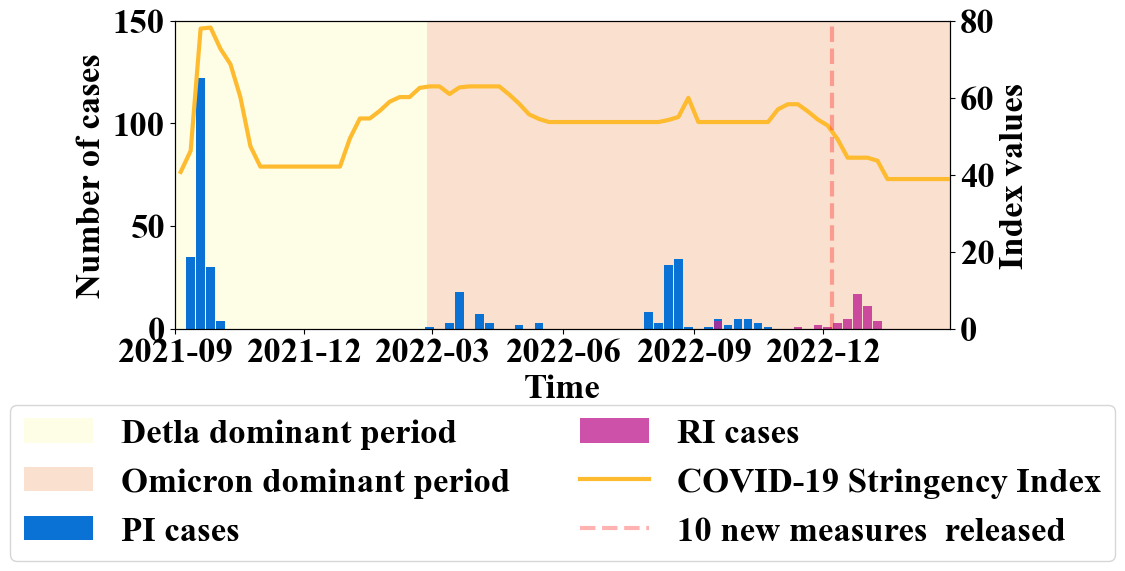

In [192]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams['font.size'] = 25
fig, ax1 = plt.subplots(figsize=(10,4)) 

plt.axvspan(x1, x2, facecolor='#FEFEE6', label='Detla dominant period')
plt.axvspan(x2, x3, facecolor='#F7C2A0', alpha=0.5, label='Omicron dominant period')

# 堆叠的柱形图
ax1.bar(pi_weekly.index, pi_weekly, color='#0A72D5', width=6, label='PI cases') 
ax1.bar(ri_weekly.index, ri_weekly, color='#C12592', width=6, alpha=0.8,  label='RI cases')     

ax2 = ax1.twinx() 
ax2.plot(phsm_weekly['StringencyIndex_Average'], color='#FEBB30', label='COVID-19 Stringency Index', linewidth=3)

ax2.vlines([x4], 0, 100, linestyles='dashed', colors='red', alpha=0.3, linewidth = 3,label='10 new measures  released')

plt.xlim(x1, x3) 

ax1.set_xlabel('Time', fontsize=25, fontweight='bold')  
ax1.set_ylabel('Number of cases', fontsize=25, fontweight='bold')  
ax2.set_ylabel('Index values', fontsize=25, fontweight='bold')

ax1.set_ylim(0, 150)  
ax2.set_ylim(0, 80)  

ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3)) 

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='center', bbox_to_anchor=(0.5, -0.5), ncol=2, 
           prop={'size': 25, 'family': 'Times New Roman'})

plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\Figs\\curve.pdf',dpi=300,  bbox_inches='tight') 
plt.show()

## 3.2 Key_interval

In [284]:
tpr = data[data['RI_status'] == 1]['TPR']
tpr_v0 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 0)]['TPR']
tpr_v1 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 1)]['TPR']
tpr_v2 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 2)]['TPR']
tpr_v3 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 3)]['TPR']
tpr_v4 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 4)]['TPR']


tpr_c1 = data[(data['RI_status'] == 1) & (data['Years'] == 2021)]['TPR']
tpr_v0_c1 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 0) & (data['Years'] == 2021)]['TPR']
tpr_v1_c1 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 1) & (data['Years'] == 2021)]['TPR']
tpr_v2_c1 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 2) & (data['Years'] == 2021)]['TPR']
tpr_v3_c1 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 3) & (data['Years'] == 2021)]['TPR']
tpr_v4_c1 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 4) & (data['Years'] == 2021)]['TPR']


tpr_c2 = data[(data['RI_status'] == 1) & (data['Years'] == 2022)]['TPR']
tpr_v0_c2 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 0) & (data['Years'] == 2022)]['TPR']
tpr_v1_c2 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 1) & (data['Years'] == 2022)]['TPR']
tpr_v2_c2 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 2) & (data['Years'] == 2022)]['TPR']
tpr_v3_c2 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 3) & (data['Years'] == 2022)]['TPR']
tpr_v4_c2 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 4) & (data['Years'] == 2022)]['TPR']

In [285]:
import pandas as pd
from scipy.stats import shapiro

# 定义条件列表
conditions = [
    ('tpr', 'RI_status == 1'),
    ('tpr_v0', '(RI_status == 1) & (Vaccine_status == 0)'),
    ('tpr_v1', '(RI_status == 1) & (Vaccine_status == 1)'),
    ('tpr_v2', '(RI_status == 1) & (Vaccine_status == 2)'),
    ('tpr_v3', '(RI_status == 1) & (Vaccine_status == 3)'),
    ('tpr_v4', '(RI_status == 1) & (Vaccine_status == 4)'),
    ('tpr_c1', '(RI_status == 1) & (Years == 2021)'),
    ('tpr_v0_c1', '(RI_status == 1) & (Vaccine_status == 0) & (Years == 2021)'),
    ('tpr_v1_c1', '(RI_status == 1) & (Vaccine_status == 1) & (Years == 2021)'),
    ('tpr_v2_c1', '(RI_status == 1) & (Vaccine_status == 2) & (Years == 2021)'),
    ('tpr_v3_c1', '(RI_status == 1) & (Vaccine_status == 3) & (Years == 2021)'),
    ('tpr_v4_c1', '(RI_status == 1) & (Vaccine_status == 4) & (Years == 2021)'),
    ('tpr_c2', '(RI_status == 1) & (Years == 2022)'),
    ('tpr_v0_c2', '(RI_status == 1) & (Vaccine_status == 0) & (Years == 2022)'),
    ('tpr_v1_c2', '(RI_status == 1) & (Vaccine_status == 1) & (Years == 2022)'),
    ('tpr_v2_c2', '(RI_status == 1) & (Vaccine_status == 2) & (Years == 2022)'),
    ('tpr_v3_c2', '(RI_status == 1) & (Vaccine_status == 3) & (Years == 2022)'),
    ('tpr_v4_c2', '(RI_status == 1) & (Vaccine_status == 4) & (Years == 2022)')
]

# 存储结果的字典
results = {}

for condition_name, condition_query in conditions:
    try:
        # 获取数据
        subset_data = data.query(condition_query)['TPR']
        
        # 描述统计
        describe_stats = subset_data.describe()
        
        # 正态性检验
        shapiro_stat, shapiro_p = shapiro(subset_data)
        
        # 存储结果
        results[condition_name] = {
            'describe_stats': describe_stats,
            'shapiro_stat': shapiro_stat,
            'shapiro_p': shapiro_p
        }
    except ValueError as e:
        print(f"An error occurred for condition {condition_name}: {e}")

# 打印结果
for condition_name, result in results.items():
    print(f"Condition: {condition_name}")
    print("Describe Statistics:")
    print(result['describe_stats'])
    print("Shapiro-Wilk Normality Test:")
    print(f"Statistic: {result['shapiro_stat']}, p-value: {result['shapiro_p']}")
    print("\n")

An error occurred for condition tpr_v0: Data must be at least length 3.
An error occurred for condition tpr_v4: Data must be at least length 3.
An error occurred for condition tpr_v0_c1: Data must be at least length 3.
An error occurred for condition tpr_v4_c1: Data must be at least length 3.
An error occurred for condition tpr_v0_c2: Data must be at least length 3.
An error occurred for condition tpr_v1_c2: Data must be at least length 3.
An error occurred for condition tpr_v2_c2: Data must be at least length 3.
An error occurred for condition tpr_v4_c2: Data must be at least length 3.
Condition: tpr
Describe Statistics:
count     48.000000
mean     428.291667
std       79.336868
min      113.000000
25%      436.500000
50%      459.500000
75%      468.000000
max      480.000000
Name: TPR, dtype: float64
Shapiro-Wilk Normality Test:
Statistic: 0.6053339242935181, p-value: 3.966124928478365e-10


Condition: tpr_v1
Describe Statistics:
count      3.000000
mean     465.666667
std        7

In [286]:
tpr_c1.describe()

count     43.000000
mean     451.790698
std       30.890404
min      365.000000
25%      454.500000
50%      462.000000
75%      468.000000
max      480.000000
Name: TPR, dtype: float64

In [287]:
tpr_na = data[(data['RI_status'] == 1) & (data['Vaccine_status'].isnull())]['TPR']

In [288]:
from scipy import stats
stats.levene(tpr, tpr_v0 , tpr_v1,tpr_v2 ,tpr_v3, tpr_na)

LeveneResult(statistic=0.6995985827815108, pvalue=0.6251472101532909)

In [289]:
from scipy.stats import kruskal
kruskal(tpr, tpr_v0 , tpr_v1,tpr_v2 ,tpr_v3, tpr_na)

KruskalResult(statistic=5.589670069491406, pvalue=0.34821338570248633)

In [290]:
stats.levene(tpr_c1,   tpr_v1_c1,tpr_v2_c1,tpr_v3_c1, tpr_na)

LeveneResult(statistic=1.8217457977679161, pvalue=0.1326155284749306)

In [291]:
kruskal(tpr_c1,   tpr_v1_c1,tpr_v2_c1,tpr_v3_c1, tpr_na)

KruskalResult(statistic=2.470218011045138, pvalue=0.6499765415931104)

In [292]:
stats.levene(tpr_c2,   tpr_v0_c2,tpr_v2_c2,tpr_v3_c2 )

LeveneResult(statistic=0.3171227320552259, pvalue=0.8130900538205867)

In [293]:
kruskal(tpr_c2,   tpr_v0_c2,tpr_v2_c2,tpr_v3_c2 )

KruskalResult(statistic=3.600000000000001, pvalue=0.3080221715589929)

In [294]:
stats.levene(tpr,   tpr_c2, tpr_c1 )

LeveneResult(statistic=2.3516059387976216, pvalue=0.10085466873525727)

In [239]:
kruskal(tpr,   tpr_c2, tpr_c1 )

KruskalResult(statistic=13.333696006963322, pvalue=0.0012724030469023885)

In [240]:
stats.levene(tpr_v1,   tpr_v1_c1)

LeveneResult(statistic=0.0, pvalue=1.0)

In [241]:
stats.levene(tpr_v2,  tpr_v2_c2,  tpr_v2_c1)

LeveneResult(statistic=0.5143138359813231, pvalue=0.6015421840152115)

In [242]:
kruskal(tpr_v2,  tpr_v2_c2,  tpr_v2_c1)

KruskalResult(statistic=2.8208622398414156, pvalue=0.2440380508060732)

In [243]:
stats.levene(tpr_v3,  tpr_v3_c2,  tpr_v3_c1)

LeveneResult(statistic=0.9225555565601272, pvalue=0.40645183289817477)

In [244]:
kruskal(tpr_v3,  tpr_v3_c2,  tpr_v3_c1)

KruskalResult(statistic=7.545523520485589, pvalue=0.0229884868471766)

In [245]:
import scikit_posthocs as sp
df = {
    'group': np.concatenate([np.repeat('tpr_v3', len(tpr_v3)), np.repeat('tpr_v3_c2', len(tpr_v3_c2)), np.repeat('tpr_v3_c1', len(tpr_v3_c1))]),
    'data': np.concatenate([tpr_v3,  tpr_v3_c2,  tpr_v3_c1])
}
df = pd.DataFrame(df)

posthoc = sp.posthoc_dunn(df, val_col='data', group_col='group', p_adjust='holm')

print(posthoc)

             tpr_v3  tpr_v3_c1  tpr_v3_c2
tpr_v3     1.000000   0.434111   0.036393
tpr_v3_c1  0.434111   1.000000   0.018048
tpr_v3_c2  0.036393   0.018048   1.000000


In [295]:
Tvr = data[data['RI_status'] == 1]['Tvr'].dropna()
Tvr_v0 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 0)]['Tvr']
Tvr_v1 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 1)]['Tvr']
Tvr_v2 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 2)]['Tvr']
Tvr_v3 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 3)]['Tvr']
Tvr_v4 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 4)]['Tvr']


Tvr_c1 = data[(data['RI_status'] == 1) & (data['Years'] == 2021)]['Tvr'].dropna()
Tvr_v0_c1 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 0) & (data['Years'] == 2021)]['Tvr']
Tvr_v1_c1 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 1) & (data['Years'] == 2021)]['Tvr']
Tvr_v2_c1 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 2) & (data['Years'] == 2021)]['Tvr']
Tvr_v3_c1 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 3) & (data['Years'] == 2021)]['Tvr']
Tvr_v4_c1 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 4) & (data['Years'] == 2021)]['Tvr']


Tvr_c2 = data[(data['RI_status'] == 1) & (data['Years'] == 2022)]['Tvr'].dropna()
Tvr_v0_c2 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 0) & (data['Years'] == 2022)]['Tvr']
Tvr_v1_c2 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 1) & (data['Years'] == 2022)]['Tvr']
Tvr_v2_c2 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 2) & (data['Years'] == 2022)]['Tvr']
Tvr_v3_c2 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 3) & (data['Years'] == 2022)]['Tvr']
Tvr_v4_c2 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 4) & (data['Years'] == 2022)]['Tvr']

In [296]:
conditions = [
    ('Tvr', 'RI_status == 1'),
    ('Tvr_v0', '(RI_status == 1) & (Vaccine_status == 0)'),
    ('Tvr_v1', '(RI_status == 1) & (Vaccine_status == 1)'),
    ('Tvr_v2', '(RI_status == 1) & (Vaccine_status == 2)'),
    ('Tvr_v3', '(RI_status == 1) & (Vaccine_status == 3)'),
    ('Tvr_v4', '(RI_status == 1) & (Vaccine_status == 4)'),
    ('Tvr_c1', '(RI_status == 1) & (Years == 2021)'),
    ('Tvr_v0_c1', '(RI_status == 1) & (Vaccine_status == 0) & (Years == 2021)'),
    ('Tvr_v1_c1', '(RI_status == 1) & (Vaccine_status == 1) & (Years == 2021)'),
    ('Tvr_v2_c1', '(RI_status == 1) & (Vaccine_status == 2) & (Years == 2021)'),
    ('Tvr_v3_c1', '(RI_status == 1) & (Vaccine_status == 3) & (Years == 2021)'),
    ('Tvr_v4_c1', '(RI_status == 1) & (Vaccine_status == 4) & (Years == 2021)'),
    ('Tvr_c2', '(RI_status == 1) & (Years == 2022)'),
    ('Tvr_v0_c2', '(RI_status == 1) & (Vaccine_status == 0) & (Years == 2022)'),
    ('Tvr_v1_c2', '(RI_status == 1) & (Vaccine_status == 1) & (Years == 2022)'),
    ('Tvr_v2_c2', '(RI_status == 1) & (Vaccine_status == 2) & (Years == 2022)'),
    ('Tvr_v3_c2', '(RI_status == 1) & (Vaccine_status == 3) & (Years == 2022)'),
    ('Tvr_v4_c2', '(RI_status == 1) & (Vaccine_status == 4) & (Years == 2022)')
]

# 存储结果的字典
results = {}

for condition_name, condition_query in conditions:
    try:
        # 获取数据
        subset_data = data.query(condition_query)['Tvr']
        
        # 描述统计
        describe_stats = subset_data.describe()
        
        # 正态性检验
        shapiro_stat, shapiro_p = shapiro(subset_data)
        
        # 存储结果
        results[condition_name] = {
            'describe_stats': describe_stats,
            'shapiro_stat': shapiro_stat,
            'shapiro_p': shapiro_p
        }
    except ValueError as e:
        print(f"An error occurred for condition {condition_name}: {e}")

# 打印结果
for condition_name, result in results.items():
    print(f"Condition: {condition_name}")
    print("Describe Statistics:")
    print(result['describe_stats'])
    print("Shapiro-Wilk Normality Test:")
    print(f"Statistic: {result['shapiro_stat']}, p-value: {result['shapiro_p']}")
    print("\n")

An error occurred for condition Tvr_v0: Data must be at least length 3.
An error occurred for condition Tvr_v4: Data must be at least length 3.
An error occurred for condition Tvr_v0_c1: Data must be at least length 3.
An error occurred for condition Tvr_v4_c1: Data must be at least length 3.
An error occurred for condition Tvr_v0_c2: Data must be at least length 3.
An error occurred for condition Tvr_v1_c2: Data must be at least length 3.
An error occurred for condition Tvr_v2_c2: Data must be at least length 3.
An error occurred for condition Tvr_v4_c2: Data must be at least length 3.
Condition: Tvr
Describe Statistics:
count     46.000000
mean     382.472659
std      204.665791
min        0.392488
25%      175.261126
50%      476.146181
75%      539.380903
max      710.000000
Name: Tvr, dtype: float64
Shapiro-Wilk Normality Test:
Statistic: nan, p-value: 1.0


Condition: Tvr_v1
Describe Statistics:
count      3.000000
mean     506.710880
std       36.878981
min      472.292361
25%  

In [248]:
Tvr_v2_c2

102    487.0
Name: Tvr, dtype: float64

In [249]:
data['Tvr'].describe()

count     46.000000
mean     382.472659
std      204.665791
min        0.392488
25%      175.261126
50%      476.146181
75%      539.380903
max      710.000000
Name: Tvr, dtype: float64

In [250]:
from scipy import stats
stats.levene(Tvr, Tvr_v1,Tvr_v2 ,Tvr_v3)

LeveneResult(statistic=4.448138108815249, pvalue=0.005869103135390338)

In [251]:
from scipy.stats import kruskal
kruskal(Tvr, Tvr_v1,Tvr_v2 ,Tvr_v3)

KruskalResult(statistic=27.038187981248345, pvalue=5.779818923377284e-06)

In [252]:
import scikit_posthocs as sp
df = {
    'group': np.concatenate([np.repeat('Tvr', len(Tvr)), np.repeat('Tvr_v1', len(Tvr_v1)), np.repeat('Tvr_v2', len(Tvr_v2)),
                             np.repeat('Tvr_v3', len(Tvr_v3))]),
    'data': np.concatenate([Tvr, Tvr_v1,Tvr_v2 ,Tvr_v3])
}
df = pd.DataFrame(df)

posthoc = sp.posthoc_dunn(df, val_col='data', group_col='group', p_adjust='holm')

print(posthoc)

             Tvr    Tvr_v1    Tvr_v2    Tvr_v3
Tvr     1.000000  0.780587  0.026892  0.005601
Tvr_v1  0.780587  1.000000  0.780587  0.075972
Tvr_v2  0.026892  0.780587  1.000000  0.000002
Tvr_v3  0.005601  0.075972  0.000002  1.000000


In [253]:
stats.levene(Tvr_c1, Tvr_v1_c1,Tvr_v2_c1 ,Tvr_v3_c1)

LeveneResult(statistic=5.115828176243787, pvalue=0.0027384137927938352)

In [254]:
kruskal(Tvr_c1, Tvr_v1_c1,Tvr_v2_c1 ,Tvr_v3_c1)

KruskalResult(statistic=24.51647227240298, pvalue=1.9486058833957752e-05)

In [255]:
import scikit_posthocs as sp
df = {
    'group': np.concatenate([np.repeat('Tvr_c1', len(Tvr_c1)), np.repeat('Tvr_v1_c1', len(Tvr_v1_c1)),
                             np.repeat('Tvr_v2_c1', len(Tvr_v2_c1)),
                             np.repeat('Tvr_v3_c1', len(Tvr_v3_c1))]),
    'data': np.concatenate([Tvr_c1, Tvr_v1_c1,Tvr_v2_c1 ,Tvr_v3_c1])
}
df = pd.DataFrame(df)

posthoc = sp.posthoc_dunn(df, val_col='data', group_col='group', p_adjust='holm')

print(posthoc)

             Tvr_c1  Tvr_v1_c1  Tvr_v2_c1  Tvr_v3_c1
Tvr_c1     1.000000   0.956635   0.050686   0.006552
Tvr_v1_c1  0.956635   1.000000   0.956635   0.094232
Tvr_v2_c1  0.050686   0.956635   1.000000   0.000006
Tvr_v3_c1  0.006552   0.094232   0.000006   1.000000


In [256]:
stats.levene(Tvr_c2,  Tvr_v2_c2 ,Tvr_v3_c2)

LeveneResult(statistic=1.4667870064250508, pvalue=0.31532094300285607)

In [257]:
kruskal(Tvr_c2,  Tvr_v2_c2 ,Tvr_v3_c2)

KruskalResult(statistic=2.1, pvalue=0.3499377491111554)

In [258]:
stats.levene(Tvr,  Tvr_c2 ,Tvr_c1)

LeveneResult(statistic=1.4058126743725787, pvalue=0.25055825866586734)

In [259]:
from scipy.stats import f_oneway

f_oneway(Tvr, Tvr_c2, Tvr_c1)

F_onewayResult(statistic=0.008116943841685254, pvalue=0.9919166438019583)

In [260]:
stats.levene(Tvr_v1,   Tvr_v1_c1)

LeveneResult(statistic=0.0, pvalue=1.0)

In [261]:
stats.levene(Tvr_v2,   Tvr_v2_c2,Tvr_v2_c1)

LeveneResult(statistic=0.36238870617554636, pvalue=0.6981170385377227)

In [262]:
kruskal(Tvr_v2,   Tvr_v2_c2,Tvr_v2_c1)

KruskalResult(statistic=0.5810950413223239, pvalue=0.7478539899516596)

In [263]:
stats.levene(Tvr_v3,   Tvr_v3_c2,Tvr_v3_c1)

LeveneResult(statistic=1.032264876175341, pvalue=0.3662298854220682)

In [264]:
f_oneway(Tvr_v3,   Tvr_v3_c2,Tvr_v3_c1)

F_onewayResult(statistic=4.035408767499026, pvalue=0.025981626398627267)

In [297]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

mmp = np.concatenate([Tvr_v3, Tvr_v3_c2, Tvr_v3_c1])
labels = ['Tvr_v3'] * len(Tvr_v3) + ['Tvr_v3_c2'] * len(Tvr_v3_c2) + ['Tvr_v3_c1'] * len(Tvr_v3_c1)


tukey_results = pairwise_tukeyhsd(mmp, labels, alpha=0.05)
print(tukey_results)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1    group2  meandiff p-adj    lower    upper   reject
-------------------------------------------------------------
   Tvr_v3 Tvr_v3_c1  -28.907 0.6999 -116.1516  58.3376  False
   Tvr_v3 Tvr_v3_c2 163.8063 0.0499    0.0623 327.5502   True
Tvr_v3_c1 Tvr_v3_c2 192.7133 0.0194   27.0955  358.331   True
-------------------------------------------------------------


In [299]:
tpr = data[data['RI_status'] == 1]['TPR']
tpr_v0 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 0)]['TPR']
tpr_v1 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 1)]['TPR']
tpr_v2 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 2)]['TPR']
tpr_v3 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 3)]['TPR']
tpr_v4 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 4)]['TPR']


tpr_c1 = data[(data['RI_status'] == 1) & (data['Years'] == 2021)]['TPR']
tpr_v0_c1 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 0) & (data['Years'] == 2021)]['TPR']
tpr_v1_c1 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 1) & (data['Years'] == 2021)]['TPR']
tpr_v2_c1 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 2) & (data['Years'] == 2021)]['TPR']
tpr_v3_c1 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 3) & (data['Years'] == 2021)]['TPR']
tpr_v4_c1 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 4) & (data['Years'] == 2021)]['TPR']


tpr_c2 = data[(data['RI_status'] == 1) & (data['Years'] == 2022)]['TPR']
tpr_v0_c2 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 0) & (data['Years'] == 2022)]['TPR']
tpr_v1_c2 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 1) & (data['Years'] == 2022)]['TPR']
tpr_v2_c2 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 2) & (data['Years'] == 2022)]['TPR']
tpr_v3_c2 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 3) & (data['Years'] == 2022)]['TPR']
tpr_v4_c2 = data[(data['RI_status'] == 1) & (data['Vaccine_status'] == 4) & (data['Years'] == 2022)]['TPR']

In [300]:
df1 = data[data['RI_status'] == 1][['Vaccine_status', 'TPR']]
df1['Years'] = 2010
df1 

,Vaccine_status,TPR,Years
0,0.0,295.0,2010
2,3.0,282.0,2010
4,3.0,280.0,2010
39,3.0,161.0,2010
102,2.0,113.0,2010
138,2.0,480.0,2010
143,3.0,469.0,2010
150,3.0,460.0,2010
156,1.0,474.0,2010
160,3.0,466.0,2010


In [301]:
tpr_df = pd.concat([df1, data[data['RI_status'] == 1][['Years', 'Vaccine_status', 'TPR']]])

In [302]:
tpr_df = tpr_df.reset_index()

In [303]:
tpr_df = tpr_df.sort_values(by='Years')
tpr_df['Years'] = tpr_df['Years'].replace({2021: 'Cohort 1', 2022: 'Cohort 2',2010:'Overall'})
tpr_df['Vaccine_status'] = tpr_df['Vaccine_status'].replace({0:'Unvaccinated', 1: '1 dose',
                                                             2:'2 dose',3: '3 dose',
                                                             4: '4 dose'})



tpr_df

,index,Vaccine_status,TPR,Years
0,0,Unvaccinated,295.0,Overall
26,225,3 dose,451.0,Overall
27,226,2 dose,470.0,Overall
28,229,2 dose,458.0,Overall
29,235,2 dose,432.0,Overall
...,...,...,...,...
52,102,2 dose,113.0,Cohort 2
51,39,3 dose,161.0,Cohort 2
50,4,3 dose,280.0,Cohort 2
49,2,3 dose,282.0,Cohort 2


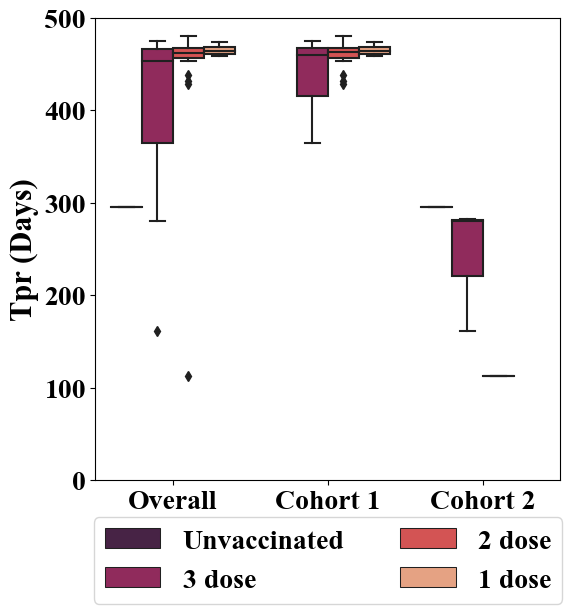

In [304]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams['font.size'] = 20

plt.figure(figsize=(6, 6))

sns.boxplot(x=tpr_df["Years"], y=tpr_df["TPR"], hue=tpr_df['Vaccine_status'], data=data, palette="rocket")
plt.ylabel("Tpr (Days)", fontsize=22, fontweight='bold')
plt.xlabel("", fontsize=15, fontweight='bold')   
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, prop={'family': 'Times New Roman', 'size': 20, 'weight': 'bold'})
plt.ylim(0, 500)
plt.savefig("D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\Figs\\TPR.pdf",
           dpi=300,bbox_inches='tight')
plt.show()

In [305]:
df1 = data[data['RI_status'] == 1][['Vaccine_status', 'Tvr']]
df1['Years'] = 2010
df1 

,Vaccine_status,Tvr,Years
0,0.0,NaN,2010
2,3.0,314.000000,2010
4,3.0,356.000000,2010
39,3.0,423.000000,2010
102,2.0,487.000000,2010
138,2.0,570.562500,2010
143,3.0,147.285775,2010
150,3.0,164.415567,2010
156,1.0,472.292361,2010
160,3.0,307.386400,2010


In [306]:
tvr_df = pd.concat([df1, data[data['RI_status'] == 1][['Years', 'Vaccine_status', 'Tvr']]])

In [307]:
tvr_df

,Vaccine_status,Tvr,Years
0,0.0,NaN,2010
2,3.0,314.0,2010
4,3.0,356.0,2010
39,3.0,423.0,2010
102,2.0,487.0,2010
...,...,...,...
306,2.0,480.0,2021
307,2.0,490.0,2021
310,3.0,172.0,2021
320,2.0,708.0,2021


In [308]:
tvr_df = tvr_df.reset_index()
tvr_df = tvr_df.sort_values(by='Years')
tvr_df['Years'] = tvr_df['Years'].replace({2021: 'Cohort 1', 2022: 'Cohort 2',2010:'Overall'})
tvr_df['Vaccine_status'] = tvr_df['Vaccine_status'].replace({0:'Unvaccinated', 1: '1 dose',
                                                             2:'2 dose',3: '3 dose',
                                                             4: '4 dose'})

In [309]:
tvr_df

,index,Vaccine_status,Tvr,Years
0,0,Unvaccinated,NaN,Overall
26,225,3 dose,0.392488,Overall
27,226,2 dose,483.656944,Overall
28,229,2 dose,543.665278,Overall
29,235,2 dose,521.303472,Overall
...,...,...,...,...
52,102,2 dose,487.000000,Cohort 2
51,39,3 dose,423.000000,Cohort 2
50,4,3 dose,356.000000,Cohort 2
49,2,3 dose,314.000000,Cohort 2


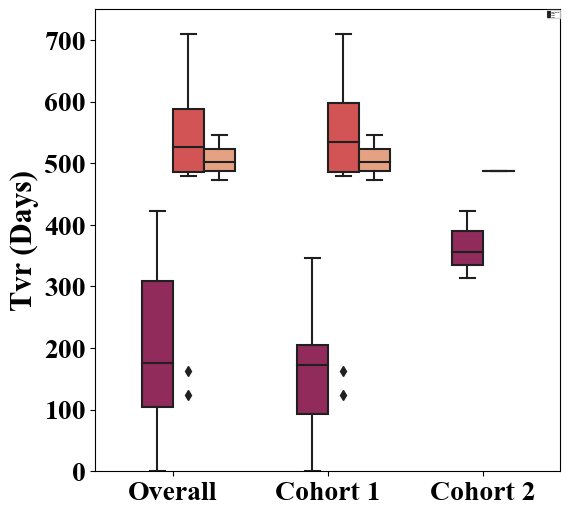

In [310]:
plt.figure(figsize=(6, 6))

sns.boxplot(x=tvr_df["Years"], y=tvr_df["Tvr"], hue=tvr_df['Vaccine_status'], data=data, palette="rocket")
plt.ylabel("Tvr (Days)", fontsize=22, fontweight='bold')
plt.xlabel("", fontsize=15, fontweight='bold')   
plt.legend(loc='upper right', prop={'family': 'Times New Roman', 'size': 1, 'weight': 'bold'})
plt.ylim(0, 750)
plt.savefig("D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\Figs\\tvr.pdf",
          dpi=300,bbox_inches='tight')
plt.show()

In [311]:
pot_df = data[data['RI_status'] == 1][['Years', 'Vaccine_status', 'Tvr','TPR']]   
pot_df = pot_df.sort_values(by='Vaccine_status', ascending=False)


pot_df['Years'] = pot_df['Years'].replace({2021: 'Cohort 1', 2022: 'Cohort 2',2010:'Overall'})
pot_df['Vaccine_status'] = pot_df['Vaccine_status'].replace({0:'Unvaccinated', 1: '1 dose',
                                                             2:'2 dose',3: '3 dose',
                                                             4: '4 dose'})


pot_df = pot_df.rename(columns={"Years": "Cohorts", "Vaccine_status": "Vaccination"})

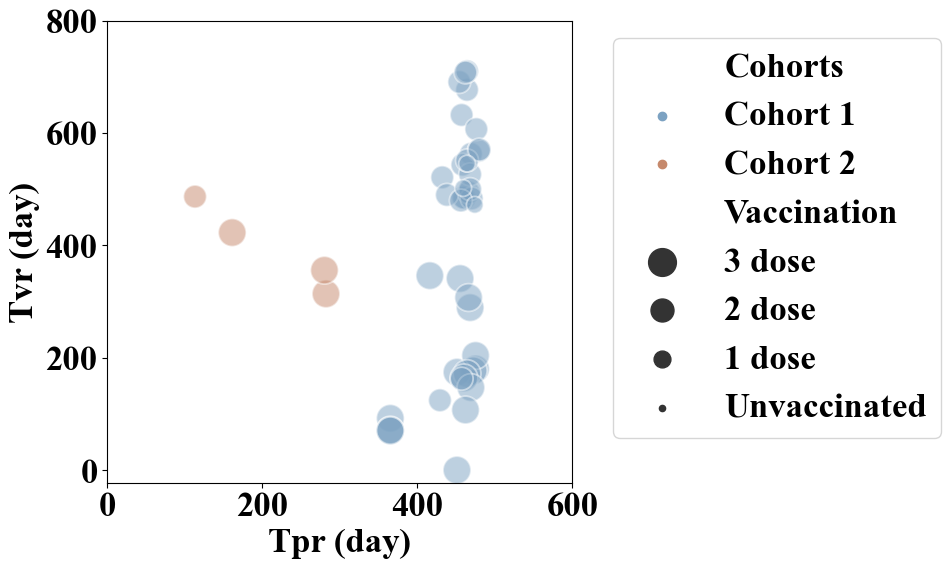

In [312]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams['font.size'] = 25

plt.figure(figsize=(6, 6))

color_palette = "twilight_shifted"

sns.scatterplot(data=pot_df, x="TPR", y="Tvr", size="Vaccination", hue="Cohorts", alpha=0.5, sizes=(20, 400), palette=color_palette)
plt.ylim(-22, 800)
plt.xlim(0, 600)
plt.legend(prop={'family': 'Times New Roman', 'size': 25, 'weight': 'bold'}, bbox_to_anchor=(1.05, 1))
plt.xlabel("Tpr (day)", fontsize=25, fontweight='bold')
plt.ylabel("Tvr (day)", fontsize=25, fontweight='bold')
plt.savefig("D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\Figs\\dur.pdf",
          # dpi=600,bbox_inches='tight')
plt.show()

# 4. Modeling

In [403]:
reg_df = data[['sex', 'age_group','age', 'workpalce','Region','Persistent infection', 'symp_pi', 'Vaccine_status','Hospitalization',
                 'Years','RI_status', 'T_ending']]    
reg_df.head()

,sex,age_group,age,workpalce,Region,Persistent infection,symp_pi,Vaccine_status,Hospitalization,Years,RI_status,T_ending
0,Male,65+,66,household,Jimei district,0,Mild,0.0,1,2022,1,295.0
1,Male,15-64,32,business area,Haicang district,0,Moderate,3.0,0,2022,0,303.0
2,Male,15-64,36,business area,Siming district,0,Mild,3.0,0,2022,1,282.0
3,Male,15-64,41,company and factories,Tongan district,0,Mild,3.0,0,2022,0,301.0
4,Female,15-64,27,business area,Siming district,0,Mild,3.0,0,2022,1,280.0


In [404]:
reg_df['Region'] = reg_df['Region'].str.strip()

C:\Users\ZERO\AppData\Local\Temp\ipykernel_16332\2689092916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_df['Region'] = reg_df['Region'].str.strip()


In [405]:
reg_df['sex'] = reg_df['sex'].replace({'Male': 0, 'Female': 1})
reg_df['age_group'] = reg_df['age_group'].replace({'<14': 0, '15-64': 1, '65+': 2})

reg_df['workpalce'] = reg_df['workpalce'].replace({'farm': 0, 'Government': 1,'business area': 2, 'company and factories': 3,
                                        'household':4, 'school': 5,'hospital': 6 })

reg_df['Region'] = reg_df['Region'].replace({'Xiangan district': 0, 'Tongan district': 1,'Haicang district': 2, 'Jimei district': 3,
                                                  'Huli district':4, 'Siming district': 5 })


reg_df['symp_pi'] = reg_df['symp_pi'].replace({'Asymptomatic': 0, 'Mild': 1,'Moderate': 2, 'Severe': 3})


reg_df['Years'] = reg_df['Years'].replace({2021: 0, 2022: 1})
reg_df['Vaccine_status'] = reg_df['Vaccine_status'].replace({np.nan: 5})

C:\Users\ZERO\AppData\Local\Temp\ipykernel_16332\3535177830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_df['sex'] = reg_df['sex'].replace({'Male': 0, 'Female': 1})
C:\Users\ZERO\AppData\Local\Temp\ipykernel_16332\3535177830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_df['age_group'] = reg_df['age_group'].replace({'<14': 0, '15-64': 1, '65+': 2})
C:\Users\ZERO\AppData\Local\Temp\ipykernel_16332\3535177830.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [407]:
def map_region_to_group(region):
    if region in [0, 1]:
        return 0
    elif region in [2, 3]:
        return 1
    elif region in [4, 5]:
        return 2
    else:
        return -1  # 处理未覆盖的情况，返回一个默认值或其他处理方式

# 创建新列 'Reg_U'
reg_df['Reg_U'] = reg_df['Region'].apply(map_region_to_group)

reg_df

C:\Users\ZERO\AppData\Local\Temp\ipykernel_16332\1190938415.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_df['Reg_U'] = reg_df['Region'].apply(map_region_to_group)


,sex,age_group,age,workpalce,Region,Persistent infection,symp_pi,Vaccine_status,Hospitalization,Years,RI_status,T_ending,Reg_U
0,0,2,66,4,3,0,1,0.0,1,1,1,295.0,1
1,0,1,32,2,2,0,2,3.0,0,1,0,303.0,1
2,0,1,36,2,5,0,1,3.0,0,1,1,282.0,2
3,0,1,41,3,1,0,1,3.0,0,1,0,301.0,0
4,1,1,27,2,5,0,1,3.0,0,1,1,280.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,1,0,8,5,1,1,2,5.0,1,0,0,469.0,0
323,1,1,28,6,3,1,1,2.0,0,0,1,454.0,1
324,0,2,71,4,5,1,2,3.0,1,0,0,468.0,2
325,0,2,70,4,1,0,2,3.0,0,0,0,467.0,0


In [408]:
def map_vac_to_group(vac):
    if vac in [0]:
        return 0
    elif vac in [1, 2]:
        return 1
    elif vac in [3, 4]:
        return 2
    else:
        return 3

reg_df['vac2'] = reg_df['Vaccine_status'].apply(map_vac_to_group)

C:\Users\ZERO\AppData\Local\Temp\ipykernel_16332\1706893554.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_df['vac2'] = reg_df['Vaccine_status'].apply(map_vac_to_group)


In [409]:
reg_df.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\reg_Data.xlsx')

## 4.1 Univariate analysis with logistics

In [410]:
reg_df.columns

Index(['sex', 'age_group', 'age', 'workpalce', 'Region',
       'Persistent infection', 'symp_pi', 'Vaccine_status', 'Hospitalization',
       'Years', 'RI_status', 'T_ending', 'Reg_U', 'vac2'],
      dtype='object')

In [411]:
reg_df_with_dummies = pd.get_dummies(reg_df, columns=['sex', 'age_group', 'workpalce', 'Region', 'Reg_U',
       'Persistent infection', 'symp_pi', 'Vaccine_status', 'vac2', 'Hospitalization',
       'Years'],drop_first=True)

In [412]:
import statsmodels.api as sm

results_df = pd.DataFrame(columns=['Variables', 'coef', 'std', 'z', 'p', 'OR', 'OR_95_upper', 'OR_95_lower'])

for i in reg_df_with_dummies.columns:
    X = reg_df_with_dummies[i]  # Select the current column as the independent variable
    y = reg_df_with_dummies['RI_status']
    X = sm.add_constant(X)
    
    try:
        model = sm.Logit(y, X).fit()
        
        params = model.params
        conf_int = model.conf_int()
        conf_int['Odds Ratio'] = params
        conf_int.columns = ['2.5%', '97.5%', 'Odds Ratio']
        
        conf_int['Odds Ratio'] = np.exp(conf_int['Odds Ratio'])
        conf_int['2.5%'] = np.exp(conf_int['2.5%'])
        conf_int['97.5%'] = np.exp(conf_int['97.5%'])
        
        # Append the results to the results DataFrame
        results_df = results_df.append({
            'Variables': i,
            'coef': params[1],  # Get coefficient
            'std': model.bse[1],  # Get standard error
            'z': model.tvalues[1],  # Get z value
            'p': model.pvalues[1],  # Get p value
            'OR': conf_int.loc[i, 'Odds Ratio'],
            'OR_95_upper': conf_int.loc[i, '97.5%'],
            'OR_95_lower': conf_int.loc[i, '2.5%']
        }, ignore_index=True)
    
    except np.linalg.LinAlgError as e:
        print(f"An error occurred for variable {i}: {e}")

results_df

Optimization terminated successfully.
         Current function value: 0.417090
         Iterations 6
         Current function value: 0.000000
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.391077
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.416984
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.415164
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.416942
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.412056
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.414309
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.416756
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.415539
         Iterations 6
Optimization ter

C:\Users\ZERO\AppData\Local\Temp\ipykernel_16332\3919059768.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
E:\Software\PY\ANAC\lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
E:\Software\PY\ANAC\lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
E:\Software\PY\ANAC\lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
E:\Software\PY\ANAC\lib\site-packages\statsmodel

,Variables,coef,std,z,p,OR,OR_95_upper,OR_95_lower
0,age,-0.000783,1.032771e-02,-0.075792,0.939584,9.992175e-01,1.019650,0.979195
1,RI_status,59.793964,1.046726e+07,0.000006,0.999995,9.293701e+25,inf,0.000000
2,T_ending,0.005055,1.410882e-03,3.582709,0.000340,1.005068e+00,1.007851,1.002292
3,sex_1,0.086065,3.147874e-01,0.273406,0.784541,1.089877e+00,2.019877,0.588071
4,age_group_1,0.580818,5.500318e-01,1.055972,0.290981,1.787500e+00,5.253321,0.608216
5,age_group_2,-0.199613,6.380052e-01,-0.312871,0.754379,8.190476e-01,2.860093,0.234551
6,workpalce_1,1.261997,6.475036e-01,1.949019,0.051293,3.532468e+00,12.567076,0.992938
7,workpalce_2,-0.630063,4.976169e-01,-1.266161,0.205455,5.325581e-01,1.412340,0.200814
8,workpalce_3,0.147920,3.127781e-01,0.472924,0.636268,1.159420e+00,2.140317,0.628064
9,workpalce_4,-0.448390,4.631091e-01,-0.968217,0.332936,6.386555e-01,1.582945,0.257672


In [413]:
'#0A72D5'
'#C12592'
'#FEBB30'

'#FEBB30'

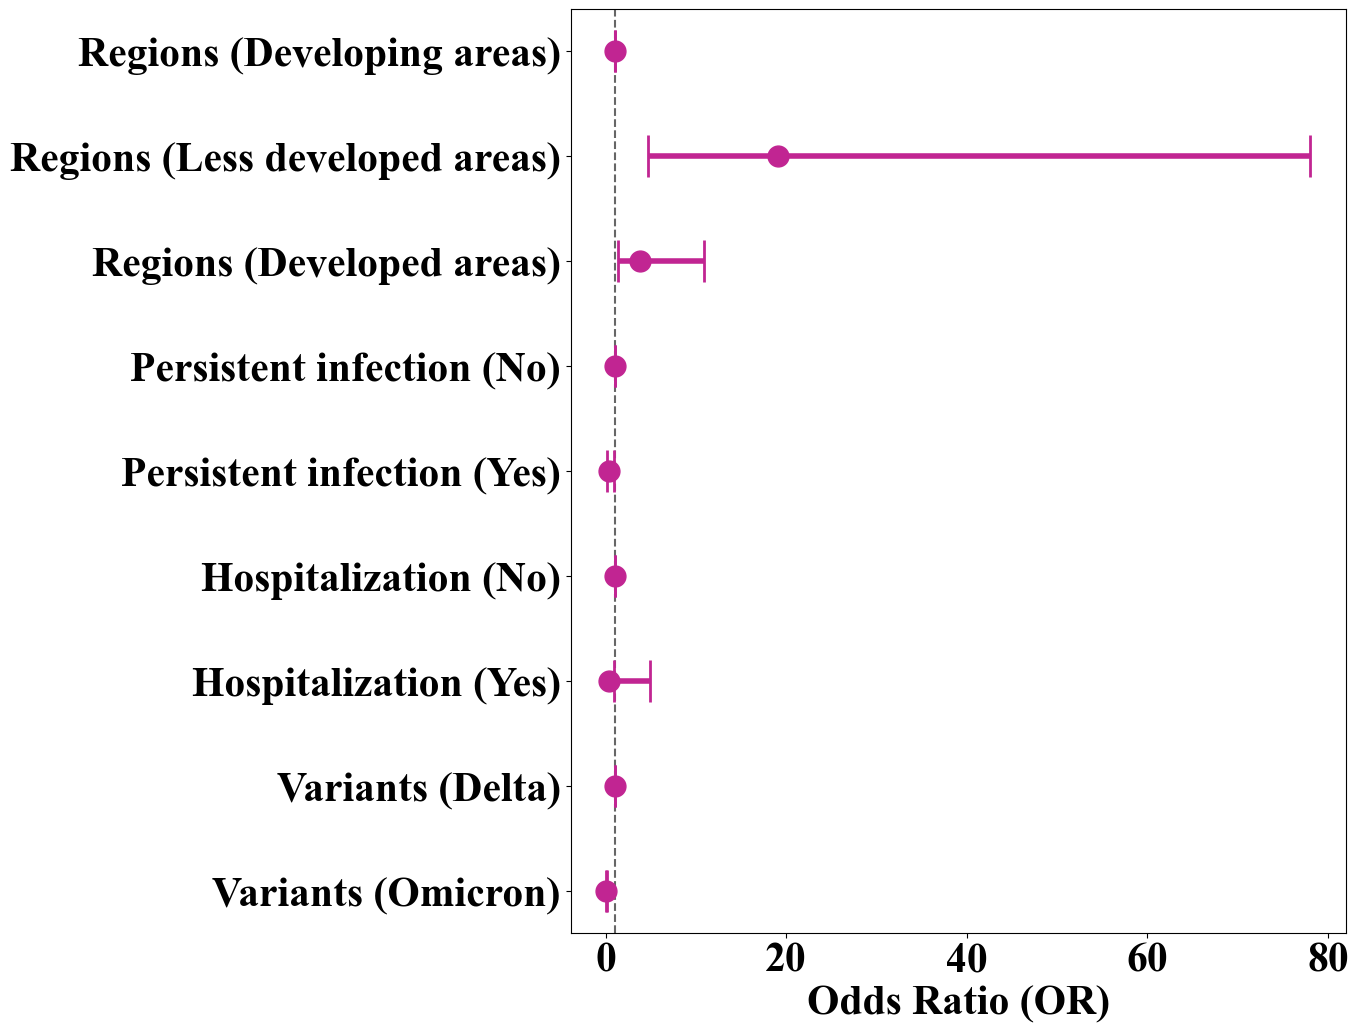

In [414]:
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams['font.size'] = 30
# 创建数据
data = {
    'Variable': [
        'Regions (Developing areas)', 'Regions (Less developed areas)','Regions (Developed areas)',
         'Persistent infection (No)', 'Persistent infection (Yes)',
        'Hospitalization (No)','Hospitalization (Yes)',
        'Variants (Delta)','Variants (Omicron)'
    ],
    'OR': [
        1.00,19.09, 3.85,1,0.40,1,0.40,1,0.03,
    ],
    'CI_lower': [
        1, 4.67, 1.36,1,0.17,1,0.87,1,0.01,
    ],
    'CI_upper': [
        1, 78.06,  10.91, 1, 0.94,1, 4.90,1,0.11,
        

    ]
}

df = pd.DataFrame(data)

# 绘制森林图
fig, ax = plt.subplots(figsize=(10,12))
ax.axvline(x=1, linestyle='--', color='k',alpha=0.6)
# 绘制误差线
ax.errorbar(df['OR'], df.index, xerr=[df['OR'] - df['CI_lower'], df['CI_upper'] - df['OR']], color='#C12592', ecolor='#C12592',fmt='o', 
            capsize=15, elinewidth=4, capthick=2, markersize=15)
#ax.scatter(df['OR'], df.index, facecolors='none', edgecolors='#C12592', s=200)
# 绘制垂直参考线
#ax.axvline(x=1, linestyle='--', color='#0A72D5')

# 设置y轴
ax.set_yticks(df.index)
ax.set_yticklabels(df['Variable'])

# 设置x轴
ax.set_xlabel('Odds Ratio (OR)', fontdict={'family': 'Times New Roman', 'weight': 'bold', 'size': 30})

# 反转y轴
ax.invert_yaxis()

#plt.title('Forest Plot of Logistic Regression Results')
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\Figs\\多因素logistic.pdf',dpi=300,  bbox_inches='tight') 
plt.show()

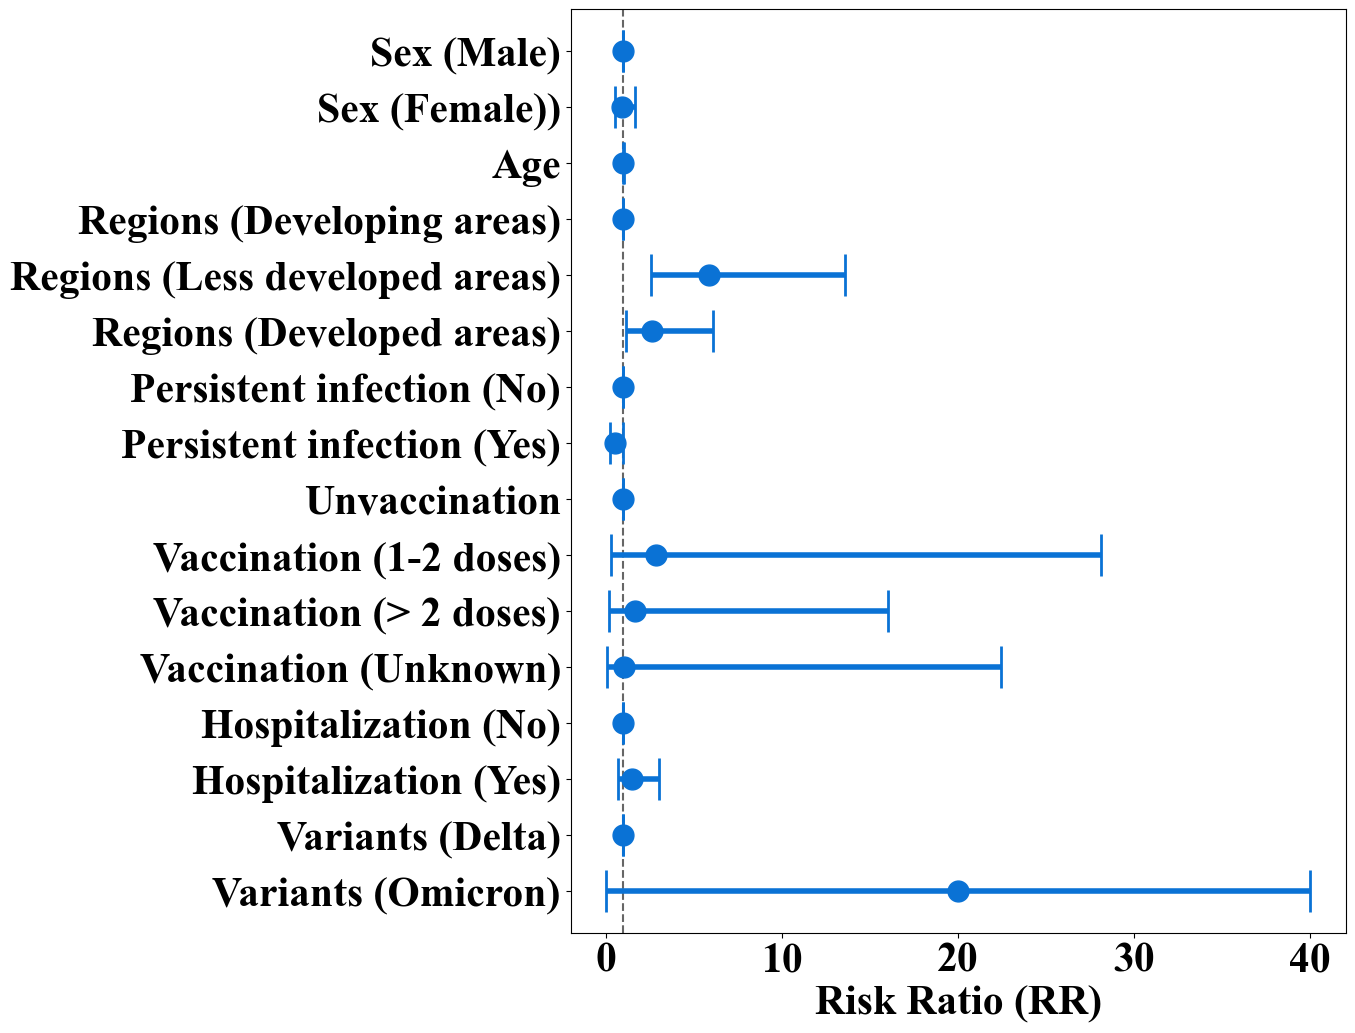

In [337]:
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams['font.size'] = 30
# 创建数据
data = {
    'Variable': [ 'Sex (Male)', 'Sex (Female))', 'Age',
        'Regions (Developing areas)', 'Regions (Less developed areas)','Regions (Developed areas)',
         'Persistent infection (No)', 'Persistent infection (Yes)',
          'Unvaccination', 'Vaccination (1-2 doses)','Vaccination (> 2 doses)',    'Vaccination (Unknown)',    
        'Hospitalization (No)','Hospitalization (Yes)',
        'Variants (Delta)','Variants (Omicron)'
    ],
    'RR': [
        1.00, 0.93,
        1,
        1,5.87,2.62,
        1,0.50,
        1, 2.87,1.67,1.06, 
        1,1.46,
        1,20
    ],
    'CI_lower': [
        1, 0.52, 
        0.98,
        1,2.54,1.13,
        1,0.25,
        1,0.29,0.17,0.05,
        1,0.71,
        1,0
    ],
    'CI_upper': [
        1, 1.68, 
        1.02, 
        1, 13.58,6.10,
        1, 0.99,
        1,28.14,16.04, 22.45,
        1,3,
        1,40
        

    ]
}

df = pd.DataFrame(data)

# 绘制森林图
fig, ax = plt.subplots(figsize=(10,12))
ax.axvline(x=1, linestyle='--', color='k',alpha=0.6)
# 绘制误差线
ax.errorbar(df['RR'], df.index, xerr=[df['RR'] - df['CI_lower'], df['CI_upper'] - df['RR']], color='#0A72D5', ecolor='#0A72D5',fmt='o', 
            capsize=15, elinewidth=4, capthick=2, markersize=15)
#ax.scatter(df['OR'], df.index, facecolors='none', edgecolors='#C12592', s=200)
# 绘制垂直参考线


# 设置y轴
ax.set_yticks(df.index)
ax.set_yticklabels(df['Variable'])

# 设置x轴
ax.set_xlabel('Risk Ratio (RR)', fontdict={'family': 'Times New Roman', 'weight': 'bold', 'size': 30})

# 反转y轴
ax.invert_yaxis()

#plt.title('Forest Plot of Logistic Regression Results')
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\Figs\\多因素COX.pdf',dpi=300,  bbox_inches='tight') 
plt.show()

## 4.2 muti-logistics reg

In [415]:
reg_df.columns

Index(['sex', 'age_group', 'age', 'workpalce', 'Region',
       'Persistent infection', 'symp_pi', 'Vaccine_status', 'Hospitalization',
       'Years', 'RI_status', 'T_ending', 'Reg_U', 'vac2'],
      dtype='object')

In [416]:
columns_to_convert = [ 'sex', 'age_group',  'workpalce', 'Region', 'Reg_U',
       'Persistent infection', 'symp_pi', 'Vaccine_status', 'vac2', 'Hospitalization',
       'Years']
reg_df[columns_to_convert] = reg_df[columns_to_convert].astype('category')

In [417]:
reg_df = reg_df.rename(columns={'Persistent infection': 'Persistent_infection'})
reg_df = reg_df.rename(columns={'RI_status': 'out'})
reg_df = reg_df.rename(columns={'Hospitalization': 'Hosp'})
reg_df = reg_df.rename(columns={'Years': 'Variants'})

In [418]:
import statsmodels.formula.api as smf

f1 = 'out ~ sex + age + workpalce + Reg_U +  Persistent_infection + symp_pi + vac2 +  Hosp + Variants'
model = smf.logit(f1, data = reg_df )
glm1 = model.fit()
glm1.summary()

         Current function value: 0.309154
         Iterations: 35


E:\Software\PY\ANAC\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    out   No. Observations:                  327
Model:                          Logit   Df Residuals:                      307
Method:                           MLE   Df Model:                           19
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                  0.2588
Time:                        21:51:47   Log-Likelihood:                -101.09
converged:                      False   LL-Null:                       -136.39
Covariance Type:            nonrobust   LLR p-value:                 7.321e-08
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   -65.3965   1.08e+07  -6.05e-06      1.000   -2.12e+07    2.12e+07
sex[T.1]                     -0.0037      0.381     -0.010      0.992      -0.751       0.744
workpalce[T.1]               22.7514   2.97e+05   7.67e-05      1.000   -5.82e+05    5.82e+05
workpalce[T.2]               20.8773   2.97e+05   7.04e-05      1.000   -5.82e+05    5.82e+05
workpalce[T.3]               20.6960   2.97e+05   6.97e-05      1.000   -5.82e+05    5.82e+05
workpalce[T.4]               20.8446   2.97e+05   7.02e-05      1.000   -5.82e+05    5.82e+05
workpalce[T.5]               20.1441   2.97e+05   6.79e-05      1.000   -5.82e+05    5.82e+05
workpalce[T.6]               22.4288   2.97e+05   7.56e-05      1.000   -5.82e+05    5.82e+05
Reg_U[T.1]                    2.3311      0.785      2.971      0.003       0.793       3.869
Reg_U[T.2]                    1.0518      0.607      1.733      0.083      -0.138       2.242
Persistent_infection[T.1]    -0.8731      0.492     -1.776      0.076      -1.836       0.090
symp_pi[T.1]                 42.8305   1.08e+07   3.96e-06      1.000   -2.12e+07    2.12e+07
symp_pi[T.2]                 41.8799   1.08e+07   3.87e-06      1.000   -2.12e+07    2.12e+07
symp_pi[T.3]                 41.1583   1.08e+07   3.81e-06      1.000   -2.12e+07    2.12e+07
vac2[T.1]                     1.1483      1.267      0.906      0.365      -1.335       3.632
vac2[T.2]                     0.3784      1.273      0.297      0.766      -2.116       2.873
vac2[T.3]                    -0.2759      1.794     -0.154      0.878      -3.791       3.240
Hosp[T.1]                     0.8527      0.493      1.731      0.083      -0.113       1.818
Variants[T.1]                -3.6126      0.848     -4.259      0.000      -5.275      -1.950
age                           0.0082      0.020      0.418      0.676      -0.030       0.047
=============================================================================================
"""

In [419]:
f2 = 'out ~ sex + age + Reg_U +  Persistent_infection + symp_pi + vac2 +  Hosp + Variants'
model = smf.logit(f2, data = reg_df )
glm2 = model.fit()
glm2.summary()

         Current function value: 0.322541
         Iterations: 35


E:\Software\PY\ANAC\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    out   No. Observations:                  327
Model:                          Logit   Df Residuals:                      313
Method:                           MLE   Df Model:                           13
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                  0.2267
Time:                        21:51:48   Log-Likelihood:                -105.47
converged:                      False   LL-Null:                       -136.39
Covariance Type:            nonrobust   LLR p-value:                 2.456e-08
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   -16.5276   2.08e+04     -0.001      0.999   -4.08e+04    4.08e+04
sex[T.1]                      0.0592      0.363      0.163      0.870      -0.652       0.770
Reg_U[T.1]                    2.7345      0.749      3.650      0.000       1.266       4.203
Reg_U[T.2]                    1.3033      0.565      2.307      0.021       0.196       2.410
Persistent_infection[T.1]    -0.9355      0.461     -2.027      0.043      -1.840      -0.031
symp_pi[T.1]                 14.5527   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
symp_pi[T.2]                 13.6420   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
symp_pi[T.3]                 13.4777   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
vac2[T.1]                     1.1001      1.198      0.918      0.358      -1.248       3.448
vac2[T.2]                     0.3948      1.203      0.328      0.743      -1.963       2.752
vac2[T.3]                    -0.1005      1.624     -0.062      0.951      -3.284       3.083
Hosp[T.1]                     0.8088      0.468      1.730      0.084      -0.108       1.725
Variants[T.1]                -3.6971      0.791     -4.675      0.000      -5.247      -2.147
age                           0.0121      0.014      0.861      0.389      -0.015       0.040
=============================================================================================
"""

In [420]:
f3 = 'out ~ sex + age + Reg_U +  Persistent_infection  + vac2 +  Hosp + Variants'
model = smf.logit(f3, data = reg_df )
glm3 = model.fit()
glm3.summary()

Optimization terminated successfully.
         Current function value: 0.328877
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    out   No. Observations:                  327
Model:                          Logit   Df Residuals:                      316
Method:                           MLE   Df Model:                           10
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                  0.2115
Time:                        21:51:49   Log-Likelihood:                -107.54
converged:                       True   LL-Null:                       -136.39
Covariance Type:            nonrobust   LLR p-value:                 9.859e-09
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -2.1672      1.332     -1.627      0.104      -4.778       0.444
sex[T.1]                     -0.0106      0.355     -0.030      0.976      -0.706       0.684
Reg_U[T.1]                    2.8715      0.733      3.917      0.000       1.435       4.309
Reg_U[T.2]                    1.3312      0.559      2.383      0.017       0.236       2.426
Persistent_infection[T.1]    -1.0347      0.458     -2.259      0.024      -1.932      -0.137
vac2[T.1]                     1.0346      1.178      0.878      0.380      -1.275       3.344
vac2[T.2]                     0.2894      1.183      0.245      0.807      -2.028       2.607
vac2[T.3]                    -0.2388      1.606     -0.149      0.882      -3.387       2.909
Hosp[T.1]                     0.9028      0.463      1.949      0.051      -0.005       1.810
Variants[T.1]                -3.4260      0.763     -4.490      0.000      -4.922      -1.930
age                           0.0018      0.013      0.137      0.891      -0.024       0.028
=============================================================================================
"""

In [421]:
f4 = 'out ~  age + Reg_U +  Persistent_infection  + vac2 +  Hosp + Variants'
model = smf.logit(f4, data = reg_df )
glm4 = model.fit()
glm4.summary()

Optimization terminated successfully.
         Current function value: 0.328879
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    out   No. Observations:                  327
Model:                          Logit   Df Residuals:                      317
Method:                           MLE   Df Model:                            9
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                  0.2115
Time:                        21:51:49   Log-Likelihood:                -107.54
converged:                       True   LL-Null:                       -136.39
Covariance Type:            nonrobust   LLR p-value:                 3.718e-09
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -2.1714      1.324     -1.640      0.101      -4.767       0.424
Reg_U[T.1]                    2.8699      0.731      3.924      0.000       1.436       4.303
Reg_U[T.2]                    1.3319      0.558      2.385      0.017       0.238       2.426
Persistent_infection[T.1]    -1.0350      0.458     -2.259      0.024      -1.933      -0.137
vac2[T.1]                     1.0341      1.178      0.878      0.380      -1.275       3.343
vac2[T.2]                     0.2894      1.182      0.245      0.807      -2.028       2.607
vac2[T.3]                    -0.2384      1.606     -0.148      0.882      -3.386       2.909
Hosp[T.1]                     0.9033      0.463      1.951      0.051      -0.004       1.811
Variants[T.1]                -3.4262      0.763     -4.490      0.000      -4.922      -1.931
age                           0.0018      0.013      0.135      0.892      -0.024       0.028
=============================================================================================
"""

In [422]:
f5 = 'out ~  Reg_U +  Persistent_infection  + vac2 +  Hosp + Variants'
model = smf.logit(f5, data = reg_df )
glm5 = model.fit()
glm5.summary()

Optimization terminated successfully.
         Current function value: 0.328907
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    out   No. Observations:                  327
Model:                          Logit   Df Residuals:                      318
Method:                           MLE   Df Model:                            8
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                  0.2114
Time:                        21:51:49   Log-Likelihood:                -107.55
converged:                       True   LL-Null:                       -136.39
Covariance Type:            nonrobust   LLR p-value:                 1.328e-09
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -2.1001      1.212     -1.732      0.083      -4.476       0.276
Reg_U[T.1]                    2.8720      0.731      3.928      0.000       1.439       4.305
Reg_U[T.2]                    1.3488      0.545      2.475      0.013       0.281       2.417
Persistent_infection[T.1]    -1.0292      0.456     -2.258      0.024      -1.923      -0.136
vac2[T.1]                     1.0232      1.174      0.872      0.383      -1.277       3.324
vac2[T.2]                     0.2948      1.180      0.250      0.803      -2.019       2.608
vac2[T.3]                    -0.2635      1.594     -0.165      0.869      -3.387       2.860
Hosp[T.1]                     0.9002      0.462      1.947      0.052      -0.006       1.806
Variants[T.1]                -3.4354      0.760     -4.517      0.000      -4.926      -1.945
=============================================================================================
"""

In [423]:
f6 = 'out ~  Reg_U +  Persistent_infection   +  Hosp + Variants'
model = smf.logit(f6, data = reg_df )
glm6 = model.fit()
glm6.summary()

Optimization terminated successfully.
         Current function value: 0.336810
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    out   No. Observations:                  327
Model:                          Logit   Df Residuals:                      321
Method:                           MLE   Df Model:                            5
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                  0.1925
Time:                        21:51:50   Log-Likelihood:                -110.14
converged:                       True   LL-Null:                       -136.39
Covariance Type:            nonrobust   LLR p-value:                 4.243e-10
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -1.4462      0.310     -4.663      0.000      -2.054      -0.838
Reg_U[T.1]                    2.9493      0.718      4.105      0.000       1.541       4.358
Reg_U[T.2]                    1.3478      0.531      2.536      0.011       0.306       2.389
Persistent_infection[T.1]    -0.9263      0.443     -2.091      0.037      -1.795      -0.058
Hosp[T.1]                     0.7240      0.441      1.641      0.101      -0.141       1.589
Variants[T.1]                -3.6212      0.712     -5.086      0.000      -5.017      -2.226
=============================================================================================
"""

In [424]:
f7 = 'out ~  Reg_U +  Persistent_infection     + Variants'
model = smf.logit(f7, data = reg_df )
glm7 = model.fit()
glm7.summary()

Optimization terminated successfully.
         Current function value: 0.341022
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    out   No. Observations:                  327
Model:                          Logit   Df Residuals:                      322
Method:                           MLE   Df Model:                            4
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                  0.1824
Time:                        21:51:50   Log-Likelihood:                -111.51
converged:                       True   LL-Null:                       -136.39
Covariance Type:            nonrobust   LLR p-value:                 4.064e-10
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -1.2385      0.273     -4.537      0.000      -1.774      -0.704
Reg_U[T.1]                    2.9693      0.714      4.161      0.000       1.571       4.368
Reg_U[T.2]                    1.3692      0.526      2.605      0.009       0.339       2.399
Persistent_infection[T.1]    -0.5458      0.372     -1.466      0.143      -1.276       0.184
Variants[T.1]                -3.8177      0.698     -5.470      0.000      -5.186      -2.450
=============================================================================================
"""

In [425]:
f8 = 'out ~  Reg_U      + Variants'
model = smf.logit(f8, data = reg_df )
glm8 = model.fit()
glm8.summary()

Optimization terminated successfully.
         Current function value: 0.344322
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    out   No. Observations:                  327
Model:                          Logit   Df Residuals:                      323
Method:                           MLE   Df Model:                            3
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                  0.1745
Time:                        21:51:50   Log-Likelihood:                -112.59
converged:                       True   LL-Null:                       -136.39
Covariance Type:            nonrobust   LLR p-value:                 2.595e-10
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.5303      0.201     -7.602      0.000      -1.925      -1.136
Reg_U[T.1]        2.9415      0.706      4.164      0.000       1.557       4.326
Reg_U[T.2]        1.3091      0.518      2.526      0.012       0.293       2.325
Variants[T.1]    -3.4850      0.656     -5.313      0.000      -4.771      -2.199
=================================================================================
"""

In [426]:
f9 = 'out ~  Reg_U +   Variants + Reg_U *Variants'
model = smf.logit(f9, data = reg_df )
glm9 = model.fit()
glm9.summary()

         Current function value: 0.342859
         Iterations: 35


E:\Software\PY\ANAC\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    out   No. Observations:                  327
Model:                          Logit   Df Residuals:                      321
Method:                           MLE   Df Model:                            5
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                  0.1780
Time:                        21:51:50   Log-Likelihood:                -112.11
converged:                      False   LL-Null:                       -136.39
Covariance Type:            nonrobust   LLR p-value:                 2.739e-09
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -1.5261      0.201     -7.576      0.000      -1.921      -1.131
Reg_U[T.1]                   3.4720      1.088      3.192      0.001       1.340       5.604
Reg_U[T.2]                   1.1206      0.564      1.986      0.047       0.015       2.226
Variants[T.1]              -19.1587   7754.762     -0.002      0.998   -1.52e+04    1.52e+04
Reg_U[T.1]:Variants[T.1]    14.8614   7754.763      0.002      0.998   -1.52e+04    1.52e+04
Reg_U[T.2]:Variants[T.1]    16.1194   7754.762      0.002      0.998   -1.52e+04    1.52e+04
============================================================================================
"""

In [427]:
f10 = 'out ~  Reg_U'
model = smf.logit(f10, data = reg_df )
glm10 = model.fit()
glm10.summary()

Optimization terminated successfully.
         Current function value: 0.403110
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    out   No. Observations:                  327
Model:                          Logit   Df Residuals:                      324
Method:                           MLE   Df Model:                            2
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                 0.03354
Time:                        21:51:51   Log-Likelihood:                -131.82
converged:                       True   LL-Null:                       -136.39
Covariance Type:            nonrobust   LLR p-value:                   0.01031
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6358      0.200     -8.197      0.000      -2.027      -1.245
Reg_U[T.1]     0.7419      0.443      1.674      0.094      -0.127       1.611
Reg_U[T.2]    -0.8017      0.401     -2.000      0.045      -1.587      -0.016
==============================================================================
"""

In [428]:
f11 = 'out ~  Variants'
model = smf.logit(f11, data = reg_df )
glm11 = model.fit()
glm11.summary()

Optimization terminated successfully.
         Current function value: 0.377028
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    out   No. Observations:                  327
Model:                          Logit   Df Residuals:                      325
Method:                           MLE   Df Model:                            1
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                 0.09607
Time:                        21:51:51   Log-Likelihood:                -123.29
converged:                       True   LL-Null:                       -136.39
Covariance Type:            nonrobust   LLR p-value:                 3.069e-07
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.2360      0.173     -7.135      0.000      -1.576      -0.896
Variants[T.1]    -2.0297      0.487     -4.164      0.000      -2.985      -1.074
=================================================================================
"""

In [429]:
from sklearn.metrics import confusion_matrix, accuracy_score

predicted_values = glm1.predict(reg_df)

predicted_classes = (predicted_values > 0.5).astype(int)


conf_matrix = confusion_matrix(reg_df['out'], predicted_classes)

accuracy = accuracy_score(reg_df['out'], predicted_classes)

accuracy

0.8776758409785933

In [430]:
regression_metrics = pd.DataFrame(columns=['included_variables ','AIC', 'BIC', 'R-squared'])

glm_models = [glm1, glm2, glm3, glm4, glm5, glm6, glm7, glm8,glm9,glm10,glm11]  

for i in range(11):

    glm = glm_models[i]
    coefficients = glm.params
    included_variables = coefficients[coefficients != 0].index.tolist()
    AIC = glm.aic
    BIC = glm.bic
    r_squared = glm.prsquared
    

   
 
    regression_metrics.loc[f'glm {i+1}', :] = [included_variables,AIC, BIC, r_squared]

regression_metrics_df  = pd.concat([regression_metrics], axis=1)
regression_metrics_df

E:\Software\PY\ANAC\lib\site-packages\pandas\core\internals\blocks.py:940: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)
E:\Software\PY\ANAC\lib\site-packages\pandas\core\internals\blocks.py:940: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)
E:\Software\PY\ANAC\lib\site-packages\pandas\core\internals\blocks.py:940: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecate

,included_variables,AIC,BIC,R-squared
glm 1,"[Intercept, sex[T.1], workpalce[T.1], workpalc...",242.186786,317.98599,0.258798
glm 2,"[Intercept, sex[T.1], Reg_U[T.1], Reg_U[T.2], ...",238.941632,292.001075,0.226704
glm 3,"[Intercept, sex[T.1], Reg_U[T.1], Reg_U[T.2], ...",237.085838,278.7754,0.211512
glm 4,"[Intercept, Reg_U[T.1], Reg_U[T.2], Persistent...",235.08673,272.986332,0.211508
glm 5,"[Intercept, Reg_U[T.1], Reg_U[T.2], Persistent...",233.105003,267.214645,0.211441
glm 6,"[Intercept, Reg_U[T.1], Reg_U[T.2], Persistent...",232.273945,255.013706,0.192492
glm 7,"[Intercept, Reg_U[T.1], Reg_U[T.2], Persistent...",233.028554,251.978355,0.182394
glm 8,"[Intercept, Reg_U[T.1], Reg_U[T.2], Variants[T...",233.186263,248.346103,0.174484
glm 9,"[Intercept, Reg_U[T.1], Reg_U[T.2], Variants[T...",236.22975,258.969511,0.177991
glm 10,"[Intercept, Reg_U[T.1], Reg_U[T.2]]",269.633944,281.003824,0.033538


In [431]:
regression_metrics_df.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\log_reg_index.xlsx')

In [432]:
params = glm1.params
conf_int = glm1.conf_int()
std_err = glm1.bse

# 计算 odds ratio
odds_ratio = np.exp(params)

# 计算置信区间
ci_lower = np.exp(conf_int[0])
ci_upper = np.exp(conf_int[1])

# 计算95%置信区间
ci_lower_err = np.exp(params - 1.96 * std_err)
ci_upper_err = np.exp(params + 1.96 * std_err)

# 创建包含结果的数据框
ORresults = pd.DataFrame({'OR': odds_ratio, '95% CI Lower':ci_lower, '95% CI Upper': ci_upper})
ORresults

E:\Software\PY\ANAC\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


,OR,95% CI Lower,95% CI Upper
Intercept,3.968756e-29,0.000000,inf
sex[T.1],9.963023e-01,0.471833,2.103748
workpalce[T.1],7.599807e+09,0.000000,inf
workpalce[T.2],1.166552e+09,0.000000,inf
workpalce[T.3],9.731285e+08,0.000000,inf
workpalce[T.4],1.129028e+09,0.000000,inf
workpalce[T.5],5.603645e+08,0.000000,inf
workpalce[T.6],5.504132e+09,0.000000,inf
Reg_U[T.1],1.028890e+01,2.210532,47.889546
Reg_U[T.2],2.862765e+00,0.871136,9.407743


In [433]:
params = glm6.params
conf_int = glm6.conf_int()
std_err = glm6.bse

# 计算 odds ratio
odds_ratio = np.exp(params)

# 计算置信区间
ci_lower = np.exp(conf_int[0])
ci_upper = np.exp(conf_int[1])

# 计算95%置信区间
ci_lower_err = np.exp(params - 1.96 * std_err)
ci_upper_err = np.exp(params + 1.96 * std_err)

# 创建包含结果的数据框
ORresults = pd.DataFrame({'OR': odds_ratio, '95% CI Lower':ci_lower, '95% CI Upper': ci_upper})
ORresults

,OR,95% CI Lower,95% CI Upper
Intercept,0.235455,0.128213,0.432401
Reg_U[T.1],19.092791,4.669727,78.063368
Reg_U[T.2],3.848899,1.358277,10.906479
Persistent_infection[T.1],0.396026,0.166210,0.943605
Hosp[T.1],2.062720,0.868689,4.897975
Variants[T.1],0.026750,0.006625,0.108003


In [434]:
summary_data = glm6.summary()

# 将摘要信息转换为 DataFrame
summary_df = pd.DataFrame(summary_data.tables[1])

# 将 DataFrame 导出到 Excel 文件
summary_df.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\muti_reg_res.xlsx')

In [435]:
ORresults.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\muti_reg_OR.xlsx')

## 4.3 Collinearity diagnostics

In [436]:
reg_df.columns

Index(['sex', 'age_group', 'age', 'workpalce', 'Region',
       'Persistent_infection', 'symp_pi', 'Vaccine_status', 'Hosp', 'Variants',
       'out', 'T_ending', 'Reg_U', 'vac2'],
      dtype='object')

In [437]:
reg_df_with_dummies = pd.get_dummies(reg_df, columns=['sex', 'age_group', 'age', 'workpalce', 'Region',
       'Persistent_infection', 'symp_pi', 'Vaccine_status', 'Hosp', 'Variants',
        'Reg_U', 'vac2'],drop_first=True)

In [438]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [439]:
X = reg_df[[  'Reg_U',
       'Persistent_infection']]
X = add_constant(X)  
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,feature,VIF
0,const,3.140525
1,Reg_U,1.223067
2,Persistent_infection,1.223067


In [440]:
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
tolerance = pd.DataFrame()
tolerance["variables"] = X.columns
tolerance["tolerance"] = [1 / vif_value for vif_value in vif["VIF"]]
tolerance 

,variables,tolerance
0,const,0.318418
1,Reg_U,0.817617
2,Persistent_infection,0.817617


In [441]:
X = add_constant(reg_df_with_dummies )  
vif_data1 = pd.DataFrame()
vif_data1['feature'] = reg_df_with_dummies .columns
vif_data1['VIF'] = [variance_inflation_factor(reg_df_with_dummies .values, i) for i in range(reg_df_with_dummies .shape[1])]
vif_data1

E:\Software\PY\ANAC\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,out,1.848875
1,T_ending,84.410244
2,sex_1,3.013534
3,age_group_1,inf
4,age_group_2,inf
...,...,...
96,Reg_U_1,inf
97,Reg_U_2,inf
98,vac2_1,inf
99,vac2_2,inf


In [442]:
X = add_constant(reg_df[['wp2','reg3','perinf', 'hosp','var']])  
vif_data = pd.DataFrame()
vif_data['feature'] = ['wp2','reg3','perinf', 'hosp','var']
vif_data['VIF'] = [variance_inflation_factor(reg_df[['wp2','reg3','perinf', 'hosp','var']].values, i) for i in range(reg_df[['wp2','reg3','perinf', 'hosp','var']].shape[1])]
vif_data

KeyError: "None of [Index(['wp2', 'reg3', 'perinf', 'hosp', 'var'], dtype='object')] are in the [columns]"

In [ ]:
reg_df_with_dummies.columns

In [ ]:
X = add_constant(reg_df_with_dummies[['wp2_1','reg3_1', 'reg3_2','perinf_1', 'hosp_1', 'var_1']])  
vif_data2 = pd.DataFrame()
vif_data2['feature'] = ['wp2_1','reg3_1', 'reg3_2','perinf_1', 'hosp_1', 'var_1']
vif_data2['VIF'] = [variance_inflation_factor(reg_df_with_dummies[['wp2_1','reg3_1', 'reg3_2','perinf_1', 'hosp_1', 'var_1']].values, i) 
                   for i in range(reg_df_with_dummies[['wp2_1','reg3_1', 'reg3_2','perinf_1', 'hosp_1', 'var_1']].shape[1])]
vif_data2

In [105]:
vif_data1.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\muti_reg_多重共线性诊断.xlsx')
vif_data2.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\muti_reg_多重共线性诊断2.xlsx')

## 4.4 gam

In [443]:
from pygam import LinearGAM,LogisticGAM,  s, f, GAM, te, l

In [444]:
reg_df

,sex,age_group,age,workpalce,Region,Persistent_infection,symp_pi,Vaccine_status,Hosp,Variants,out,T_ending,Reg_U,vac2
0,0,2,66,4,3,0,1,0.0,1,1,1,295.0,1,0
1,0,1,32,2,2,0,2,3.0,0,1,0,303.0,1,2
2,0,1,36,2,5,0,1,3.0,0,1,1,282.0,2,2
3,0,1,41,3,1,0,1,3.0,0,1,0,301.0,0,2
4,1,1,27,2,5,0,1,3.0,0,1,1,280.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,1,0,8,5,1,1,2,5.0,1,0,0,469.0,0,3
323,1,1,28,6,3,1,1,2.0,0,0,1,454.0,1,1
324,0,2,71,4,5,1,2,3.0,1,0,0,468.0,2,2
325,0,2,70,4,1,0,2,3.0,0,0,0,467.0,0,2


In [445]:
lam = np.logspace(-6, 1, 10)
lams = [lam]*5
X_reg =  reg_df[[  'Reg_U', 'Persistent_infection','symp_pi',   'Hosp', 'Variants']].values
Y = reg_df['out']

gam = LogisticGAM( f(0) + f(1)+ f(2) + f(3)+ f(4)   ).gridsearch(X_reg, Y,lam =lams)
gam.summary()

print(f"\R: {gam.statistics_['pseudo_r2']['McFadden']}")
print(f"\Gcv: {gam.statistics_['GCV']}")
print(f"\AIC: {gam.statistics_['AIC']}")
print(f"\Accuracy: {gam.accuracy(X_reg, Y)}")

  0% (898 of 100000) |                   | Elapsed Time: 0:00:06 ETA:   0:12:18

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

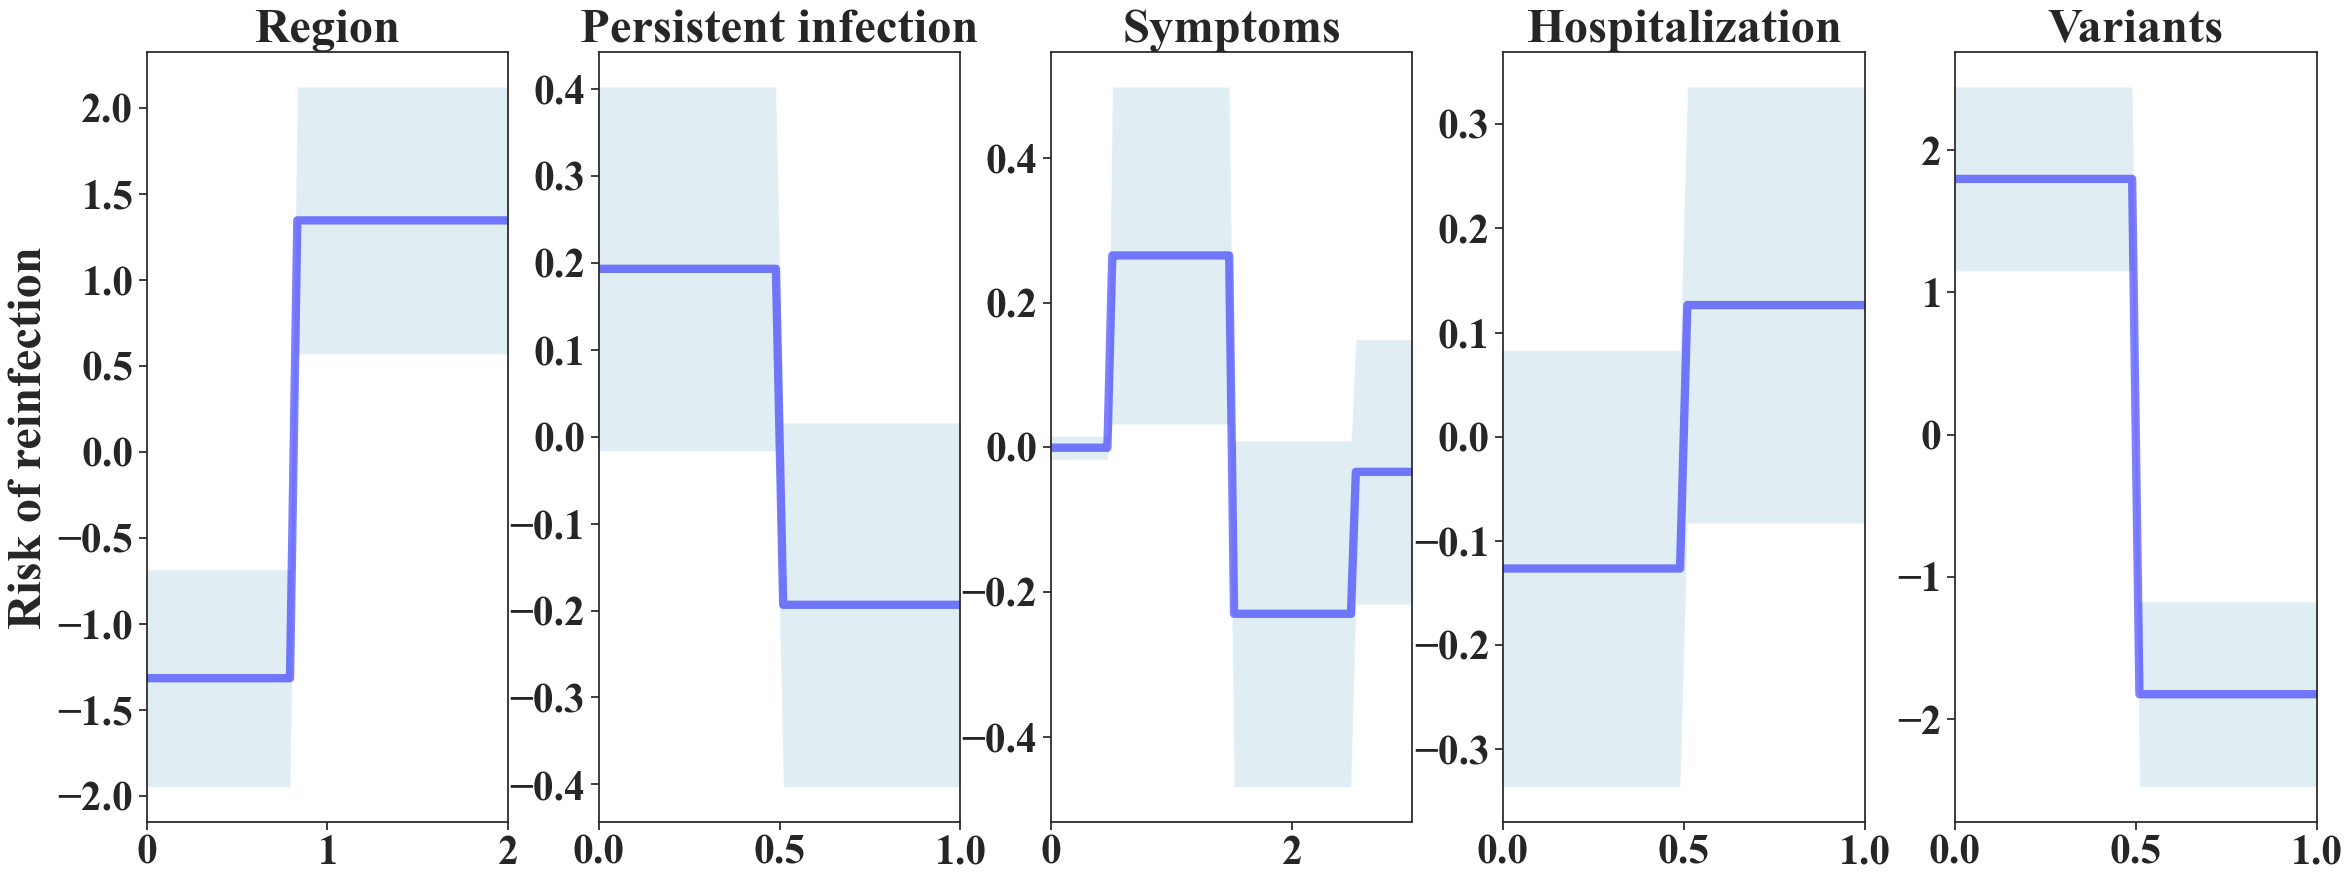

In [228]:



plt.figure()
fig, axs = plt.subplots(1,5, figsize=(28, 10));

titles = ['Region', 'Persistent infection', 'Symptoms','Hospitalization', 'Variants']
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX),linewidth = 6 ,color = '#0000FF', alpha=0.5)
    b = gam.partial_dependence(term = i, X=XX, width=.95)[1]
    y1 = b[0:,:1]
    y2 = b[0:,1:]
    y1 = y1.reshape(-1)
    y2 = y2.reshape(-1)
    ax.fill_between(XX[:, i], y1, y2, facecolor='#9AC9DB', alpha=0.3)
    if i == 0:
        ax.set_xlim(0,2)
        ax.set_ylabel('Risk of reinfection', fontdict={'fontsize': 35, 'fontweight': 'bold'})
        #ax.set_xlabel('T (℃)', fontdict={'fontsize': 26, 'fontweight': 'bold'})
        #ax.set_xticks(np.arange(15, 31, 5))
        #ax.set_xticklabels([str(x) for x in np.arange(15, 31, 5)])
    if i == 1:
        ax.set_xlim(0,1)
        #ax.set_xticks(np.arange(70, 91, 5))
        #ax.set_xticklabels([str(x) for x in np.arange(70, 91, 5)])   
        #ax.set_xlabel('U (%)', fontdict={'fontsize': 26, 'fontweight': 'bold'})
    if i == 2:
        ax.set_xlim(0,3)
        #ax.set_xticks(np.arange(0, 2501, 1000))
        #ax.set_xticklabels([str(x) for x in np.arange(0, 2501, 1000)])    
        #ax.set_xlabel('RRR (mm)', fontdict={'fontsize': 26, 'fontweight': 'bold'})
    if i == 3:
        ax.set_xlim(0,1)
       # ax.set_xlabel('Ff (m/s)', fontdict={'fontsize': 26, 'fontweight': 'bold'})
       # ax.set_xticks(np.arange(1.5, 3.1, 0.5))
       # ax.set_xticklabels([str(x) for x in np.arange(1.5, 3.5, 0.5)])   
    if i == 4:
        ax.set_xlim(0,1)   
    ax.set_title(titles[i], fontdict={'fontname': 'Times New Roman', 'fontsize': 35, 'fontweight': 'bold'})
    fig.subplots_adjust(wspace=0.25, hspace=0.5)
    ax.tick_params(axis='x', labelsize=30)
    ax.tick_params(axis='y', labelsize=30)
plt.savefig(f"D:\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\广义回归.pdf", dpi=450, bbox_inches='tight') 
plt.show()

In [ ]:
constraints_list = ['convex', 'concave', 'monotonic_inc', 'monotonic_dec', 'none']
lambda_list = [0.001,0.01,0.1,1,10,100,1000]
#n_splines_list = [[4]*13, [10]*13, [100]*13, [1000]*13]


X_reg = reg_df[[ 'reg3',   'var']].values
Y = reg_df['out']



results_df = pd.DataFrame(columns=['lambda', 'R','AIC', 'Accuracy'])

for lambda_ in lambda_list:
    constraints = None
    gam =  LogisticGAM(f(0) + f(1) ,
                      constraints=constraints, 
                    lam=lambda_).fit(X_reg, Y)

    # 将结果存储到数据帧中
    results_df = results_df.append({'lambda': lambda_,
                                    'R': gam.statistics_['pseudo_r2']['McFadden'],
                                    'AIC': gam.statistics_['AIC'],
                                    'Accuracy': gam.accuracy(X_reg, Y)}, ignore_index=True)
results_df

In [153]:
1

Index(['Unnamed: 0', 'sex', 'age_group', 'age', 'workpalce', 'Region', 'Reg_U',
       'Persistent_infection', 'symp_pi', 'Vaccine_status', 'vac2', 'Hosp',
       'Variants', 'out', 't'],
      dtype='object')

In [166]:
constraints_list = ['convex', 'concave', 'monotonic_inc', 'monotonic_dec', 'none']
lambda_list = [0.001,0.01,0.1,1,10,100,1000]
n_splines_list = [[1000]*9,[250]*9, [25]*9, [15]*9,[10]*9,[5]*9,[4]*9,]


X_reg = reg_df[['sex', 'age','workpalce','Reg_U', 'Persistent_infection','symp_pi', 'vac2', 'Hosp', 'Variants']].values
Y = reg_df['out']




results_df = pd.DataFrame(columns=['lambda', 'R','AIC', 'Accuracy'])

for lambda_ in lambda_list:
    constraints = None
    gam =  LogisticGAM(f(0) + s(1) + f(2) + f(3) + f(4) + f(5) + f(6)+ f(7) + f(8)  ,
                      constraints= None, 
                    lam=lambda_).fit(X_reg, Y)

    # 将结果存储到数据帧中
    results_df = results_df.append({'lambda': lambda_,
                                    'R': gam.statistics_['pseudo_r2']['McFadden'],
                                    'AIC': gam.statistics_['AIC'],
                                    'Accuracy': gam.accuracy(X_reg, Y)}, ignore_index=True)
results_df

C:\Users\ZERO\AppData\Local\Temp\ipykernel_6876\2822720423.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'lambda': lambda_,
C:\Users\ZERO\AppData\Local\Temp\ipykernel_6876\2822720423.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'lambda': lambda_,
C:\Users\ZERO\AppData\Local\Temp\ipykernel_6876\2822720423.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'lambda': lambda_,
C:\Users\ZERO\AppData\Local\Temp\ipykernel_6876\2822720423.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'lambda': l

,lambda,R,AIC,Accuracy
0,0.001,0.698045,252.704947,0.886850
1,0.010,0.708768,250.463413,0.883792
2,0.100,0.724088,245.032362,0.883792
3,1.000,0.744510,238.276798,0.877676
4,10.000,0.834310,246.838007,0.853211
5,100.000,0.942182,265.226592,0.853211
6,1000.000,0.988688,274.409912,0.853211


In [34]:
constraints_list = ['convex', 'concave', 'monotonic_inc', 'monotonic_dec', 'none']
#lambda_list = [0.001,0.01,0.1,1,10,100,1000]
#n_splines_list = [[10]*9,[9]*9, [8]*9, [7]*9,[6]*9,[5]*9,[4]*9,]


X_reg = reg_df[['sex', 'age','workpalce','reg3', 'perinf','symp', 'vac', 'hosp', 'var']].values
Y = reg_df['out']


results_df = pd.DataFrame(columns=['lambda', 'R','AIC', 'Accuracy'])

for constraints in constraints_list :
    gam =  LogisticGAM(f(0) + s(1) + f(2) + f(3) + f(4) + f(5) + f(6)+ f(7) + f(8),
                      constraints=constraints).fit(X_reg, Y)

    # 将结果存储到数据帧中
    results_df = results_df.append({'lambda': constraints,
                                    'R': gam.statistics_['pseudo_r2']['McFadden'],
                                    'AIC': gam.statistics_['AIC'],
                                    'Accuracy': gam.accuracy(X_reg, Y)}, ignore_index=True)
results_df

C:\Users\ZERO\AppData\Local\Temp\ipykernel_22036\3390920655.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'lambda': constraints,
C:\Users\ZERO\AppData\Local\Temp\ipykernel_22036\3390920655.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'lambda': constraints,
C:\Users\ZERO\AppData\Local\Temp\ipykernel_22036\3390920655.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'lambda': constraints,
C:\Users\ZERO\AppData\Local\Temp\ipykernel_22036\3390920655.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.app

,lambda,R,AIC,Accuracy
0,convex,0.802806,242.840421,0.868502
1,concave,0.757616,230.075816,0.871560
2,monotonic_inc,0.902564,263.158842,0.853211
3,monotonic_dec,0.852184,248.968190,0.856269
4,none,0.725740,239.778059,0.880734



lambda_: 0.001
\R: 0.6877640888885986
\Gcv: None
\AIC: 255.39555966906883
\Accuracy: 0.8807339449541285


<Figure size 640x480 with 0 Axes>

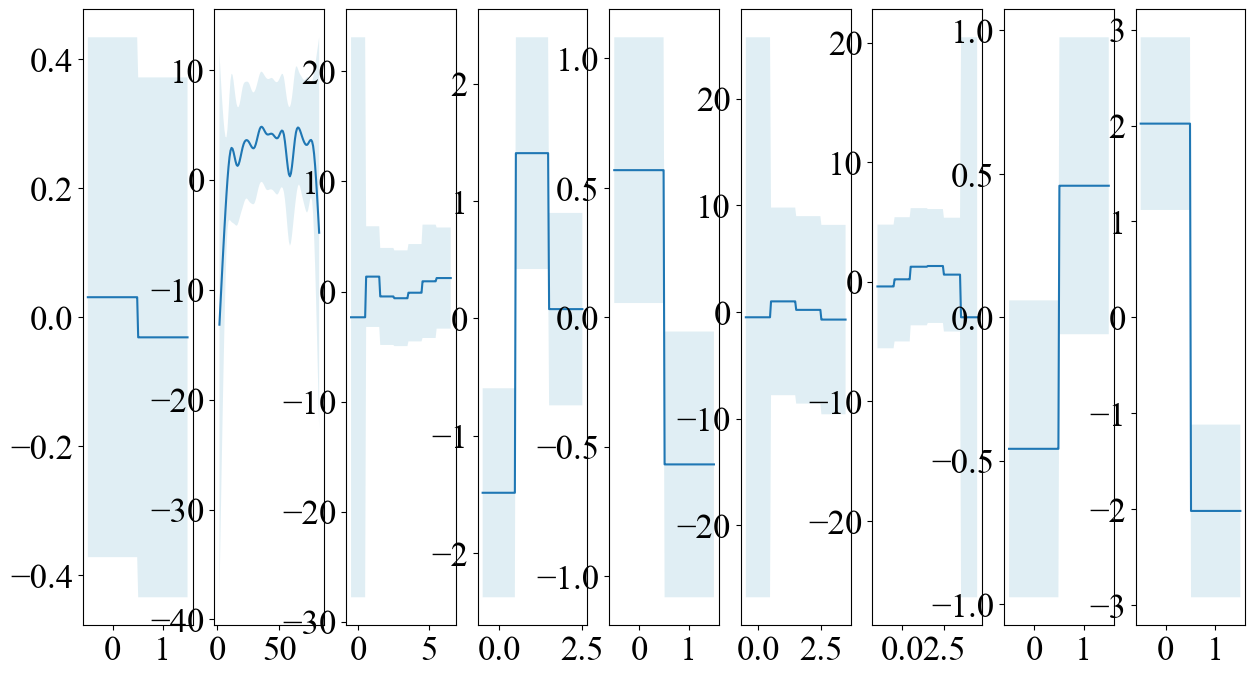


lambda_: 0.01
\R: 0.6977889141785296
\Gcv: None
\AIC: 252.43615804026058
\Accuracy: 0.8776758409785933


<Figure size 640x480 with 0 Axes>

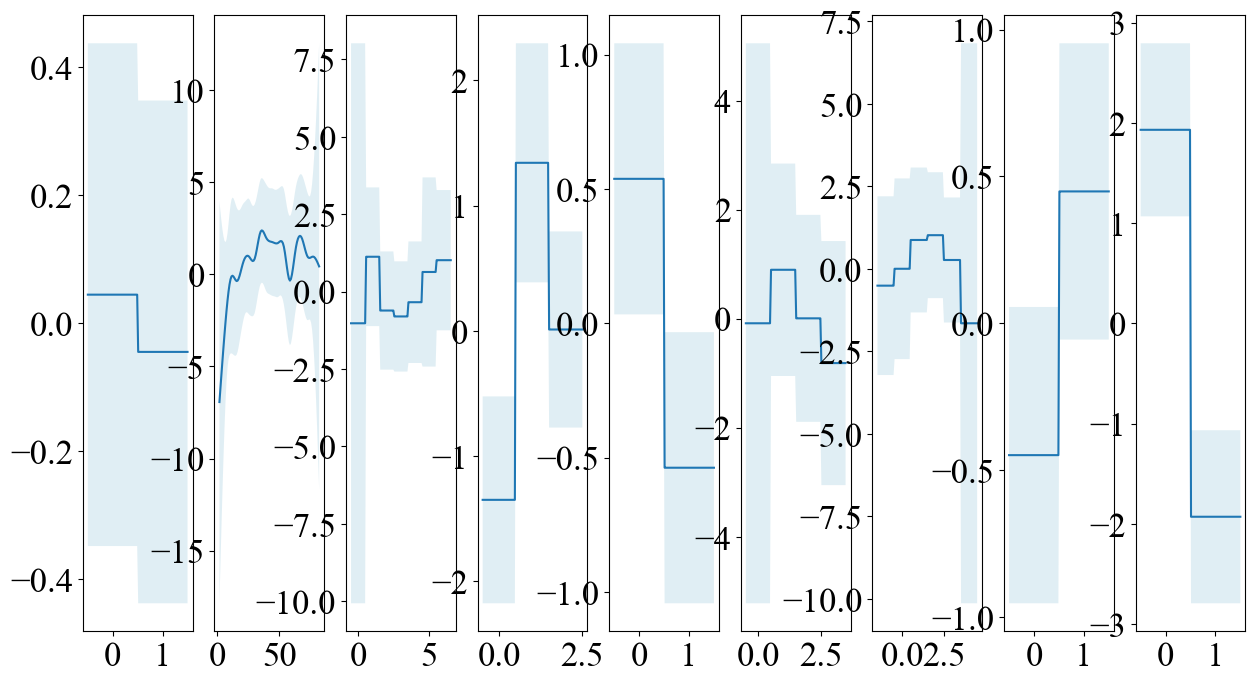


lambda_: 0.1
\R: 0.712231500867559
\Gcv: None
\AIC: 246.32098676783494
\Accuracy: 0.8776758409785933


<Figure size 640x480 with 0 Axes>

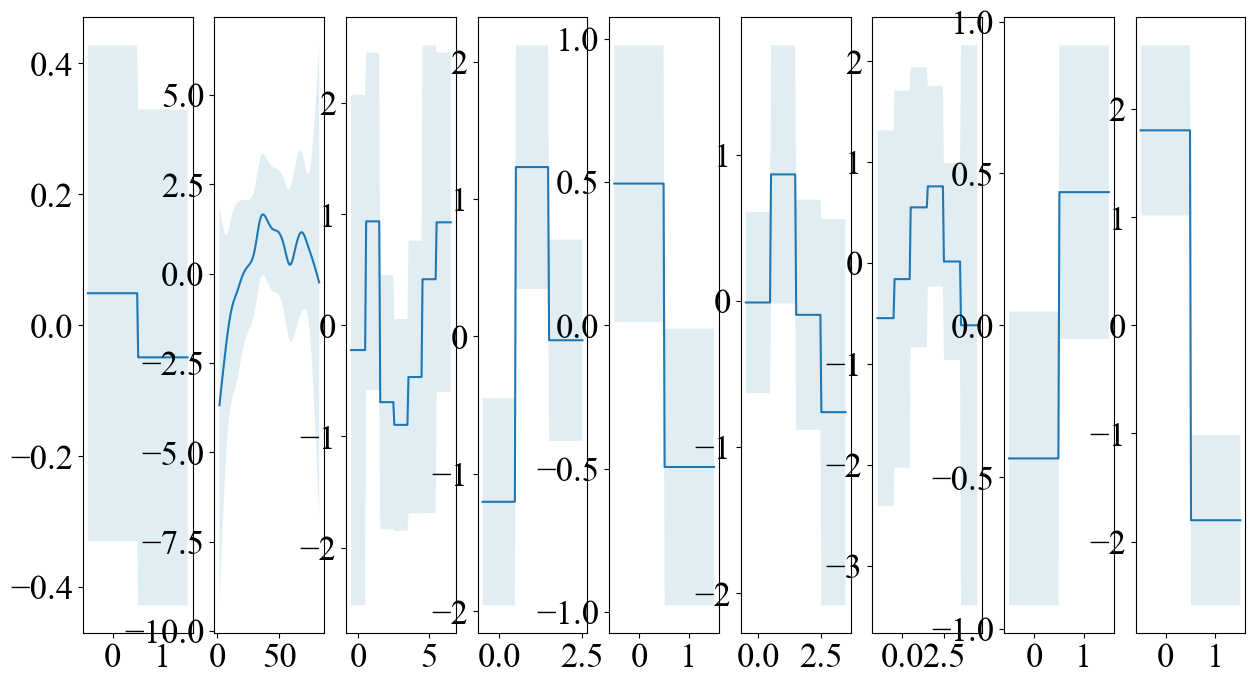


lambda_: 1
\R: 0.7333140208403158
\Gcv: None
\AIC: 238.3485464553235
\Accuracy: 0.8807339449541285


<Figure size 640x480 with 0 Axes>

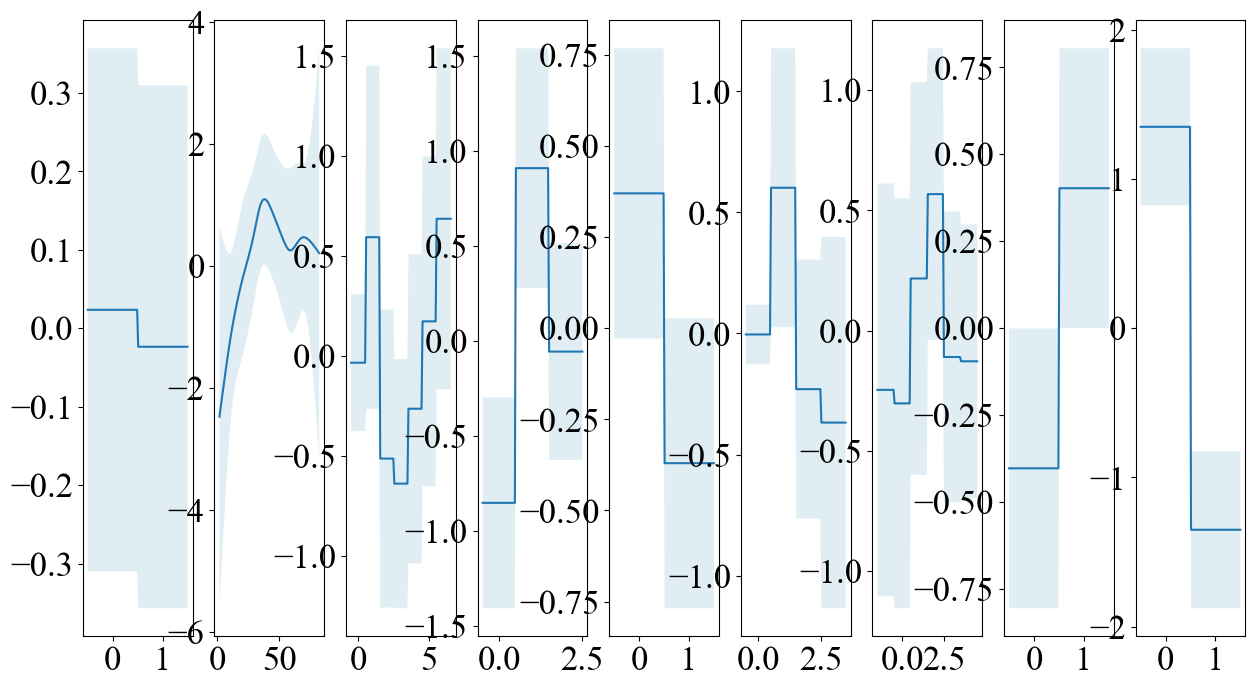


lambda_: 10
\R: 0.822269849264358
\Gcv: None
\AIC: 245.01632063171627
\Accuracy: 0.8562691131498471


<Figure size 640x480 with 0 Axes>

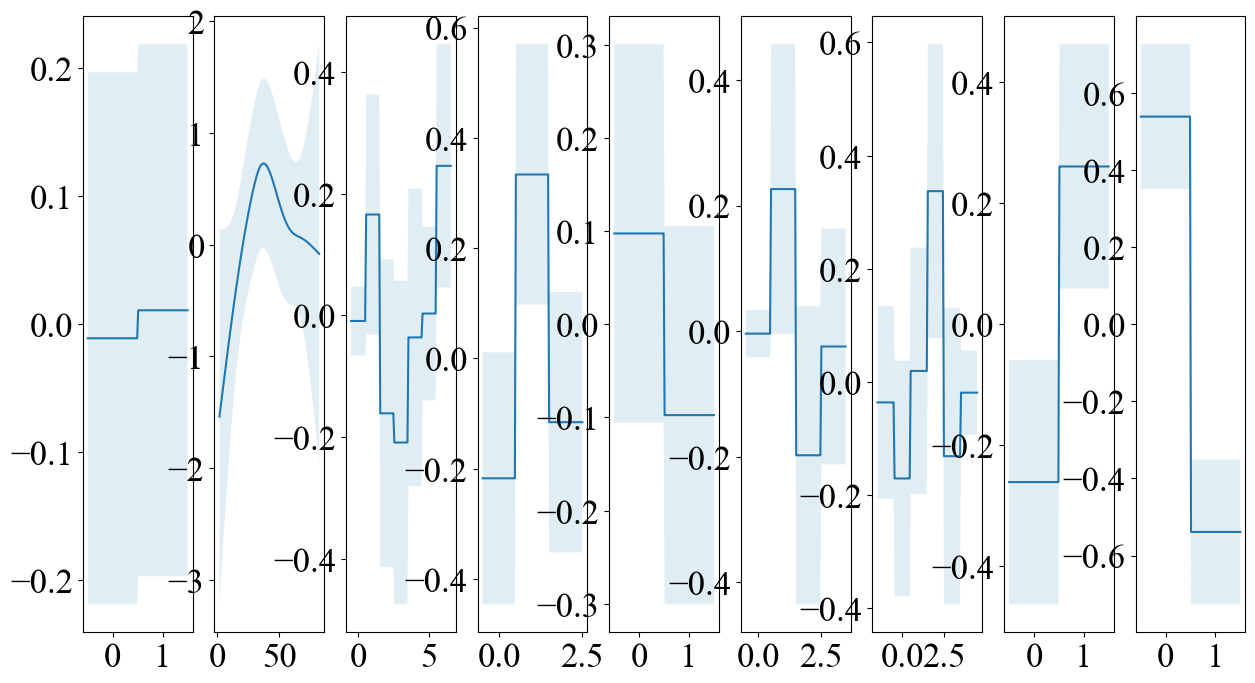


lambda_: 100
\R: 0.9381526163961904
\Gcv: None
\AIC: 264.41069858446645
\Accuracy: 0.8532110091743119


<Figure size 640x480 with 0 Axes>

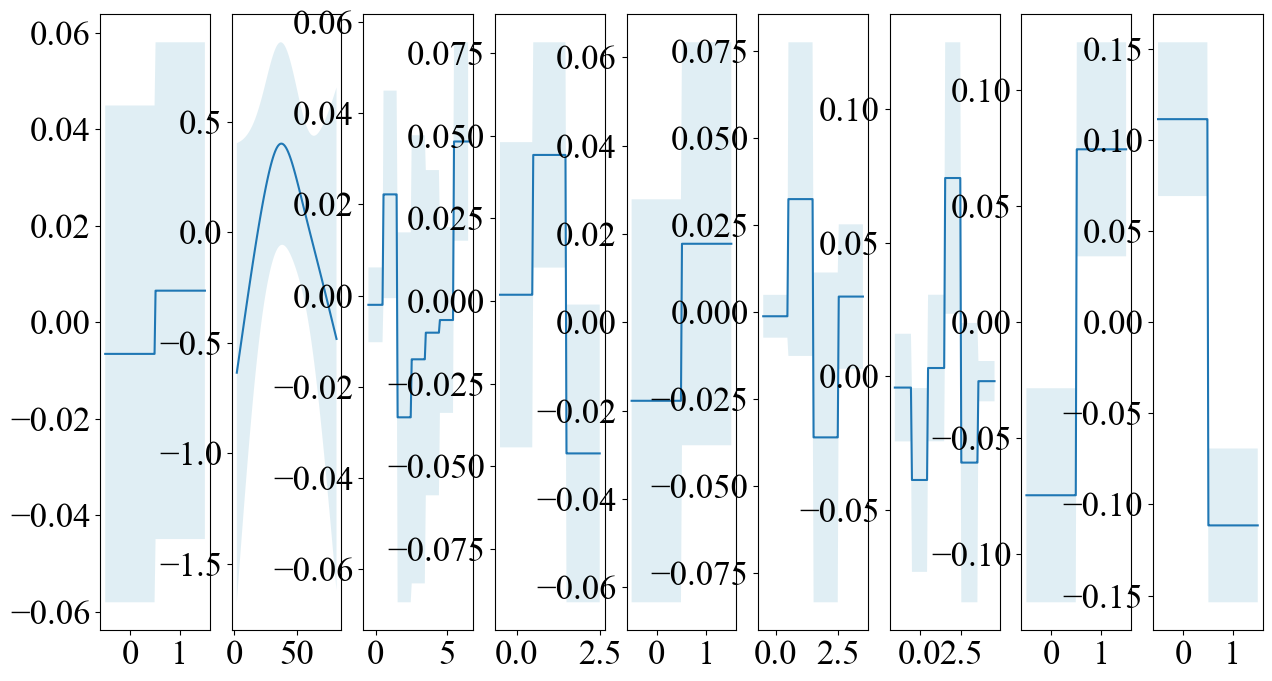


lambda_: 1000
\R: 0.9883094032930485
\Gcv: None
\AIC: 274.336098748146
\Accuracy: 0.8532110091743119


<Figure size 640x480 with 0 Axes>

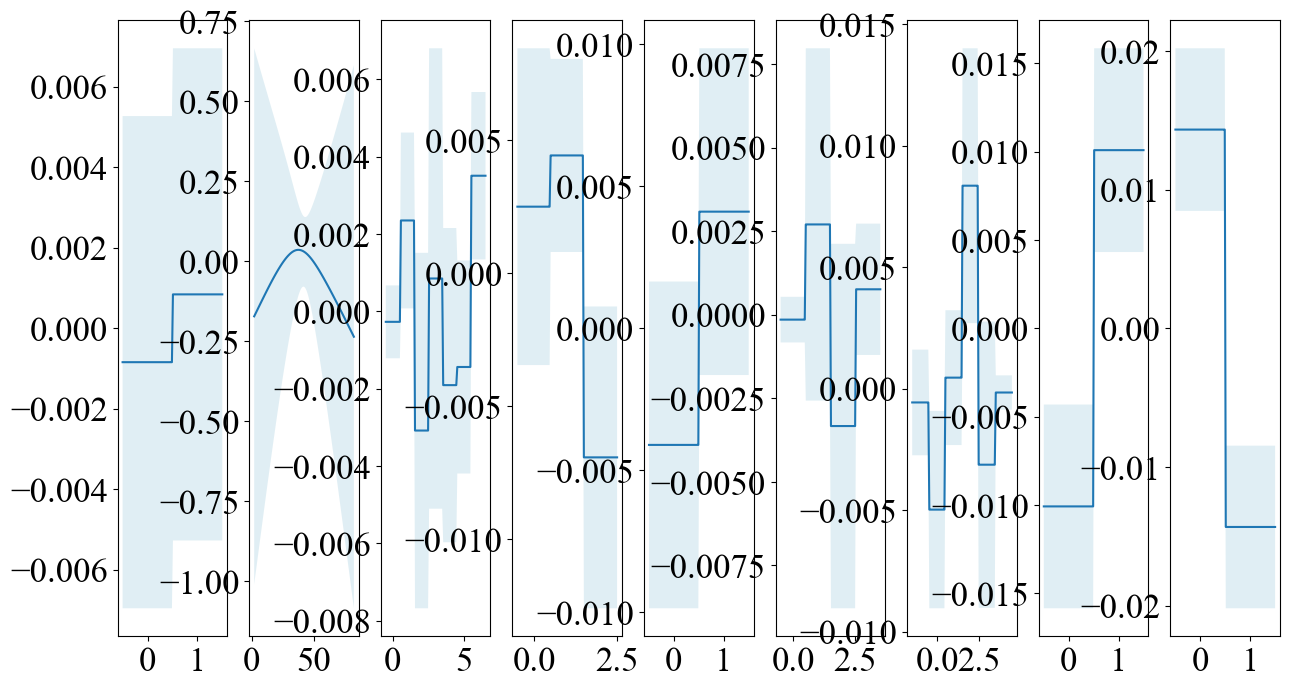

In [114]:
constraints_list = ['convex', 'concave', 'monotonic_inc', 'monotonic_dec', 'none']
lambda_list = [0.001,0.01,0.1,1,10,100,1000]
#n_splines_list = [[4]*13, [10]*13, [100]*13, [1000]*13]


X_reg = reg_df[['sex', 'age','workpalce','reg3', 'perinf','symp', 'vac', 'hosp', 'var']].values
Y = reg_df['out']


for lambda_ in lambda_list:
    constraints = None
    gam =  LogisticGAM(f(0) + s(1) + f(2) + f(3) + f(4) + f(5) + f(6)+ f(7) + f(8),
                      constraints=constraints, 
                    lam=lambda_).fit(X_reg, Y)

    print(f"\nlambda_: {lambda_}")
    print(f"\R: {gam.statistics_['pseudo_r2']['McFadden']}")
    print(f"\Gcv: {gam.statistics_['GCV']}")
    print(f"\AIC: {gam.statistics_['AIC']}")
    print(f"\Accuracy: {gam.accuracy(X_reg, Y)}")
    
    
    plt.figure()
    fig, axs = plt.subplots(1,9, figsize=(15, 8));

    #titles = ['Temperature','Relative humidity', 'Precipitation', 'Windspeed' ]
    for i, ax in enumerate(axs):
        XX = gam.generate_X_grid(term=i)
        ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
        b = gam.partial_dependence(term = i, X=XX, width=.95)[1]
        y1 = b[0:,:1]
        y2 = b[0:,1:]
        y1 = y1.reshape(-1)
        y2 = y2.reshape(-1)
        ax.fill_between(XX[:, i], y1, y2, facecolor='#9AC9DB', alpha=0.3)
        #ax.set_title(titles[i], fontdict={'fontname': 'Times New Roman', 'fontsize': 30, 'fontweight': 'bold'})
    plt.show()

## 4.4 survival analysis

In [446]:
from lifelines import KaplanMeierFitter

In [447]:
reg_df.columns

Index(['sex', 'age_group', 'age', 'workpalce', 'Region',
       'Persistent_infection', 'symp_pi', 'Vaccine_status', 'Hosp', 'Variants',
       'out', 'T_ending', 'Reg_U', 'vac2'],
      dtype='object')

In [448]:
reg_df.columns

Index(['sex', 'age_group', 'age', 'workpalce', 'Region',
       'Persistent_infection', 'symp_pi', 'Vaccine_status', 'Hosp', 'Variants',
       'out', 'T_ending', 'Reg_U', 'vac2'],
      dtype='object')

In [451]:
kmf = KaplanMeierFitter()
fit = kmf.fit(reg_df.T_ending, reg_df.out)
fit

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 327 total observations, 279 right-censored observations>

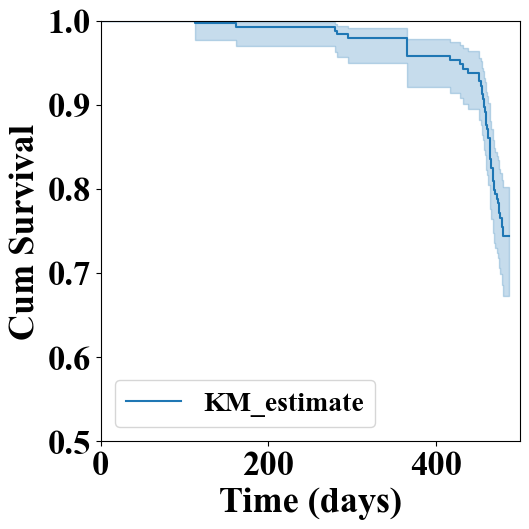

In [452]:
fig,ax = plt.subplots(figsize=(6,6))
plt.rc('font', family='Times New Roman', weight='bold', size=30)
kmf.plot_survival_function() 

plt.ylim(0.5,1)
plt.xlim(0,500)
plt.legend(loc = 'lower left',prop={'size': 20})
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
plt.xlabel('Time (days)', fontweight='bold', fontsize=26)
plt.ylabel('Cum Survival', fontweight='bold', fontsize=26)
plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)

plt.tight_layout()
plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\生存曲线.pdf", dpi=450, bbox_inches='tight')  


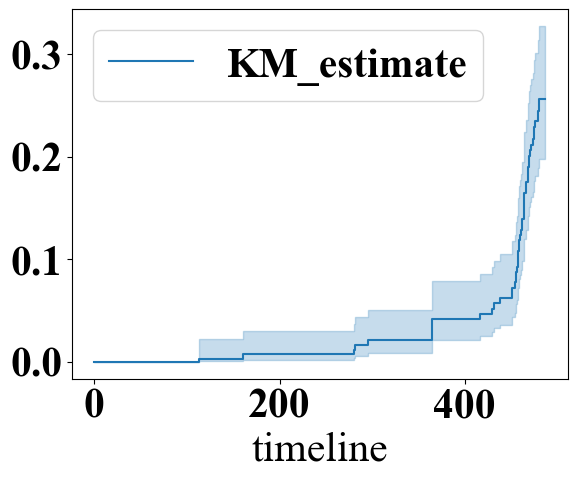

In [453]:
kmf.cumulative_density_   # 累计概率密度图

kmf.plot_cumulative_density() #
plt.legend(loc = 'upper left')

<AxesSubplot:xlabel='timeline'>

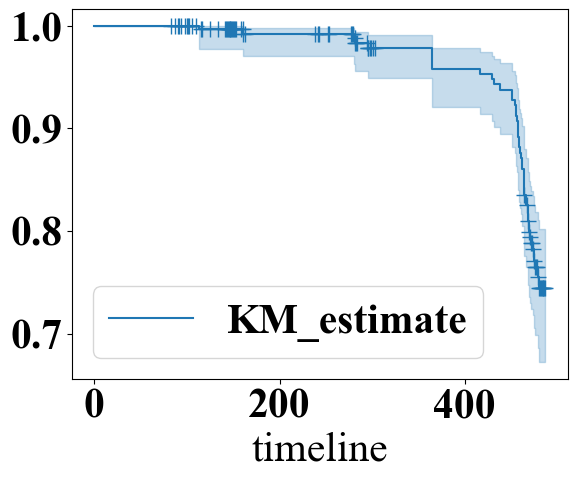

In [454]:
kmf.plot(show_censors = True)

In [455]:
 kmf.median_survival_time_

inf

In [28]:
y =kmf.confidence_interval_
y .to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\生存CI.xlsx')

In [29]:
x = kmf.survival_function_
x.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\生存函数.xlsx')

In [30]:
Z = kmf.event_table
Z.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\生存event_table.xlsx')

In [31]:
res = pd.concat([fit.event_table, fit.survival_function_], axis = 1)
res.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\生存分析.xlsx')

### 4.4.1 log rank tets

In [456]:
from lifelines import KaplanMeierFitter, CoxPHFitter        
from lifelines.statistics import logrank_test, multivariate_logrank_test,pairwise_logrank_test 
from sklearn.model_selection import train_test_split, GridSearchCV
from lifelines.utils.sklearn_adapter import sklearn_adapter
from lifelines.plotting import add_at_risk_counts
from sklearn import metrics
import time

In [457]:
reg_df.columns

Index(['sex', 'age_group', 'age', 'workpalce', 'Region',
       'Persistent_infection', 'symp_pi', 'Vaccine_status', 'Hosp', 'Variants',
       'out', 'T_ending', 'Reg_U', 'vac2'],
      dtype='object')

In [458]:
reg_df = reg_df .rename(columns={'sex':'Sex','Persistent_infection': 'Persistent infection', 'symp_pi': 'Symptoms',
                                'Hosp':'Hospitalization', 'Variants':'Variants','age_group':'Age group','workpalce':'Workplace'})
reg_df.columns

Index(['Sex', 'Age group', 'age', 'Workplace', 'Region',
       'Persistent infection', 'Symptoms', 'Vaccine_status', 'Hospitalization',
       'Variants', 'out', 'T_ending', 'Reg_U', 'vac2'],
      dtype='object')

In [459]:
reg_df.columns

Index(['Sex', 'Age group', 'age', 'Workplace', 'Region',
       'Persistent infection', 'Symptoms', 'Vaccine_status', 'Hospitalization',
       'Variants', 'out', 'T_ending', 'Reg_U', 'vac2'],
      dtype='object')

In [460]:
obj_list =['Sex', 'Age group', 'Workplace', 'Region', 'Reg_U','Persistent infection','Symptoms',
           'Vaccine_status','Hospitalization','Variants']


In [461]:
obj_list = reg_df.select_dtypes(include="category").columns
obj_list

Index(['Sex', 'Age group', 'Workplace', 'Region', 'Persistent infection',
       'Symptoms', 'Vaccine_status', 'Hospitalization', 'Variants', 'Reg_U',
       'vac2'],
      dtype='object')

In [462]:
obj_list =['Sex', 'Age group', 'Workplace', 'Reg_U','Persistent infection','Symptoms',
           'Vaccine_status','Hospitalization','Variants']

In [465]:
reg_df = reg_df.rename(columns={'T_ending': 't'})

C:\Users\ZERO\AppData\Local\Temp\ipykernel_16332\1734445318.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log_df = log_df.append({'feature': feature,'degrees_of_freedom':degrees_of_freedom, 'test_statistic':test_statistic,
C:\Users\ZERO\AppData\Local\Temp\ipykernel_16332\1734445318.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log_df = log_df.append({'feature': feature,'degrees_of_freedom':degrees_of_freedom, 'test_statistic':test_statistic,
C:\Users\ZERO\AppData\Local\Temp\ipykernel_16332\1734445318.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log_df = log_df.append({'feature': feature,'degrees_of_freedom':degrees_of_freedom, 'test_statistic':test_statistic,
C:\Users\ZERO\AppData\Local\Temp\ipykernel_

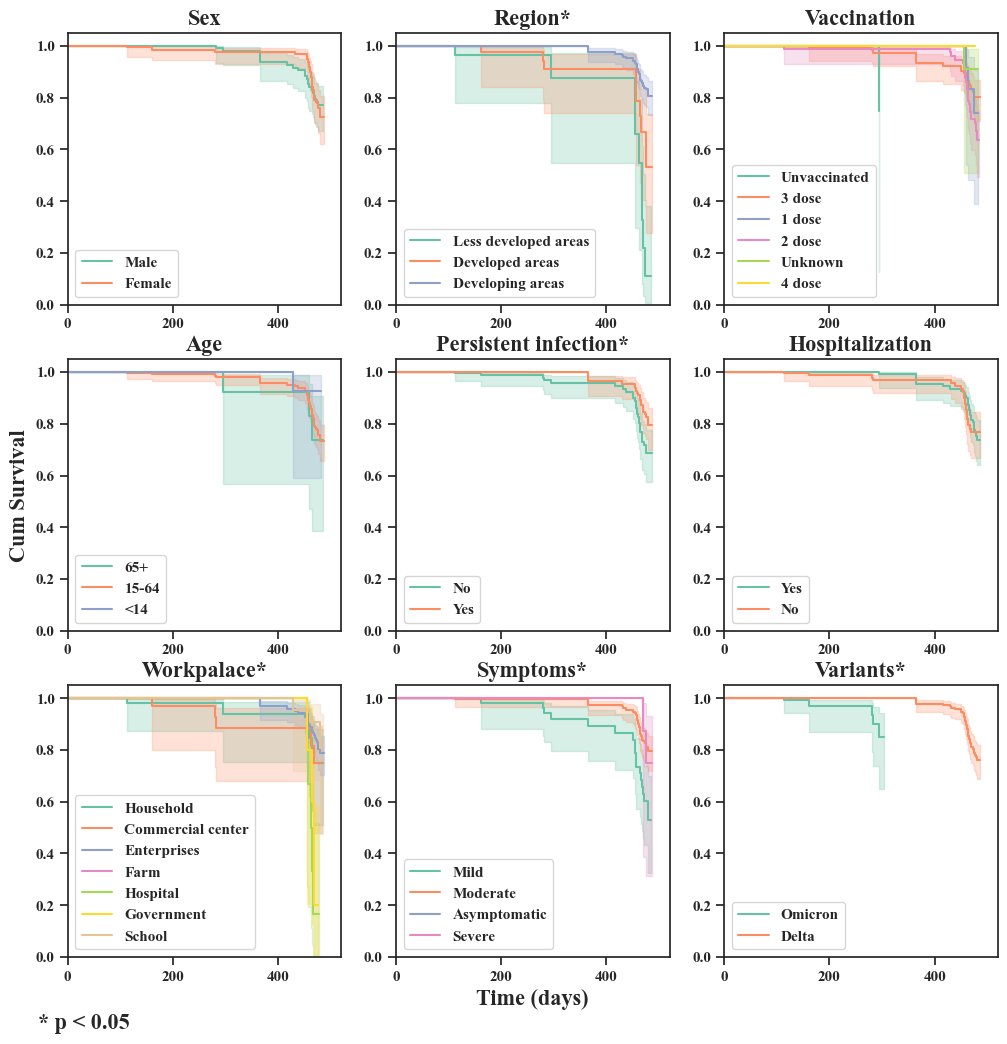

In [470]:
import seaborn as sns

sns.set(style='ticks', palette='Set2')
plt.rc('font', family='Times New Roman', weight='bold', size=10)
titles = ['Sex', 'Age', 'Workpalace', 'Region','Persistent infection','Symptoms','Vaccination','Hospitalization','Variants']
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12,12))  
log_df = pd.DataFrame(columns=['feature', 'degrees_of_freedom','test_statistic','p-value'])
pairs_dfs = pd.DataFrame()
for nrow in range(3):
    for ncol in range(3):
        feature = obj_list[ncol*3 + nrow]            
        for i in reg_df[feature].unique():
            
            kmf=KaplanMeierFitter()  
            df_tmp =  reg_df.loc[ reg_df[feature] == i]
            kmf.fit(df_tmp.t,  # 代表生存时长
                    event_observed=df_tmp.out,  # 代表检验的组别
                  label=i)  # 设置标签为 'Male' 或 'Female'
            # 绘制生存曲线
            kmf.plot_survival_function(ci_show=True, show_censors=False, ax=ax[nrow][ncol],label=i)  # 设置标签为 'Male' 或 'Female'
    
        
        p_value = multivariate_logrank_test(event_durations=reg_df.t,
                                            groups=reg_df[feature],
                                            event_observed=reg_df.out).p_value
        
        test_statistic = multivariate_logrank_test(event_durations=reg_df.t,
                                            groups=reg_df[feature],
                                            event_observed=reg_df.out).test_statistic
        degrees_of_freedom = multivariate_logrank_test(event_durations=reg_df.t,
                                            groups=reg_df[feature],
                                            event_observed=reg_df.out).degrees_of_freedom
        
        # 将结果添加到 DataFrame 中
        log_df = log_df.append({'feature': feature,'degrees_of_freedom':degrees_of_freedom, 'test_statistic':test_statistic, 
                                'p-value': p_value}, ignore_index=True)
        
        if p_value < 0.05:
            star = '*'
            pairs = pairwise_logrank_test(event_durations=reg_df.t,
                                   groups=reg_df[feature],
                                   event_observed=reg_df.out)
            pairs_df = pd.DataFrame(pairs.summary)
            
            pairs_df = pairs_df.reset_index()
            pairs_df.columns = ['group1', 'group2', 'test_statistic', 'p-value', '-log2(p)']
            pairs_df['feature'] = feature
            pairs_dfs = pd.concat([pairs_dfs,pairs_df], ignore_index=True)
         
        else:
            star = ''
            
    
        ax[nrow][ncol].set_xlim(0,520,100)
        ax[nrow][ncol].set_ylim(0,1.05)
        ax[nrow][ncol].set_title("{}{}".format(titles[ncol*3 + nrow], star), fontweight='bold', fontsize=16)  
    
        
        if nrow != 2 or ncol != 1:
            ax[nrow][ncol].set_xlabel('', fontweight='bold', fontsize=10)
        else:
            ax[nrow][ncol].set_xlabel('Time (days)', fontweight='bold', fontsize=16)
            
        if nrow != 1 or ncol != 0:
            ax[nrow][ncol].set_ylabel('', fontweight='bold', fontsize=10)
        else:
            ax[nrow][ncol].set_ylabel('Cum Survival', fontweight='bold', fontsize=16)
        
        handles, labels = ax[nrow][ncol].get_legend_handles_labels()
        handles = [handles[i] for i in np.argsort(labels)]
        labels = sorted(labels)
        ax[nrow][ncol].legend(handles, labels, loc='lower left')  # 对图例进行排序并更改标签值
        
        
        if nrow == 0 and ncol == 0:
            handles, labels = ax[nrow][ncol].get_legend_handles_labels()
            labels = ['Male' if label == '0' else 'Female' for label in labels]
            ax[nrow][ncol].legend(handles, labels)
            
        if nrow == 0 and ncol == 1:
            handles, labels = ax[nrow][ncol].get_legend_handles_labels()
            labels = [
        'Developing areas' if label == '0'else
        'Less developed areas' if label == '1' else
        'Developed areas' if label == '2' else label
        for label in labels]
            ax[nrow][ncol].legend(handles, labels)
        
        if nrow == 0 and ncol == 2:
            handles, labels = ax[nrow][ncol].get_legend_handles_labels()
            labels = [
        'Unvaccinated' if label == '0.0' else
        '1 dose' if label == '1.0' else
        '2 dose' if label == '2.0' else
        '3 dose' if label == '3.0' else 
        '4 dose' if label == '4.0' else        
        'Unknown' if label == '5.0' else label
        for label in labels]
            ax[nrow][ncol].legend(handles, labels)
        
        if nrow == 1 and ncol == 0:
            handles, labels = ax[nrow][ncol].get_legend_handles_labels()
            labels = [
        '<14' if label == '0' else
        '15-64' if label == '1' else
        '65+' if label == '2' else label
        for label in labels]
            ax[nrow][ncol].legend(handles, labels)
        
        if nrow == 1 and ncol == 1:
            handles, labels = ax[nrow][ncol].get_legend_handles_labels()
            labels = ['No' if label == '0' else 'Yes' for label in labels]
            ax[nrow][ncol].legend(handles, labels)
        
        if nrow == 1 and ncol == 2:
            handles, labels = ax[nrow][ncol].get_legend_handles_labels()
            labels = ['No' if label == '0' else 'Yes' for label in labels]
            ax[nrow][ncol].legend(handles, labels)
            
        if nrow == 2 and ncol == 0:
            handles, labels = ax[nrow][ncol].get_legend_handles_labels()
            labels = [
        'Farm' if label == '0' else
        'Government' if label == '1' else
        'Commercial center' if label == '2' else
        'Enterprises' if label == '3' else 
        'Household' if label == '4' else
        'School' if label == '5' else        
        'Hospital' if label == '6' else label
        for label in labels]
            ax[nrow][ncol].legend(handles, labels)
            
        if nrow == 2 and ncol == 1:
            handles, labels = ax[nrow][ncol].get_legend_handles_labels()
            labels = [
        'Asymptomatic' if label == '0' else
        'Mild' if label == '1' else
        'Moderate' if label == '2' else       
        'Severe' if label == '3' else label
        for label in labels]
            ax[nrow][ncol].legend(handles, labels)
            
        if nrow == 2 and ncol == 2:
            handles, labels = ax[nrow][ncol].get_legend_handles_labels()
            labels = ['Delta' if label == '0' else 'Omicron' for label in labels]
            ax[nrow][ncol].legend(handles, labels)    
            
            
fig.text(0.1, 0.05, '* p < 0.05', fontweight='bold', fontsize=16)

plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\log_rank.pdf", dpi=450, bbox_inches='tight')  

In [26]:
log_df.to_excel(('D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\log_df_test.xlsx'))

In [27]:
pairs_dfs.to_excel(('D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\Log_rank22.xlsx'))

In [28]:
 curve_df.to_excel(('D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\Log_rank生存曲线.xlsx'))

### 4.4.2 Hierarchical analysis

In [471]:
obj_list =['Sex', 'Age group', 'Workplace', 'Reg_U','Persistent infection','Symptoms',
           'Vaccine_status','Hospitalization','Variants']

In [472]:
obj_list = pd.Index(obj_list)
Nobj_list = obj_list

In [473]:
obj_list

Index(['Sex', 'Age group', 'Workplace', 'Reg_U', 'Persistent infection',
       'Symptoms', 'Vaccine_status', 'Hospitalization', 'Variants'],
      dtype='object')

In [474]:
for feature in Nobj_list.drop('Sex'):
    for i in reg_df[feature].unique():
        df_tmp = reg_df.loc[reg_df[feature] == i]
        p_value = multivariate_logrank_test(event_durations = df_tmp.t,
                                            groups=df_tmp.Sex,
                                            event_observed=df_tmp.out 
                                           ).p_value
 

In [475]:
pairs_dfs = pd.DataFrame()  # initialize an empty DataFrame to store the results of pairwise_logrank_test

for feature in Nobj_list.drop('Age group'):
    for i in reg_df[feature].unique():
        df_tmp = reg_df.loc[reg_df[feature] == i]
        test_results = multivariate_logrank_test(event_durations = df_tmp.t,
                                                 groups=df_tmp['Age group'],
                                                 event_observed=df_tmp.out)
        p_value = test_results.p_value
        test_statistic = test_results.test_statistic
        degrees_of_freedom = test_results.degrees_of_freedom

In [476]:
pairs_dfs = pd.DataFrame()  # initialize an empty DataFrame to store the results of pairwise_logrank_test

for feature in Nobj_list.drop('Hospitalization'):
    for i in reg_df[feature].unique():
        df_tmp = reg_df.loc[reg_df[feature] == i]
        test_results = multivariate_logrank_test(event_durations = df_tmp.t,
                                                 groups=df_tmp['Hospitalization'],
                                                 event_observed=df_tmp.out)
        p_value = test_results.p_value
        test_statistic = test_results.test_statistic
        degrees_of_freedom = test_results.degrees_of_freedom

        if p_value <= 0.05:
            p_value_text = 'p-value < 0.05, p is {:.3f}, test statistic is {:.3f}, degrees of freedom is {}'.format(p_value, test_statistic, degrees_of_freedom) if p_value < 0.05 else 'p-value = {:.3f}'.format(p_value)
            print('Hospitalization : {}={}, logrank test {}'.format(feature, i, p_value_text))

            pairs = pairwise_logrank_test(event_durations = df_tmp.t,
                                          groups=df_tmp['Hospitalization'],
                                          event_observed=df_tmp.out)
            pairs_df = pd.DataFrame(pairs.summary)

            pairs_df = pairs_df.reset_index()
            pairs_df.columns = ['group1', 'group2', 'test_statistic', 'p-value', '-log2(p)']
            pairs_df['feature'] = feature
            pairs_dfs = pd.concat([pairs_dfs,pairs_df], ignore_index=True)
pairs_dfs.to_excel(('D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\分层1.xlsx'))

Hospitalization : Workplace=6, logrank test p-value < 0.05, p is 0.049, test statistic is 3.863, degrees of freedom is 1


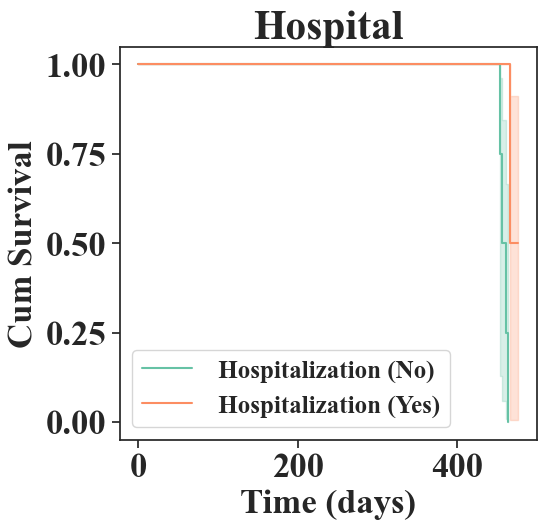

In [477]:
fig,ax = plt.subplots(figsize=(6,6))
plt.rc('font', family='Times New Roman', weight='bold', size=30)
reg_df1 =  reg_df.loc[(reg_df['Hospitalization']== 0) & (reg_df.Workplace == 6)]
kmf1 = KaplanMeierFitter().fit(reg_df1.t, 
                                   reg_df1.out, 
                                   label=' Hospitalization (No)')
ax = kmf1.plot_survival_function(ax=ax,ci_show=True,  show_censors =False)


reg_df2 =  reg_df.loc[(reg_df['Hospitalization']== 1) & (reg_df.Workplace == 6)]
kmf2 = KaplanMeierFitter().fit(reg_df2.t, 
                                   reg_df2.out, 
                                   label=' Hospitalization (Yes)')

ax = kmf2.plot_survival_function(ax=ax,ci_show=True,  show_censors = False)
ax.set_xlabel('Time (days)', fontweight='bold', fontsize=25)
ax.set_ylabel('Cum Survival', fontweight='bold', fontsize=25)
ax.legend(prop={'size': 18})
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_title('Hospital', fontweight='bold', fontsize=30)
#from lifelines.plotting import add_at_risk_counts
#add_at_risk_counts(kmf1,kmf2, kmf3 ,ax=ax)
plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\layers_1.pdf", dpi=450, bbox_inches='tight')
plt.tight_layout()

In [478]:
pairs_dfs = pd.DataFrame()  # initialize an empty DataFrame to store the results of pairwise_logrank_test

for feature in Nobj_list.drop('Vaccine_status'):
    for i in reg_df[feature].unique():
        df_tmp = reg_df.loc[reg_df[feature] == i]
        test_results = multivariate_logrank_test(event_durations = df_tmp.t,
                                                 groups=df_tmp['Vaccine_status'],
                                                 event_observed=df_tmp.out)
        p_value = test_results.p_value
        test_statistic = test_results.test_statistic
        degrees_of_freedom = test_results.degrees_of_freedom

        if p_value <= 0.05:
            p_value_text = 'p-value < 0.05, p is {:.3f}, test statistic is {:.3f}, degrees of freedom is {}'.format(p_value, test_statistic, degrees_of_freedom) if p_value < 0.05 else 'p-value = {:.3f}'.format(p_value)
            print('Vaccine_status : {}={}, logrank test {}'.format(feature, i, p_value_text))

            pairs = pairwise_logrank_test(event_durations = df_tmp.t,
                                          groups=df_tmp['Vaccine_status'],
                                          event_observed=df_tmp.out)
            pairs_df = pd.DataFrame(pairs.summary)

            pairs_df = pairs_df.reset_index()
            pairs_df.columns = ['group1', 'group2', 'test_statistic', 'p-value', '-log2(p)']
            pairs_df['feature'] = feature
            pairs_dfs = pd.concat([pairs_dfs,pairs_df], ignore_index=True)
pairs_dfs.to_excel(('D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\分层2.xlsx'))

Vaccine_status : Sex=0, logrank test p-value < 0.05, p is 0.038, test statistic is 11.766, degrees of freedom is 5
Vaccine_status : Age group=2, logrank test p-value < 0.05, p is 0.007, test statistic is 12.225, degrees of freedom is 3
Vaccine_status : Hospitalization=1, logrank test p-value < 0.05, p is 0.000, test statistic is 110.273, degrees of freedom is 5


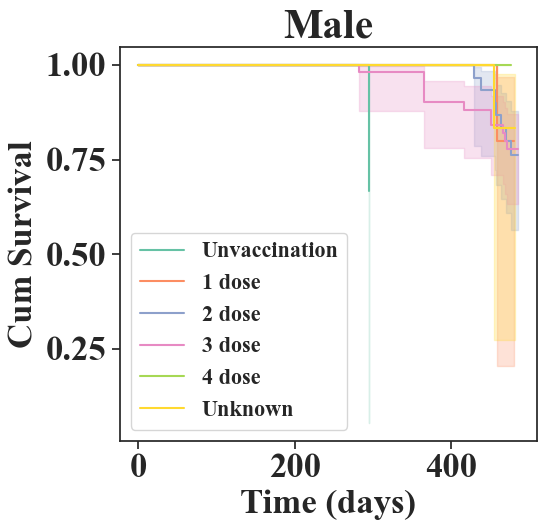

In [479]:
fig,ax = plt.subplots(figsize=(6,6))
plt.rc('font', family='Times New Roman', weight='bold', size=30)
reg_df1 =  reg_df.loc[(reg_df['Vaccine_status']== 0) & (reg_df.Sex == 0)]
kmf1 = KaplanMeierFitter().fit(reg_df1.t, 
                                   reg_df1.out, 
                                   label='Unvaccination')
ax = kmf1.plot_survival_function(ax=ax,ci_show=True,  show_censors = False)


reg_df2 =  reg_df.loc[(reg_df['Vaccine_status']== 1) & (reg_df.Sex == 0)]
kmf2 = KaplanMeierFitter().fit(reg_df2.t, 
                                   reg_df2.out, 
                                   label='1 dose')

ax = kmf2.plot_survival_function(ax=ax,ci_show=True,  show_censors = False)



reg_df3 =  reg_df.loc[(reg_df['Vaccine_status']== 2) & (reg_df.Sex == 0)]
kmf3 = KaplanMeierFitter().fit(reg_df3.t, 
                                   reg_df3.out, 
                                   label='2 dose')

ax = kmf3.plot_survival_function(ax=ax,ci_show=True,  show_censors =False)


reg_df4 =  reg_df.loc[(reg_df['Vaccine_status']== 3) & (reg_df.Sex == 0)]
kmf4 = KaplanMeierFitter().fit(reg_df4.t, 
                                   reg_df4.out, 
                                   label='3 dose')

ax = kmf4.plot_survival_function(ax=ax,ci_show=True,  show_censors = False)

reg_df5 =  reg_df.loc[(reg_df['Vaccine_status']== 4) & (reg_df.Sex == 0)]
kmf5 = KaplanMeierFitter().fit(reg_df5.t, 
                                   reg_df5.out, 
                                   label='4 dose')

ax = kmf5.plot_survival_function(ax=ax,ci_show=True,  show_censors = False)


reg_df6 =  reg_df.loc[(reg_df['Vaccine_status']== 5) & (reg_df.Sex == 0)]
kmf6 = KaplanMeierFitter().fit(reg_df6.t, 
                                   reg_df6.out, 
                                   label='Unknown')

ax = kmf6.plot_survival_function(ax=ax,ci_show=True,  show_censors = False)



ax.set_xlabel('Time (days)', fontweight='bold', fontsize=25)
ax.set_ylabel('Cum Survival', fontweight='bold', fontsize=25)
ax.legend(prop={'size':16})
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_title('Male', fontweight='bold', fontsize=30)
#from lifelines.plotting import add_at_risk_counts
#add_at_risk_counts(kmf1,kmf2, kmf3 ,ax=ax)
plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\layers_2.pdf", dpi=450, bbox_inches='tight')
plt.tight_layout()

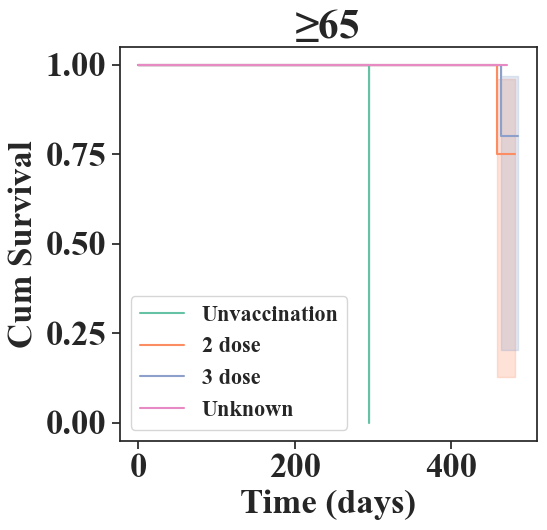

In [480]:
fig,ax = plt.subplots(figsize=(6,6))
plt.rc('font', family='Times New Roman', weight='bold', size=30)
reg_df1 =  reg_df.loc[(reg_df['Vaccine_status']== 0) & (reg_df['Age group'] ==2)]
kmf1 = KaplanMeierFitter().fit(reg_df1.t, 
                                   reg_df1.out, 
                                   label='Unvaccination')
ax = kmf1.plot_survival_function(ax=ax,ci_show=True,  show_censors = False)


#reg_df2 =  reg_df.loc[(reg_df['Vaccine_status']== 1) & (reg_df['Age group'] ==2)]
#kmf2 = KaplanMeierFitter().fit(reg_df2.t, 
                                 #  reg_df2.out, 
                                 #  label='1 dose')

#ax = kmf2.plot_survival_function(ax=ax,ci_show=True,  show_censors = True)



reg_df3 =  reg_df.loc[(reg_df['Vaccine_status']== 2) & (reg_df['Age group'] ==2)]
kmf3 = KaplanMeierFitter().fit(reg_df3.t, 
                                   reg_df3.out, 
                                   label='2 dose')

ax = kmf3.plot_survival_function(ax=ax,ci_show=True,  show_censors = False)


reg_df4 =  reg_df.loc[(reg_df['Vaccine_status']== 3) & (reg_df['Age group'] ==2)]
kmf4 = KaplanMeierFitter().fit(reg_df4.t, 
                                   reg_df4.out, 
                                  label='3 dose')

ax = kmf4.plot_survival_function(ax=ax,ci_show=True,  show_censors = False)

#reg_df5 =  reg_df.loc[(reg_df['Vaccine_status']== 4) & (reg_df['Age group'] ==2)]
#kmf5 = KaplanMeierFitter().fit(reg_df5.t, 
                               #    reg_df5.out, 
                                  # label='4 dose')

#ax = kmf5.plot_survival_function(ax=ax,ci_show=True,  show_censors = True)


reg_df6 =  reg_df.loc[(reg_df['Vaccine_status']== 5) &(reg_df['Age group'] ==2)]
kmf6 = KaplanMeierFitter().fit(reg_df6.t, 
                                   reg_df6.out, 
                                   label='Unknown')

ax = kmf6.plot_survival_function(ax=ax,ci_show=True,  show_censors = False)



ax.set_xlabel('Time (days)', fontweight='bold', fontsize=25)
ax.set_ylabel('Cum Survival', fontweight='bold', fontsize=25)
ax.legend(prop={'size':16})
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_title('≥65', fontweight='bold', fontsize=30)
#from lifelines.plotting import add_at_risk_counts
#add_at_risk_counts(kmf1,kmf2, kmf3 ,ax=ax)
plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\layers_3.pdf", dpi=450, bbox_inches='tight')
plt.tight_layout()

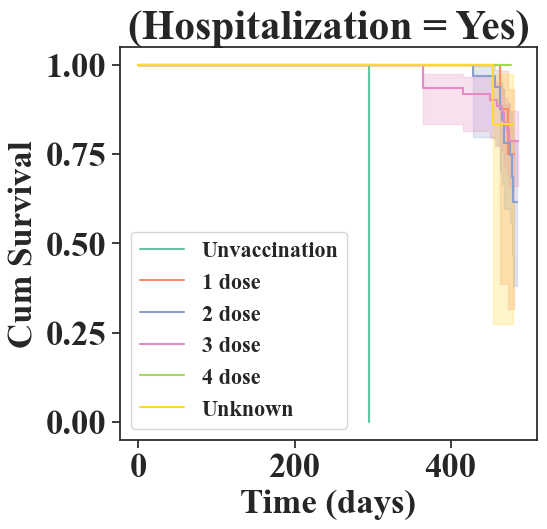

In [481]:
fig,ax = plt.subplots(figsize=(6,6))
plt.rc('font', family='Times New Roman', weight='bold', size=30)
reg_df1 =  reg_df.loc[(reg_df['Vaccine_status']== 0) & (reg_df.Hospitalization==1)]
kmf1 = KaplanMeierFitter().fit(reg_df1.t, 
                                   reg_df1.out, 
                                   label='Unvaccination')
ax = kmf1.plot_survival_function(ax=ax,ci_show=True,  show_censors = False)


reg_df2 =  reg_df.loc[(reg_df['Vaccine_status']== 1) & (reg_df.Hospitalization==1)]
kmf2 = KaplanMeierFitter().fit(reg_df2.t, 
                                  reg_df2.out, 
                                  label='1 dose')

ax = kmf2.plot_survival_function(ax=ax,ci_show=True,  show_censors = False)



reg_df3 =  reg_df.loc[(reg_df['Vaccine_status']== 2) & (reg_df.Hospitalization==1)]
kmf3 = KaplanMeierFitter().fit(reg_df3.t, 
                                   reg_df3.out, 
                                   label='2 dose')

ax = kmf3.plot_survival_function(ax=ax,ci_show=True,  show_censors = False)


reg_df4 =  reg_df.loc[(reg_df['Vaccine_status']== 3) & (reg_df.Hospitalization==1)]
kmf4 = KaplanMeierFitter().fit(reg_df4.t, 
                                   reg_df4.out, 
                                  label='3 dose')

ax = kmf4.plot_survival_function(ax=ax,ci_show=True,  show_censors = False)

reg_df5 =  reg_df.loc[(reg_df['Vaccine_status']== 4) & (reg_df.Hospitalization==1)]
kmf5 = KaplanMeierFitter().fit(reg_df5.t, 
                                  reg_df5.out, 
                                  label='4 dose')

ax = kmf5.plot_survival_function(ax=ax,ci_show=True,  show_censors = False)


reg_df6 =  reg_df.loc[(reg_df['Vaccine_status']== 5) &(reg_df.Hospitalization==1)]
kmf6 = KaplanMeierFitter().fit(reg_df6.t, 
                                   reg_df6.out, 
                                   label='Unknown')

ax = kmf6.plot_survival_function(ax=ax,ci_show=True,  show_censors = False)



ax.set_xlabel('Time (days)', fontweight='bold', fontsize=25)
ax.set_ylabel('Cum Survival', fontweight='bold', fontsize=25)
ax.legend(prop={'size':16})
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_title('(Hospitalization = Yes)', fontweight='bold', fontsize=30)
#from lifelines.plotting import add_at_risk_counts
#add_at_risk_counts(kmf1,kmf2, kmf3 ,ax=ax)
plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\layers_4.pdf", dpi=450, bbox_inches='tight')
plt.tight_layout()

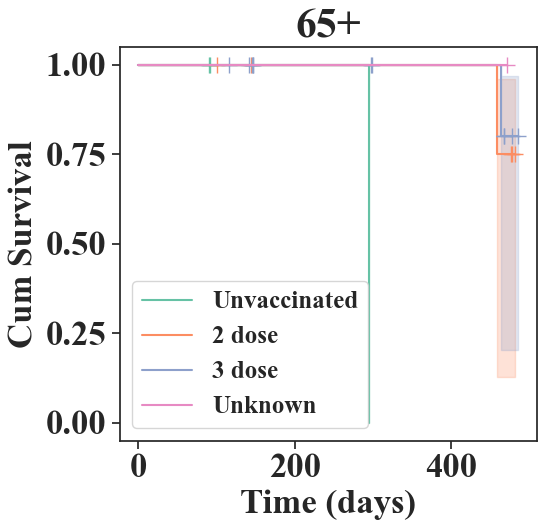

In [482]:
fig,ax = plt.subplots(figsize=(6,6))
plt.rc('font', family='Times New Roman', weight='bold', size=30)
reg_df1 =  reg_df.loc[(reg_df['Vaccine_status']== 0) & (reg_df['Age group'] == 2)]
kmf1 = KaplanMeierFitter().fit(reg_df1.t, 
                                   reg_df1.out, 
                                   label='Unvaccinated')
ax = kmf1.plot_survival_function(ax=ax,ci_show=True,  show_censors = True)


#reg_df2 =  reg_df.loc[(reg_df['Vaccine_status']== 1) & (reg_df['Age group'] == 2)]
#kmf2 = KaplanMeierFitter().fit(reg_df2.t, 
                                   #reg_df2.out, 
                                 #  label='1 dose')

#adx = kmf2.plot_survival_function(ax=ax,ci_show=True,  show_censors = True)


reg_df3=  reg_df.loc[(reg_df['Vaccine_status']== 2) & (reg_df['Age group'] == 2)]
kmf3 = KaplanMeierFitter().fit(reg_df3.t, 
                                   reg_df3.out, 
                                   label='2 dose')

ax = kmf3.plot_survival_function(ax=ax,ci_show=True,  show_censors = True)

reg_df4=  reg_df.loc[(reg_df['Vaccine_status']== 3) & (reg_df['Age group'] == 2)]
kmf4 = KaplanMeierFitter().fit(reg_df4.t, 
                                   reg_df4.out, 
                                   label='3 dose')

ax = kmf4.plot_survival_function(ax=ax,ci_show=True,  show_censors = True)


#reg_df5=  reg_df.loc[(reg_df['Vaccine_status']== 4) & (reg_df['Age group'] == 2)]
#kmf5 = KaplanMeierFitter().fit(reg_df5.t, 
                                  # reg_df5.out, 
                                #   label='4 dose')

#ax = kmf5.plot_survival_function(ax=ax,ci_show=True,  show_censors = True)

reg_df6=  reg_df.loc[(reg_df['Vaccine_status']== 5) & (reg_df['Age group'] == 2)]
kmf6 = KaplanMeierFitter().fit(reg_df6.t, 
                                   reg_df6.out, 
                                   label='Unknown')

ax = kmf6.plot_survival_function(ax=ax,ci_show=True,  show_censors = True)

ax.set_xlabel('Time (days)', fontweight='bold', fontsize=25)
ax.set_ylabel('Cum Survival', fontweight='bold', fontsize=25)
ax.legend(loc = 'lower left',prop={'size':18})
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_title('65+', fontweight='bold', fontsize=30)
 
plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\layers_5.pdf", dpi=450, bbox_inches='tight')
plt.tight_layout()

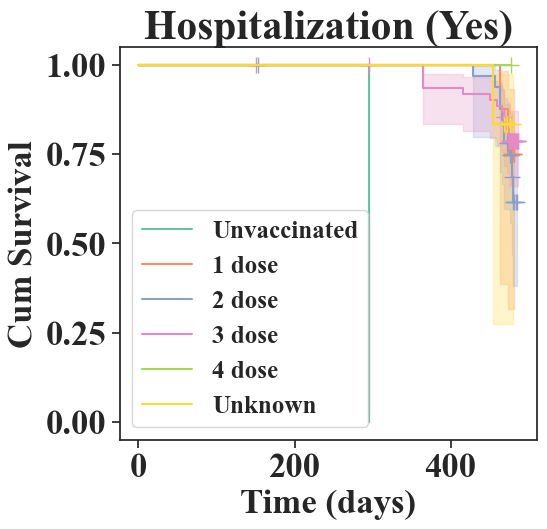

In [483]:
fig,ax = plt.subplots(figsize=(6,6))
plt.rc('font', family='Times New Roman', weight='bold', size=30)
reg_df1 =  reg_df.loc[(reg_df['Vaccine_status']== 0) & (reg_df['Hospitalization'] == 1)]
kmf1 = KaplanMeierFitter().fit(reg_df1.t, 
                                   reg_df1.out, 
                                   label='Unvaccinated')
ax = kmf1.plot_survival_function(ax=ax,ci_show=True,  show_censors = True)


reg_df2 =  reg_df.loc[(reg_df['Vaccine_status']== 1) & (reg_df['Hospitalization'] == 1)]
kmf2 = KaplanMeierFitter().fit(reg_df2.t, 
                                   reg_df2.out, 
                                   label='1 dose')

ax = kmf2.plot_survival_function(ax=ax,ci_show=True,  show_censors = True)


reg_df3=  reg_df.loc[(reg_df['Vaccine_status']== 2) & (reg_df['Hospitalization'] == 1)]
kmf3 = KaplanMeierFitter().fit(reg_df3.t, 
                                   reg_df3.out, 
                                   label='2 dose')

ax = kmf3.plot_survival_function(ax=ax,ci_show=True,  show_censors = True)

reg_df4=  reg_df.loc[(reg_df['Vaccine_status']== 3) & (reg_df['Hospitalization'] == 1)]
kmf4 = KaplanMeierFitter().fit(reg_df4.t, 
                                   reg_df4.out, 
                                   label='3 dose')

ax = kmf4.plot_survival_function(ax=ax,ci_show=True,  show_censors = True)


reg_df5=  reg_df.loc[(reg_df['Vaccine_status']== 4) & (reg_df['Hospitalization'] == 1)]
kmf5 = KaplanMeierFitter().fit(reg_df5.t, 
                                  reg_df5.out, 
                                label='4 dose')

ax = kmf5.plot_survival_function(ax=ax,ci_show=True,  show_censors = True)

reg_df6=  reg_df.loc[(reg_df['Vaccine_status']== 5) & (reg_df['Hospitalization'] == 1)]
kmf6 = KaplanMeierFitter().fit(reg_df6.t, 
                                   reg_df6.out, 
                                   label='Unknown')

ax = kmf6.plot_survival_function(ax=ax,ci_show=True,  show_censors = True)

ax.set_xlabel('Time (days)', fontweight='bold', fontsize=25)
ax.set_ylabel('Cum Survival', fontweight='bold', fontsize=25)
ax.legend(loc = 'lower left',prop={'size':18})
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_title('Hospitalization (Yes)', fontweight='bold', fontsize=30)
 
plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\layers_6.pdf", dpi=450, bbox_inches='tight')
plt.tight_layout()

In [202]:
for feature in Nobj_list.drop('Hospitalization'):
    for i in reg_df[feature].unique():
        df_tmp = reg_df.loc[reg_df[feature] == i]
        p_value = multivariate_logrank_test(event_durations = df_tmp.T_ending,
                                            groups=df_tmp.Hospitalization,
                                            event_observed=df_tmp.RI_status 
                                           ).p_value
        if p_value <= 0.05:
            p_value_text = ['p-value < 0.05' if p_value < 0.05 else 'p-value = %.3F'%p_value][0]
            print('Hospitalization : {}={}, logrank test {}'.format(feature, i, p_value_text))

Hospitalization : Workplace=Hospital , logrank test p-value < 0.05
Hospitalization : Region=Haicang district, logrank test p-value < 0.05
Hospitalization : Vaccine_status=Unvaccinated, logrank test p-value < 0.05
Hospitalization : Workplace (HCW)=Hospital , logrank test p-value < 0.05
Hospitalization : Vaccine status=Unvaccinated, logrank test p-value < 0.05
Hospitalization : Vaccination=Unvaccinated, logrank test p-value < 0.05


### 4.4 3 muti-Cox reg

In [485]:
from lifelines import CoxPHFitter

In [487]:
reg_df.columns

Index(['Sex', 'Age group', 'age', 'Workplace', 'Region',
       'Persistent infection', 'Symptoms', 'Vaccine_status', 'Hospitalization',
       'Variants', 'out', 't', 'Reg_U', 'vac2'],
      dtype='object')

In [488]:
reg_df_selected1 = reg_df[['Sex', 'age', 'Reg_U',  'Workplace','Persistent infection', 'Symptoms',  'vac2',  'Hospitalization', 'Variants', 'out', 't']]

In [489]:
reg_df_select_with_dummies1 = pd.get_dummies(reg_df_selected1, columns=['Sex',  'Workplace', 'Reg_U', 'Persistent infection', 'Symptoms',  'vac2',  'Hospitalization', 'Variants' ],drop_first=True)

In [490]:
cox1 = CoxPHFitter()  
cox1.fit(reg_df_select_with_dummies1 , duration_col = 't', event_col = 'out')  
cox1.print_summary()    

E:\Software\PY\ANAC\lib\site-packages\lifelines\fitters\coxph_fitter.py:1604: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 1.177. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or complete separation in the dataset?

  warnings.warn(


<lifelines.CoxPHFitter: fitted with 327 total observations, 279 right-censored observations>
             duration col = 't'
                event col = 'out'
      baseline estimation = breslow
   number of observations = 327
number of events observed = 48
   partial log-likelihood = -215.34
         time fit was run = 2024-06-17 14:00:00 UTC

---
                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                      
age                      0.01       1.01       0.02            -0.02             0.04                 0.98                 1.04
Sex_1                   -0.02       0.98       0.32            -0.65             0.61                 0.52                 1.84
Workplace_1             19.82   4.04e+08   34350.07        -67305.08         67344.71                 0.00                  inf
Workplace_2             18.14   7.57e+07   34350.07        -67306.75         67343.04                 0.00                  inf
Workplace_3             18.32   9.06e+07   34350.07        -67306.57         67343.22                 0.00                  inf
Workplace_4             18.41   9.93e+07   34350.07        -67306.48         67343.31                 0.00                  inf
Workplace_5             17.83   5.52e+07   34350.07        -67307.07         67342.72                 0.00                  inf
Workplace_6             19.64   3.37e+08   34350.07        -67305.26         67344.53                 0.00                  inf
Reg_U_1                  1.46       4.31       0.45             0.58             2.35                 1.78                10.44
Reg_U_2                  0.84       2.32       0.47            -0.09             1.77                 0.92                 5.84
Persistent infection_1  -0.50       0.61       0.36            -1.20             0.20                 0.30                 1.22
Symptoms_1              18.14   7.54e+07   49826.44        -97639.88         97676.16                 0.00                  inf
Symptoms_2              17.24   3.08e+07   49826.44        -97640.78         97675.26                 0.00                  inf
Symptoms_3              16.64   1.68e+07   49826.44        -97641.38         97674.66                 0.00                  inf
vac2_1                   1.28       3.61       1.19            -1.05             3.62                 0.35                37.28
vac2_2                   0.80       2.24       1.19            -1.52             3.13                 0.22                22.89
vac2_3                   0.59       1.80       1.61            -2.58             3.75                 0.08                42.53
Hospitalization_1        0.35       1.41       0.37            -0.39             1.08                 0.68                 2.95
Variants_1              19.04   1.86e+08    2978.49         -5818.69          5856.77                 0.00                  inf

                         cmp to     z      p   -log2(p)
covariate                                              
age                        0.00  0.40   0.69       0.53
Sex_1                      0.00 -0.06   0.95       0.07
Workplace_1                0.00  0.00   1.00       0.00
Workplace_2                0.00  0.00   1.00       0.00
Workplace_3                0.00  0.00   1.00       0.00
Workplace_4                0.00  0.00   1.00       0.00
Workplace_5                0.00  0.00   1.00       0.00
Workplace_6                0.00  0.00   1.00       0.00
Reg_U_1                    0.00  3.24 <0.005       9.71
Reg_U_2                    0.00  1.78   0.08       3.73
Persistent infection_1     0.00 -1.40   0.16       2.64
Symptoms_1                 0.00  0.00   1.00       0.00
Symptoms_2                 0.00  0.00   1.00       0.00
Symptoms_3                 0.00  0.00   1.00       0.00
vac2_1                     0.00  1.08   0.28       1.83
vac2_2  

In [491]:
reg_df_selected2 = reg_df[['Sex', 'age', 'Reg_U',  'Persistent infection', 'Symptoms',  'vac2',  'Hospitalization', 'Variants', 'out', 't']]

reg_df_select_with_dummies2 = pd.get_dummies(reg_df_selected2, columns= ['Sex','Reg_U',  'Persistent infection', 'Symptoms',  'vac2',  'Hospitalization', 'Variants'],drop_first=True)

In [492]:
cox2 = CoxPHFitter()  
cox2.fit(reg_df_select_with_dummies2 , duration_col = 't', event_col = 'out')  
cox2.print_summary()  

E:\Software\PY\ANAC\lib\site-packages\lifelines\fitters\coxph_fitter.py:1604: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.836. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or complete separation in the dataset?

  warnings.warn(


<lifelines.CoxPHFitter: fitted with 327 total observations, 279 right-censored observations>
             duration col = 't'
                event col = 'out'
      baseline estimation = breslow
   number of observations = 327
number of events observed = 48
   partial log-likelihood = -220.40
         time fit was run = 2024-06-17 14:00:03 UTC

---
                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                      
age                      0.01       1.01       0.01            -0.01             0.04                 0.99                 1.04
Sex_1                   -0.01       0.99       0.31            -0.62             0.59                 0.54                 1.81
Reg_U_1                  1.75       5.73       0.43             0.91             2.58                 2.47                13.25
Reg_U_2                  0.95       2.57       0.43             0.11             1.78                 1.11                 5.95
Persistent infection_1  -0.59       0.55       0.35            -1.27             0.09                 0.28                 1.10
Symptoms_1              19.50   2.93e+08  111845.19       -219193.04        219232.03                 0.00                  inf
Symptoms_2              18.59   1.19e+08  111845.19       -219193.95        219231.13                 0.00                  inf
Symptoms_3              18.52   1.10e+08  111845.19       -219194.02        219231.06                 0.00                  inf
vac2_1                   1.30       3.66       1.18            -1.02             3.61                 0.36                37.01
vac2_2                   0.76       2.14       1.17            -1.53             3.05                 0.22                21.15
vac2_3                   0.33       1.39       1.56            -2.73             3.38                 0.07                29.44
Hospitalization_1        0.26       1.29       0.36            -0.45             0.96                 0.64                 2.61
Variants_1              18.41   9.90e+07    2701.52         -5276.47          5313.29                 0.00                  inf

                         cmp to     z      p   -log2(p)
covariate                                              
age                        0.00  1.04   0.30       1.74
Sex_1                      0.00 -0.04   0.97       0.05
Reg_U_1                    0.00  4.08 <0.005      14.41
Reg_U_2                    0.00  2.21   0.03       5.20
Persistent infection_1     0.00 -1.70   0.09       3.48
Symptoms_1                 0.00  0.00   1.00       0.00
Symptoms_2                 0.00  0.00   1.00       0.00
Symptoms_3                 0.00  0.00   1.00       0.00
vac2_1                     0.00  1.10   0.27       1.88
vac2_2                     0.00  0.65   0.51       0.96
vac2_3                     0.00  0.21   0.83       0.26
Hospitalization_1          0.00  0.72   0.47       1.08
Variants_1                 0.00  0.01   0.99       0.01
---
Concordance = 0.73
Partial AIC = 466.81
log-likelihood ratio test = 51.00 on 13 df
-log2(p) of ll-ratio test = 18.93

In [493]:
reg_df_selected3 = reg_df[['Sex', 'age', 'Reg_U',  'Persistent infection',  'vac2',  'Hospitalization', 'Variants', 'out', 't']]
reg_df_select_with_dummies3 = pd.get_dummies(reg_df_selected3, columns= ['Sex',  'Reg_U',  'Persistent infection',  'vac2',  'Hospitalization', 'Variants' ],drop_first=True)

cox3 = CoxPHFitter()  
cox3.fit(reg_df_select_with_dummies3 , duration_col = 't', event_col = 'out')  
cox3.print_summary()  

E:\Software\PY\ANAC\lib\site-packages\lifelines\fitters\coxph_fitter.py:1604: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.494. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or complete separation in the dataset?

  warnings.warn(


<lifelines.CoxPHFitter: fitted with 327 total observations, 279 right-censored observations>
             duration col = 't'
                event col = 'out'
      baseline estimation = breslow
   number of observations = 327
number of events observed = 48
   partial log-likelihood = -223.40
         time fit was run = 2024-06-17 14:00:03 UTC

---
                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                      
age                     -0.00       1.00       0.01            -0.02             0.02                 0.98                 1.02
Sex_1                   -0.07       0.93       0.30            -0.66             0.52                 0.52                 1.68
Reg_U_1                  1.77       5.87       0.43             0.93             2.61                 2.54                13.58
Reg_U_2                  0.96       2.62       0.43             0.12             1.81                 1.13                 6.10
Persistent infection_1  -0.70       0.50       0.35            -1.39            -0.01                 0.25                 0.99
vac2_1                   1.05       2.87       1.16            -1.23             3.34                 0.29                28.14
vac2_2                   0.51       1.67       1.15            -1.75             2.77                 0.17                16.04
vac2_3                   0.05       1.06       1.56            -3.00             3.11                 0.05                22.43
Hospitalization_1        0.38       1.46       0.37            -0.34             1.10                 0.71                 3.00
Variants_1              18.36   9.37e+07    2417.20         -4719.28          4755.99                 0.00                  inf

                         cmp to     z      p   -log2(p)
covariate                                              
age                        0.00 -0.01   0.99       0.01
Sex_1                      0.00 -0.24   0.81       0.31
Reg_U_1                    0.00  4.14 <0.005      14.80
Reg_U_2                    0.00  2.24   0.03       5.30
Persistent infection_1     0.00 -1.99   0.05       4.43
vac2_1                     0.00  0.90   0.37       1.45
vac2_2                     0.00  0.44   0.66       0.61
vac2_3                     0.00  0.04   0.97       0.04
Hospitalization_1          0.00  1.04   0.30       1.75
Variants_1                 0.00  0.01   0.99       0.01
---
Concordance = 0.72
Partial AIC = 466.81
log-likelihood ratio test = 45.00 on 10 df
-log2(p) of ll-ratio test = 18.81

In [494]:
reg_df_selected4 = reg_df[['Sex','Reg_U',  'Persistent infection',  'vac2',  'Hospitalization', 'Variants', 'out', 't']]
reg_df_select_with_dummies4 = pd.get_dummies(reg_df_selected4, columns= [  'Sex','Reg_U',  'Persistent infection',  'vac2',  'Hospitalization', 'Variants'],drop_first=True)

cox4 = CoxPHFitter()  
cox4.fit(reg_df_select_with_dummies4 , duration_col = 't', event_col = 'out')  
cox4.print_summary()  

E:\Software\PY\ANAC\lib\site-packages\lifelines\fitters\coxph_fitter.py:1604: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.494. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or complete separation in the dataset?

  warnings.warn(


<lifelines.CoxPHFitter: fitted with 327 total observations, 279 right-censored observations>
             duration col = 't'
                event col = 'out'
      baseline estimation = breslow
   number of observations = 327
number of events observed = 48
   partial log-likelihood = -223.40
         time fit was run = 2024-06-17 14:00:03 UTC

---
                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                      
Sex_1                   -0.07       0.93       0.30            -0.66             0.52                 0.52                 1.67
Reg_U_1                  1.77       5.87       0.42             0.94             2.60                 2.55                13.49
Reg_U_2                  0.96       2.62       0.42             0.15             1.78                 1.16                 5.93
Persistent infection_1  -0.70       0.50       0.35            -1.38            -0.01                 0.25                 0.99
vac2_1                   1.06       2.87       1.15            -1.21             3.32                 0.30                27.61
vac2_2                   0.51       1.67       1.15            -1.74             2.77                 0.17                15.98
vac2_3                   0.06       1.06       1.54            -2.95             3.07                 0.05                21.50
Hospitalization_1        0.38       1.46       0.37            -0.34             1.10                 0.71                 3.00
Variants_1              18.35   9.28e+07    2404.34         -4694.07          4730.76                 0.00                  inf

                         cmp to     z      p   -log2(p)
covariate                                              
Sex_1                      0.00 -0.24   0.81       0.31
Reg_U_1                    0.00  4.17 <0.005      14.98
Reg_U_2                    0.00  2.31   0.02       5.58
Persistent infection_1     0.00 -2.00   0.05       4.46
vac2_1                     0.00  0.91   0.36       1.47
vac2_2                     0.00  0.45   0.66       0.61
vac2_3                     0.00  0.04   0.97       0.04
Hospitalization_1          0.00  1.04   0.30       1.75
Variants_1                 0.00  0.01   0.99       0.01
---
Concordance = 0.72
Partial AIC = 464.81
log-likelihood ratio test = 45.00 on 9 df
-log2(p) of ll-ratio test = 20.05

In [495]:
reg_df_selected5 = reg_df[['Sex','Reg_U',  'Persistent infection',  'vac2',  'Hospitalization',   'out', 't']]
reg_df_select_with_dummies5 = pd.get_dummies(reg_df_selected4, columns= [ 'Sex','Reg_U',  'Persistent infection',  'vac2', ],drop_first=True)

cox5 = CoxPHFitter()  
cox5.fit(reg_df_select_with_dummies5 , duration_col = 't', event_col = 'out')  
cox5.print_summary()  

E:\Software\PY\ANAC\lib\site-packages\lifelines\fitters\coxph_fitter.py:1604: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.494. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or complete separation in the dataset?

  warnings.warn(


<lifelines.CoxPHFitter: fitted with 327 total observations, 279 right-censored observations>
             duration col = 't'
                event col = 'out'
      baseline estimation = breslow
   number of observations = 327
number of events observed = 48
   partial log-likelihood = -223.40
         time fit was run = 2024-06-17 14:00:04 UTC

---
                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                      
Hospitalization          0.38       1.46       0.37            -0.34             1.10                 0.71                 3.00
Variants                18.35   9.28e+07    2404.34         -4694.07          4730.76                 0.00                  inf
Sex_1                   -0.07       0.93       0.30            -0.66             0.52                 0.52                 1.67
Reg_U_1                  1.77       5.87       0.42             0.94             2.60                 2.55                13.49
Reg_U_2                  0.96       2.62       0.42             0.15             1.78                 1.16                 5.93
Persistent infection_1  -0.70       0.50       0.35            -1.38            -0.01                 0.25                 0.99
vac2_1                   1.06       2.87       1.15            -1.21             3.32                 0.30                27.61
vac2_2                   0.51       1.67       1.15            -1.74             2.77                 0.17                15.98
vac2_3                   0.06       1.06       1.54            -2.95             3.07                 0.05                21.50

                         cmp to     z      p   -log2(p)
covariate                                              
Hospitalization            0.00  1.04   0.30       1.75
Variants                   0.00  0.01   0.99       0.01
Sex_1                      0.00 -0.24   0.81       0.31
Reg_U_1                    0.00  4.17 <0.005      14.98
Reg_U_2                    0.00  2.31   0.02       5.58
Persistent infection_1     0.00 -2.00   0.05       4.46
vac2_1                     0.00  0.91   0.36       1.47
vac2_2                     0.00  0.45   0.66       0.61
vac2_3                     0.00  0.04   0.97       0.04
---
Concordance = 0.72
Partial AIC = 464.81
log-likelihood ratio test = 45.00 on 9 df
-log2(p) of ll-ratio test = 20.05

In [496]:
reg_df_selected6 = reg_df[['Sex','Reg_U',  'Persistent infection', 'Hospitalization',   'out', 't']]
reg_df_select_with_dummies6 = pd.get_dummies(reg_df_selected6, columns= [ 'Sex','Reg_U',  'Persistent infection', 'Hospitalization',],drop_first=True)

cox6 = CoxPHFitter()  
cox6.fit(reg_df_select_with_dummies6 , duration_col = 't', event_col = 'out')  
cox6.print_summary()  

<lifelines.CoxPHFitter: fitted with 327 total observations, 279 right-censored observations>
             duration col = 't'
                event col = 'out'
      baseline estimation = breslow
   number of observations = 327
number of events observed = 48
   partial log-likelihood = -230.98
         time fit was run = 2024-06-17 14:00:05 UTC

---
                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                      
Sex_1                   -0.11       0.90       0.30            -0.70             0.49                 0.49                 1.63
Reg_U_1                  2.09       8.09       0.41             1.29             2.90                 3.62                18.09
Reg_U_2                  1.21       3.34       0.39             0.45             1.97                 1.57                 7.14
Persistent infection_1  -0.70       0.50       0.33            -1.35            -0.04                 0.26                 0.96
Hospitalization_1        0.13       1.14       0.34            -0.54             0.80                 0.59                 2.22

                         cmp to     z      p   -log2(p)
covariate                                              
Sex_1                      0.00 -0.36   0.72       0.47
Reg_U_1                    0.00  5.09 <0.005      21.42
Reg_U_2                    0.00  3.12 <0.005       9.10
Persistent infection_1     0.00 -2.09   0.04       4.77
Hospitalization_1          0.00  0.38   0.70       0.51
---
Concordance = 0.69
Partial AIC = 471.97
log-likelihood ratio test = 29.84 on 5 df
-log2(p) of ll-ratio test = 15.94

In [497]:
reg_df_selected7 = reg_df[['Reg_U',  'Persistent infection', 'Hospitalization',   'out', 't']]
reg_df_select_with_dummies7 = pd.get_dummies(reg_df_selected7, columns= ['Reg_U',  'Persistent infection', 'Hospitalization', ],drop_first=True)

cox7 = CoxPHFitter()  
cox7.fit(reg_df_select_with_dummies7 , duration_col = 't', event_col = 'out')  
cox7.print_summary()  

<lifelines.CoxPHFitter: fitted with 327 total observations, 279 right-censored observations>
             duration col = 't'
                event col = 'out'
      baseline estimation = breslow
   number of observations = 327
number of events observed = 48
   partial log-likelihood = -231.05
         time fit was run = 2024-06-17 14:00:05 UTC

---
                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                      
Reg_U_1                  2.06       7.83       0.40             1.27             2.84                 3.58                17.15
Reg_U_2                  1.21       3.34       0.39             0.45             1.97                 1.57                 7.15
Persistent infection_1  -0.68       0.51       0.33            -1.33            -0.03                 0.26                 0.97
Hospitalization_1        0.12       1.13       0.34            -0.54             0.78                 0.58                 2.19

                         cmp to     z      p   -log2(p)
covariate                                              
Reg_U_1                    0.00  5.15 <0.005      21.84
Reg_U_2                    0.00  3.12 <0.005       9.09
Persistent infection_1     0.00 -2.06   0.04       4.67
Hospitalization_1          0.00  0.35   0.73       0.46
---
Concordance = 0.69
Partial AIC = 470.10
log-likelihood ratio test = 29.71 on 4 df
-log2(p) of ll-ratio test = 17.44

In [498]:
reg_df_selected8 = reg_df[['Reg_U',  'Persistent infection',    'out', 't']]
reg_df_select_with_dummies8 = pd.get_dummies(reg_df_selected8, columns= [ 'Reg_U',  'Persistent infection',  ],drop_first=True)

cox8 = CoxPHFitter()  
cox8.fit(reg_df_select_with_dummies8, duration_col = 't', event_col = 'out')  
cox8.print_summary()  

<lifelines.CoxPHFitter: fitted with 327 total observations, 279 right-censored observations>
             duration col = 't'
                event col = 'out'
      baseline estimation = breslow
   number of observations = 327
number of events observed = 48
   partial log-likelihood = -231.11
         time fit was run = 2024-06-17 14:00:06 UTC

---
                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                      
Reg_U_1                  2.09       8.10       0.39             1.33             2.85                 3.78                17.35
Reg_U_2                  1.22       3.39       0.39             0.46             1.98                 1.59                 7.22
Persistent infection_1  -0.63       0.53       0.29            -1.21            -0.05                 0.30                 0.95

                         cmp to     z      p   -log2(p)
covariate                                              
Reg_U_1                    0.00  5.38 <0.005      23.68
Reg_U_2                    0.00  3.16 <0.005       9.31
Persistent infection_1     0.00 -2.13   0.03       4.93
---
Concordance = 0.68
Partial AIC = 468.22
log-likelihood ratio test = 29.59 on 3 df
-log2(p) of ll-ratio test = 19.18

In [499]:
reg_df_selected9 = reg_df[['Persistent infection', 'out', 't']]
reg_df_select_with_dummies9 = pd.get_dummies(reg_df_selected9, columns= [ 'Persistent infection'],drop_first=True)

cox9 = CoxPHFitter()  
cox9.fit(reg_df_select_with_dummies9 , duration_col = 't', event_col = 'out')  
cox9.print_summary()  

<lifelines.CoxPHFitter: fitted with 327 total observations, 279 right-censored observations>
             duration col = 't'
                event col = 'out'
      baseline estimation = breslow
   number of observations = 327
number of events observed = 48
   partial log-likelihood = -243.61
         time fit was run = 2024-06-17 14:00:06 UTC

---
                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                      
Persistent infection_1  -0.62       0.54       0.29            -1.20            -0.05                 0.30                 0.95

                         cmp to     z    p   -log2(p)
covariate                                            
Persistent infection_1     0.00 -2.13 0.03       4.92
---
Concordance = 0.59
Partial AIC = 489.21
log-likelihood ratio test = 4.59 on 1 df
-log2(p) of ll-ratio test = 4.96

In [500]:
reg_df_selected10 = reg_df[['Reg_U',  'out', 't']]
reg_df_select_with_dummies10 = pd.get_dummies(reg_df_selected10, columns= [ 'Reg_U'],drop_first=True)

cox10 = CoxPHFitter()  
cox10.fit(reg_df_select_with_dummies10 , duration_col = 't', event_col = 'out')  
cox10.print_summary()  

<lifelines.CoxPHFitter: fitted with 327 total observations, 279 right-censored observations>
             duration col = 't'
                event col = 'out'
      baseline estimation = breslow
   number of observations = 327
number of events observed = 48
   partial log-likelihood = -233.41
         time fit was run = 2024-06-17 14:00:07 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
Reg_U_1     2.10       8.20       0.39             1.35             2.86                 3.84                17.49
Reg_U_2     1.18       3.26       0.38             0.43             1.93                 1.53                 6.92

            cmp to    z      p   -log2(p)
covariate                                
Reg_U_1       0.00 5.44 <0.005      24.20
Reg_U_2       0.00 3.07 <0.005       8.88
---
Concordance = 0.64
Partial AIC = 470.81
log-likelihood ratio test = 24.99 on 2 df
-log2(p) of ll-ratio test = 18.03

In [501]:
aic_values_df = pd.DataFrame(columns=['Model', 'AIC'])


cox_AICs = [cox1.AIC_partial_, cox2.AIC_partial_, cox3.AIC_partial_, 
              cox4.AIC_partial_, cox5.AIC_partial_, cox6.AIC_partial_, cox7.AIC_partial_, cox8.AIC_partial_,cox9.AIC_partial_,cox10.AIC_partial_]

for i, aic in enumerate(cox_AICs, start=1):
    temp_series = pd.Series([f'cox{i}', aic], index=['Model', 'AIC'])
    aic_values_df = aic_values_df.append(temp_series, ignore_index=True)


aic_values_df

C:\Users\ZERO\AppData\Local\Temp\ipykernel_16332\27232828.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aic_values_df = aic_values_df.append(temp_series, ignore_index=True)
C:\Users\ZERO\AppData\Local\Temp\ipykernel_16332\27232828.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aic_values_df = aic_values_df.append(temp_series, ignore_index=True)
C:\Users\ZERO\AppData\Local\Temp\ipykernel_16332\27232828.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aic_values_df = aic_values_df.append(temp_series, ignore_index=True)
C:\Users\ZERO\AppData\Local\Temp\ipykernel_16332\27232828.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

,Model,AIC
0,cox1,468.670298
1,cox2,466.808835
2,cox3,466.806160
3,cox4,464.806235
4,cox5,464.806235
5,cox6,471.969609
6,cox7,470.097138
7,cox8,468.220871
8,cox9,489.213453
9,cox10,470.812676


In [502]:
aic_values_df.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\Cox回归.xlsx')

In [503]:
from lifelines.statistics import proportional_hazard_test

In [504]:
results = proportional_hazard_test(cox1, reg_df_select_with_dummies1, time_transform='rank')
results.print_summary(decimals=3, model="untransformed variables")

<lifelines.StatisticalResult: proportional_hazard_test>
    time_transform = rank
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 327 total observations, 279 right-censored observations>
         test_name = proportional_hazard_test

---
                        test_statistic    p  -log2(p)
Hospitalization_1                 0.71 0.40      1.32
Persistent infection_1            0.85 0.36      1.49
Reg_U_1                           1.31 0.25      1.99
Reg_U_2                           2.88 0.09      3.48
Sex_1                             5.38 0.02      5.62
Symptoms_1                        0.00 1.00      0.00
Symptoms_2                        0.00 1.00      0.00
Symptoms_3                        0.00 1.00      0.00
Variants_1                        0.00 1.00      0.00
Workplace_1                       0.00 1.00      0.00
Workplace_2                       0.00 1.00      0.00
Workplace_3                       0.00 1.00      0.00
Workplace_4                       0.00 1.00      0.00
Workplace_5                       0.00 1.00      0.00
Workplace_6                       0.00 1.00      0.00
age                               0.24 0.63      0.67
vac2_1                            0.09 0.77      0.38
vac2_2                            0.05 0.82      0.29
vac2_3                            0.00 0.97      0.05

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 327 total observations, 279 right-censored observations>
         test_name = proportional_hazard_test

---
                             test_statistic    p  -log2(p)
Hospitalization_1      km              0.79 0.37      1.42
                       rank            0.71 0.40      1.32
Persistent infection_1 km              0.78 0.38      1.40
                       rank            0.85 0.36      1.49
Reg_U_1                km              1.15 0.28      1.81
                       rank            1.31 0.25      1.99
Reg_U_2                km              2.86 0.09      3.46
                       rank            2.88 0.09      3.48
Sex_1                  km              5.42 0.02      5.65
                       rank            5.38 0.02      5.62
Symptoms_1             km              0.00 1.00      0.00
                       rank            0.00 1.00      0.00
Symptoms_2             km              0.00 1.00      0.00
                       rank            0.00 1.00      0.00
Symptoms_3             km              0.00 1.00      0.00
                       rank            0.00 1.00      0.00
Variants_1             km              0.00 1.00      0.00
                       rank            0.00 1.00      0.00
Workplace_1            km              0.00 1.00      0.00
                       rank            0.00 1.00      0.00
Workplace_2            km              0.00 1.00      0.00
                       rank            0.00 1.00      0.00
Workplace_3            km              0.00 1.00      0.00
                       rank            0.00 1.00      0.00
Workplace_4            km              0.00 1.00      0.00
                       rank            0.00 1.00      0.00
Workplace_5            km              0.00 1.00      0.00
                       rank            0.00 1.00      0.00
Workplace_6            km              0.00 1.00      0.00
                       rank            0.00 1.00      0.00
age                    km              0.20 0.65      0.62
                       rank            0.24 0.63      0.67
vac2_1                 km              0.09 0.77      0.38
                       rank            0.09 0.77      0.38
vac2_2                 km              0.05 0.82      0.28
                       rank            0.05 0.82      0.29
vac2_3                 km              0.00 0.95      0.08
                       rank            0.00 0.97      0.05



1. Variable 'Sex_1' failed the non-proportional test: p-value is 0.0199.

   Advice: with so few unique values (only 2), you can include `strata=['Sex_1', ...]` in the call
in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Introduce-time-varying-covariates
[D]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Modify-the-functional-form
[E]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Stratification



[[<AxesSubplot:xlabel='rank-transformed time\n(p=0.0203)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0199)'>]]

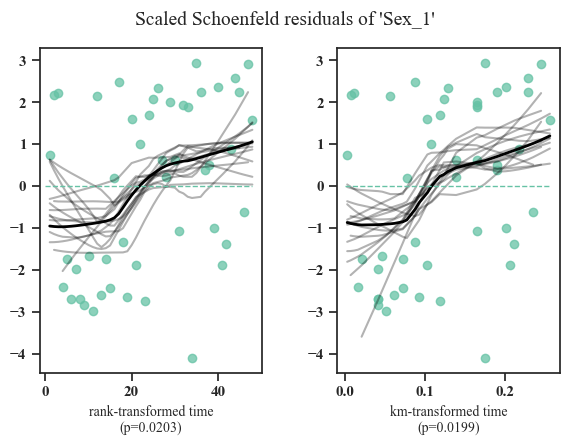

In [505]:
cox1.check_assumptions(reg_df_select_with_dummies1, p_value_threshold=0.05, show_plots=True)

In [506]:
cox2.check_assumptions(reg_df_select_with_dummies2, p_value_threshold=0.05, show_plots=True)

Proportional hazard assumption looks okay.


[]

In [507]:
cox3.check_assumptions(reg_df_select_with_dummies3, p_value_threshold=0.05, show_plots=True)

Proportional hazard assumption looks okay.


[]

In [508]:
cox4.check_assumptions(reg_df_select_with_dummies4, p_value_threshold=0.05, show_plots=True)

Proportional hazard assumption looks okay.


[]

In [509]:
cox5.check_assumptions(reg_df_select_with_dummies5, p_value_threshold=0.05, show_plots=True)

Proportional hazard assumption looks okay.


[]

In [510]:
cox6.check_assumptions(reg_df_select_with_dummies6, p_value_threshold=0.05, show_plots=True)

Proportional hazard assumption looks okay.


[]

In [511]:
cox7.check_assumptions(reg_df_select_with_dummies7, p_value_threshold=0.05, show_plots=True)

Proportional hazard assumption looks okay.


[]

In [512]:
cox8.check_assumptions(reg_df_select_with_dummies8, p_value_threshold=0.05, show_plots=True)

Proportional hazard assumption looks okay.


[]

In [513]:
cox9.check_assumptions(reg_df_select_with_dummies9, p_value_threshold=0.05, show_plots=True)

Proportional hazard assumption looks okay.


[]

In [514]:
cox10.check_assumptions(reg_df_select_with_dummies10, p_value_threshold=0.05, show_plots=True)

Proportional hazard assumption looks okay.


[]

In [515]:
cox3.params_

covariate
age                       -0.000099
Sex_1                     -0.073271
Reg_U_1                    1.770028
Reg_U_2                    0.963443
Persistent infection_1    -0.698049
vac2_1                     1.054015
vac2_2                     0.512629
vac2_3                     0.054640
Hospitalization_1          0.381509
Variants_1                18.355752
Name: coef, dtype: float64

In [516]:
summary = cox3.summary

In [517]:
summary['se(coef)']

covariate
age                          0.011421
Sex_1                        0.300672
Reg_U_1                      0.427805
Reg_U_2                      0.430808
Persistent infection_1       0.350606
vac2_1                       1.164831
vac2_2                       1.154281
vac2_3                       1.559141
Hospitalization_1            0.366633
Variants_1                2417.203102
Name: se(coef), dtype: float64

In [518]:
summary.columns

Index(['coef', 'exp(coef)', 'se(coef)', 'coef lower 95%', 'coef upper 95%',
       'exp(coef) lower 95%', 'exp(coef) upper 95%', 'cmp to', 'z', 'p',
       '-log2(p)'],
      dtype='object')

In [519]:
cox_results = pd.DataFrame(columns=['cox', 'variants', 'coef', 'exp(coef)', 'se(coef)',
                                    'coef lower 95%', 'coef upper 95%', 'exp(coef) lower 95%',
                                    'exp(coef) upper 95%', 'cmp to', 'z', 'p', '-log2(p)', 'aic'])


cox_list = [cox1, cox2,cox3, cox4,cox5, cox6,cox7, cox8,   cox9]

# 遍历 Cox 回归模型列表
for i, cph in enumerate(cox_list):

    # 获取 Cox 模型的摘要信息
    summary = cph.summary

    # 提取系数、标准误差、95% 置信区间和指数系数
    coef = summary['coef']
    exp_coef = summary['exp(coef)']
    se = summary['se(coef)']
    ci_low = summary['coef lower 95%']
    ci_high = summary['coef upper 95%']
    exp_ci_low = summary['exp(coef) lower 95%']
    exp_ci_high = summary['exp(coef) upper 95%']
    cmp_to = summary['cmp to']
    z = summary['z']
    p = summary['p']
    logp = summary['-log2(p)']
    
    aic = cph.AIC_partial_

    for j in range(len(coef)):
        cox_results = cox_results.append({'cox': 'cox{}'.format(i+1),
                                          'variants': coef.index[j],
                                          'coef': coef[j],
                                          'exp(coef)': exp_coef[j],
                                          'se(coef)': se[j],
                                          'coef lower 95%': ci_low[j],
                                          'coef upper 95%': ci_high[j],
                                          'exp(coef) lower 95%': exp_ci_low[j],
                                          'exp(coef) upper 95%': exp_ci_high[j],
                                          'cmp to': cmp_to[j],
                                          'z': z[j],
                                          'p': p[j],
                                          '-log2(p)': logp[j],
                                          'aic': aic},
                                         ignore_index=True)
cox_results

C:\Users\ZERO\AppData\Local\Temp\ipykernel_16332\2866893393.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cox_results = cox_results.append({'cox': 'cox{}'.format(i+1),
C:\Users\ZERO\AppData\Local\Temp\ipykernel_16332\2866893393.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cox_results = cox_results.append({'cox': 'cox{}'.format(i+1),
C:\Users\ZERO\AppData\Local\Temp\ipykernel_16332\2866893393.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cox_results = cox_results.append({'cox': 'cox{}'.format(i+1),
C:\Users\ZERO\AppData\Local\Temp\ipykernel_16332\2866893393.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cox_re

,cox,variants,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p),aic
0,cox1,age,0.006164,1.006183e+00,0.015469,-0.024155,0.036483,0.976135,1.037156,0.0,0.398466,6.902866e-01,0.534733,468.670298
1,cox1,Sex_1,-0.019635,9.805567e-01,0.320085,-0.646990,0.607720,0.523620,1.836240,0.0,-0.061342,9.510865e-01,0.072351,468.670298
2,cox1,Workplace_1,19.817573,4.042616e+08,34350.068159,-67305.078886,67344.714032,0.000000,inf,0.0,0.000577,9.995397e-01,0.000664,468.670298
3,cox1,Workplace_2,18.142399,7.570832e+07,34350.068158,-67306.754058,67343.038855,0.000000,inf,0.0,0.000528,9.995786e-01,0.000608,468.670298
4,cox1,Workplace_3,18.322004,9.060352e+07,34350.068154,-67306.574446,67343.218453,0.000000,inf,0.0,0.000533,9.995744e-01,0.000614,468.670298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,cox7,Hospitalization_1,0.119092,1.126474e+00,0.338800,-0.544944,0.783128,0.579875,2.188307,0.0,0.351512,7.252042e-01,0.463541,470.097138
69,cox8,Reg_U_1,2.091497,8.097024e+00,0.388709,1.329641,2.853352,3.779685,17.345835,0.0,5.380621,7.422915e-08,23.683439,468.220871
70,cox8,Reg_U_2,1.220218,3.387925e+00,0.385979,0.463713,1.976722,1.589967,7.219042,0.0,3.161360,1.570343e-03,9.314705,468.220871
71,cox8,Persistent infection_1,-0.629353,5.329365e-01,0.294921,-1.207388,-0.051318,0.298977,0.949976,0.0,-2.133970,3.284523e-02,4.928172,468.220871


In [75]:
cox_results.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\cox_result.xlsx')

## 5. Map

In [522]:
from pyecharts.render import make_snapshot
from snapshot_phantomjs import snapshot
from pyecharts import options as opts
from pyecharts.charts import Map
from pyecharts.globals import ThemeType,ChartType, SymbolType, GeoType
from pyecharts.charts import Geo

In [63]:
c = (
    Map(init_opts=opts.InitOpts(width="300px", height="300px", bg_color='white', theme=ThemeType.LIGHT))
    .add(
        "",
        [['福建省', 10.0]],
        "china",
        is_map_symbol_show=False,
        zoom = 1.1
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        visualmap_opts=opts.VisualMapOpts(
            max_=10,
            is_piecewise=False,
            range_color=['#8099FF', '#F2BE9E'],
            textstyle_opts=opts.TextStyleOpts(font_size=25, font_weight='bold', font_family='Times New Roman'),
            is_show=False 
        ),
        #legend_opts=opts.LegendOpts(is_show=False),
        #title_opts=opts.TitleOpts(title=" ", pos_left='center', title_textstyle_opts=opts.TextStyleOpts(font_size=25, font_weight='bold', font_family='Times New Roman')),
    )
    #.render("D:\\Research\\Project\\PROJECTS\\其他\\Dengue fever\\result\\zj.html")
)

make_snapshot(snapshot, c.render(), "D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\福建.pdf", pixel_ratio = 6)

In [59]:
c = (
    Map(init_opts=opts.InitOpts(width="300px", height="300px", bg_color='white', theme=ThemeType.LIGHT))
    .add(
        "",
        [['厦门市', 10.0]],
        "福建",
        is_map_symbol_show=False,
        zoom = 1.1
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        visualmap_opts=opts.VisualMapOpts(
            max_=10,
            is_piecewise=False,
            range_color=['#eff6e7', '#8099FF'],
            textstyle_opts=opts.TextStyleOpts(font_size=25, font_weight='bold', font_family='Times New Roman'),
            is_show=False 
        ),
        #legend_opts=opts.LegendOpts(is_show=False),
        #title_opts=opts.TitleOpts(title=" ", pos_left='center', title_textstyle_opts=opts.TextStyleOpts(font_size=25, font_weight='bold', font_family='Times New Roman')),
    )
    #.render("D:\\Research\\Project\\PROJECTS\\其他\\Dengue fever\\result\\zj.html")
)

make_snapshot(snapshot, c.render(), "D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\厦门.pdf", pixel_ratio = 6)

In [60]:
c = (
    Map(init_opts=opts.InitOpts(width="300px", height="300px", bg_color='white', theme=ThemeType.LIGHT))
    .add(
        "",
        [['思明区', 8.0],
 ['集美区', 8.0],
 ['湖里区', 8.0],
 ['同安区', 8.0],
 ['海沧区', 8.0],
 ['翔安区', 8.0],],
    "厦门",
    is_map_symbol_show=False,
    zoom = 1.1
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        visualmap_opts=opts.VisualMapOpts(
            max_=8,
            is_piecewise=False,
            range_color=['#eff6e7', '#FFEDA0'],
            textstyle_opts=opts.TextStyleOpts(font_size=25, font_weight='bold', font_family='Times New Roman'),
            is_show=False 
        ),
        #legend_opts=opts.LegendOpts(is_show=False),
        #title_opts=opts.TitleOpts(title=" ", pos_left='center', title_textstyle_opts=opts.TextStyleOpts(font_size=25, font_weight='bold', font_family='Times New Roman')),
    )
    #.render("D:\\Research\\Project\\PROJECTS\\其他\\Dengue fever\\result\\nb.html")
)

make_snapshot(snapshot, c.render(), "D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\厦门1.pdf", pixel_ratio = 6)

## 6. Sup info

In [128]:
urb = pd.read_excel("D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\sup.xlsx",sheet_name = '城市化率')
popu = pd.read_excel("D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\sup.xlsx",sheet_name = '人口')
land = pd.read_excel("D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\sup.xlsx",sheet_name = '土地')

In [129]:
urb['Years'] = pd.to_datetime(urb['Years'])
urb = urb.set_index(['Years'])

popu['Years'] = pd.to_datetime(popu['Years'])
popu = popu.set_index(['Years'])

land ['Years'] = pd.to_datetime(land ['Years'])
land  = land.set_index(['Years'])

In [130]:
urb.columns

Index(['厦门市', '　思明区', '　海沧区', '　湖里区', '　集美区', '　同安区', '　翔安区'], dtype='object')

In [131]:
#y1 = urb['厦门市']
y2 = urb[ '　思明区']
y3 = urb['　湖里区']
y4 = urb['　集美区']
y5 = urb['　海沧区']
y6 = urb['　同安区']
y7 = urb['　翔安区']

In [132]:
x2 = popu[ '　思明区']*10000/land[ '　思明区'] 
x3 = popu['　湖里区']*10000 /land['　湖里区']
x4 = popu['　集美区']*10000/land['　集美区']
x5 = popu['　海沧区']*10000/land[ '　海沧区'] 
x6 = popu['　同安区']*10000/land[ '　同安区'] 
x7 = popu['　翔安区']*10000/land[ '　翔安区'] 

In [133]:
sum_x2_to_x7 = x2 + x3 + x4 + x5 + x6 + x7

# 计算构成比
x_2 = (x2 / sum_x2_to_x7) * 100
x_3 = (x3 / sum_x2_to_x7) * 100
x_4 = (x4 / sum_x2_to_x7) * 100
x_5 = (x5 / sum_x2_to_x7) * 100
x_6 = (x6 / sum_x2_to_x7) * 100
x_7 = (x7 / sum_x2_to_x7) * 100

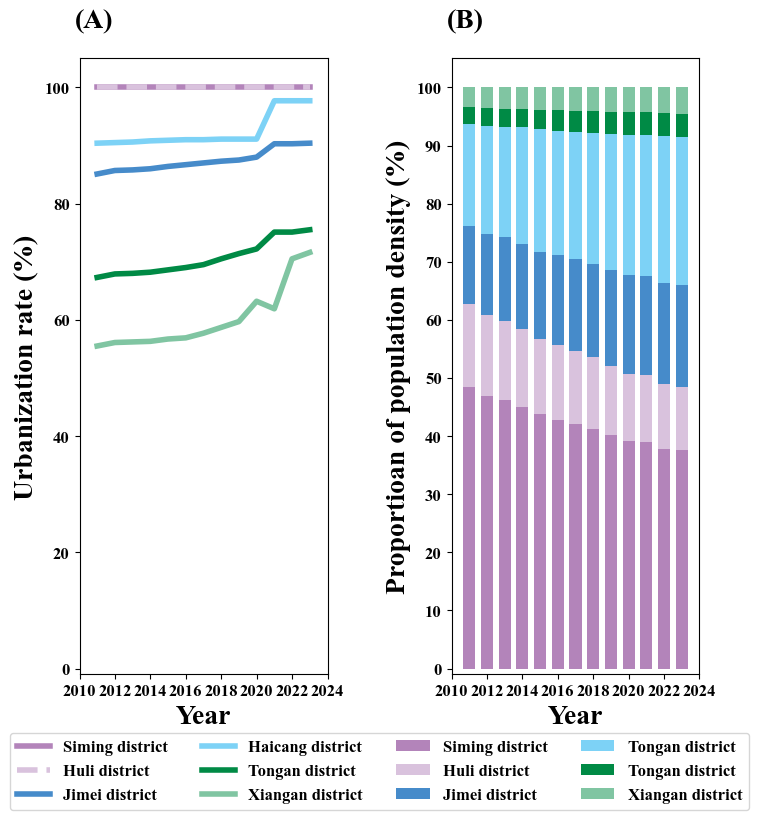

In [152]:
fig, axs = plt.subplots(1, 2, figsize=(8, 8))  # 调整figsize以适应你的需要
plt.rc('font', family='Times New Roman')
plt.rcParams.update({'font.size': 12 })
plt.rcParams['font.weight'] = 'bold'
# 第一个子图
ax1 = axs[0]
ax1.plot( y2,  color='#B384BA',label='Siming district',linewidth =4)
ax1.plot( y3,  color='#D9C2DD',linestyle='dashed',label='Huli district',linewidth =4)
ax1.plot( y4,  color='#468BCA',label='Jimei district',linewidth =4)
ax1.plot( y5,  color='#7DD2F6',label='Haicang district',linewidth =4)
ax1.plot( y6,  color='#008A45',label='Tongan district',linewidth =4)
ax1.plot( y7,  color='#80C5A2',label='Xiangan district',linewidth =4)
ax1.set_ylim(-1, 105)
#ax1.set_yticks(np.arange(0, 110, 10), fontdict={'fontname': 'Times New Roman', 'fontsize': 20, 'fontweight': 'bold'})
#ax1.set_xticks(fontdict={'fontname': 'Times New Roman', 'fontsize': 20, 'fontweight': 'bold'})

ax1.set_ylabel('Urbanization rate (%)', fontdict={'fontname': 'Times New Roman', 'fontsize': 20, 'fontweight': 'bold'})
ax1.set_xlim(np.datetime64('2010-01-01'), np.datetime64('2024-01-01'))
ax1.set_xlabel('Year', fontdict={'fontname': 'Times New Roman', 'fontsize': 20, 'fontweight': 'bold'})
ax1.text(-0.02, 1.08, '(A)', fontdict={'fontname': 'Times New Roman', 'fontsize': 20, 'fontweight': 'bold'},
         transform=ax1.transAxes, verticalalignment='top', horizontalalignment='left')
# 第二个子图
ax2 = axs[1]
ax2.bar(x_2.index, x_2, color='#B384BA',label='Siming district',width=250)
ax2.bar(x_3.index, x_3, bottom=x_2, color='#D9C2DD',label='Huli district',width=250)
ax2.bar(x_4.index, x_4, bottom=x_2 + x_3, color='#468BCA',label='Jimei district',width=250)
ax2.bar(x_5.index, x_5, bottom=x_2 + x_3 + x_4, color='#7DD2F6',label='Tongan district', width=250)
ax2.bar(x_6.index, x_6, bottom=x_2 + x_3 + x_4 + x_5, color='#008A45',label='Tongan district',width=250)
ax2.bar(x_7.index, x_7, bottom=x_2 + x_3 + x_4 + x_5 + x_6, color='#80C5A2',label='Xiangan district',width=250)
ax2.set_ylim(-1, 105)
ax2.set_ylabel('Proportioan of population density (%)', fontdict={'fontname': 'Times New Roman', 'fontsize': 20, 'fontweight': 'bold'})
ax2.set_xlabel('Year', fontdict={'fontname': 'Times New Roman', 'fontsize': 20, 'fontweight': 'bold'})
ax2.set_yticks(np.arange(0, 110, 10), fontdict={'fontname': 'Times New Roman', 'fontsize': 20, 'fontweight': 'bold'})
ax2.set_xlim(np.datetime64('2010-01-01'), np.datetime64('2024-01-01'))
ax2.text(-0.02, 1.08, '(B)', fontdict={'fontname': 'Times New Roman', 'fontsize': 20, 'fontweight': 'bold'},
         transform=ax2.transAxes, verticalalignment='top', horizontalalignment='left')


# 合并图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.07),ncol = 4)
plt.subplots_adjust(wspace=0.5)
# 保存图像
plt.savefig("D:\\Research\\Project\\PROJECTS\\COVID-19\\COVID-19_Amoy\\Reinfection\\New\\城市化.png", dpi=450, bbox_inches='tight')
plt.show()